<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing-the-datasets" data-toc-modified-id="Preprocessing-the-datasets-1">Preprocessing the datasets</a></span></li></ul></div>

# Preprocessing the datasets

good read : https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

In [222]:
import pandas as pd
from utils import open_by_tweets
import nltk
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

#if wordcloud not already installed, run the following command : !python -m pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#uncomment the comments below if the packages have not already been downloaded

#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')


In [223]:
#load tweets in list where each element is a tweet
with open('data/train_pos.txt',"r") as file:
    train_pos = file.read().split('\n')
train_pos.remove('')
    
with open('data/train_neg.txt',"r") as file:
    train_neg = file.read().split('\n')
train_neg.remove('')
    
#let's check it worked correctly
print(train_pos[0:100])


['<user> i dunno justin read my mention or not . only justin and god knows about that , but i hope you will follow me #believe 15', "because your logic is so dumb , i won't even crop out your name or your photo . tsk . <url>", '" <user> just put casper in a box ! " looved the battle ! #crakkbitch', "<user> <user> thanks sir > > don't trip lil mama ... just keep doin ya thang !", 'visiting my brother tmr is the bestest birthday gift eveerrr ! ! !', '<user> yay ! ! #lifecompleted . tweet / facebook me to let me know please', '<user> #1dnextalbumtitle : feel for you / rollercoaster of life . song cocept : life , #yolo , becoming famous ? <3 14 #followmeplz ! <3 x15', "workin hard or hardly workin rt <user> at hardee's with my future coworker <user>", "<user> i saw . i'll be replying in a bit .", 'this is were i belong', '<user> anddd to cheer #nationals2013 ?', 'we send an invitation to shop on-line ! here you will find everything you need - without leaving home ... <url>', 'just woke up 

## To do 
**Implement everything in methods, we need a pipeline to process test data using the same steps as for the train data**
* Remove blank tweets: Zeineb
* Open contractions & transform @ into at or u into you, etc...: Zeineb
* Separate punctuation from words like : 'word...' becomes 'word ...'
* Separate alphabet & numbers (e.g. 398stomach)
* removing repetitive letters inside word, ie, 'loooove' (seems complicated to do : https://stackoverflow.com/questions/20516100/term-split-by-hashtag-of-multiple-words but maybe we could try https://github.com/matchado/HashTagSplitter)
* lemmatization and/or stemming (https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8): DONE
* removing irrelevant punctuation (keep ! and ?, watch out for emojis, maybe remove isolated punctuation (there's a space before and after)) & when there are two exclamation points (for ex) we can transform them into a word (like doubleinterrogation): Lilia
* stopwords, keep relevant ones: Lilia
* transforming all variants of "haha" to "haha" : Zeineb

### Stopwords

In [224]:
#list of stopword from nltk + "url" added -> maybe we should remove some of them, ie., 'but'
stopWords = set(stopwords.words('english'))
stopWords.add("url")
print(stopWords)


{'ve', 'it', 'down', 'had', 'have', 'hers', 'are', 'you', 'hasn', 'd', 'shan', 'their', "wasn't", 'herself', 'should', 'for', 'needn', 'themselves', "aren't", 'is', 'into', 'such', 'those', 'about', 'here', "you'll", 'at', 'y', 're', 'haven', 'again', 'before', 'being', 'against', 'over', 't', 'couldn', 'these', 'through', 'on', 'ma', 'not', 'does', 'don', 'how', 'a', 'can', "couldn't", 'doesn', 'been', "shouldn't", 'weren', "should've", 'while', 'with', 'her', 'who', 'there', 'itself', 'under', 'its', 'am', 'above', 'below', 'll', 'myself', 'why', 'own', 'or', "she's", 'whom', "mightn't", 'me', 'himself', 'same', 'as', 'some', 'very', 'him', 'but', 'wouldn', 'o', 'until', "haven't", 'an', 'where', 'we', 'out', 'them', 'now', 'my', 'yourselves', 'off', 'yours', 'if', 'by', 'in', 'then', 'no', 'which', 'isn', 'and', 'to', 'your', 'i', 'url', "hasn't", 'than', 'were', 'won', "wouldn't", 'our', 'didn', "weren't", 'be', 'when', 'so', 'after', "you'd", 'because', 'mustn', "shan't", 'further

Studying the occurrence of stopwords in the datasets

In [225]:
# alternate way 
# Create an empty dictionary 
d_pos = dict() 
# Loop through each line of the file 
for tweet in train_pos: 
    # Remove the leading spaces and newline character 
    tweet = tweet.strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    tweet = tweet.lower() 
  
    # Split the line into words 
    words = tweet.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d_pos: 
            # Increment count of word by 1 
            d_pos[word] = d_pos[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d_pos[word] = 1
            
#Print contents of dictionary
for key in list(d_pos.keys()): 
    print(key, ":", d_pos[key]) 

<user> : 81649
i : 37253
dunno : 49
justin : 344
read : 395
my : 16126
mention : 200
or : 2001
not : 4380
. : 30368
only : 1555
and : 17038
god : 934
knows : 200
about : 2906
that : 8602
, : 27167
but : 5884
hope : 1832
you : 31560
will : 4063
follow : 5590
me : 14768
#believe : 62
15 : 142
because : 973
your : 6923
logic : 5
is : 10430
so : 9461
dumb : 64
won't : 379
even : 949
crop : 7
out : 3451
name : 760
photo : 276
tsk : 8
<url> : 9326
" : 9018
just : 6448
put : 571
casper : 9
in : 10008
a : 20973
box : 77
! : 52891
looved : 1
the : 25745
battle : 36
#crakkbitch : 1
thanks : 4499
sir : 100
> : 1958
don't : 2918
trip : 180
lil : 324
mama : 91
... : 7830
keep : 862
doin : 83
ya : 803
thang : 53
visiting : 18
brother : 266
tmr : 43
bestest : 29
birthday : 1520
gift : 135
eveerrr : 2
yay : 425
#lifecompleted : 1
tweet : 1478
/ : 1982
facebook : 247
to : 27408
let : 986
know : 4477
please : 3774
#1dnextalbumtitle : 10
: : 3398
feel : 1045
for : 12579
rollercoaster : 5
of : 9325
life :

closing : 5
you're : 1922
welcome : 560
sharing : 68
looking : 624
forward : 314
great : 1791
stay : 509
fit : 81
global : 9
b : 338
blacky : 1
alison : 3
story : 187
getting : 801
hee : 20
xoxox : 24
thats : 750
article : 30
writing : 92
poems : 3
pycc : 1
#toolive : 2
chad : 6
saying : 291
#realthug : 1
lady : 202
streets : 42
freak : 81
sheets : 21
tattoo : 87
talks : 47
emmanuel : 1
mayo : 5
whewww : 1
#thingsrkellysingsabout : 1
ready : 594
fa : 34
under : 130
covers : 28
there's : 363
adventure : 24
laynn : 1
briefs : 5
instagram : 128
above : 40
never : 1239
smoked : 25
bring : 366
mom : 425
magazines : 7
mail : 43
smile : 830
imma : 214
bitch : 444
prom : 265
taken : 120
away : 360
either : 198
win : 376
girl : 1500
righthaha : 1
excited : 661
course : 434
still : 1435
reassuringly : 1
trotskyist : 1
95 : 13
% : 152
treats : 14
ed : 49
client : 11
been : 1441
baking : 20
woohoo : 40
cuz : 242
#waystobeginsex : 23
hella : 42
guy : 379
tell : 980
d : 236
* : 2215
ck : 21
much : 1

lauri : 1
b-day : 39
2day : 35
followed : 518
142 : 2
buying : 53
decision : 31
upset : 29
#reallythough : 1
ideas : 62
blerg : 1
358 : 1
longer : 140
into : 445
swing : 23
lmmfaoo : 1
aint : 201
yu : 233
bt : 48
kno : 113
chu : 14
thus : 7
wishes : 74
classs : 3
students : 29
choose : 72
focal : 1
research : 21
topic : 29
throughout : 9
semester : 30
turned : 86
webbie : 1
whats : 150
happenin : 34
ayye : 6
7,665 : 1
th : 79
other : 659
words : 405
21st : 31
cont : 109
kill : 133
somebody : 171
ova : 12
kicks : 15
exciteddd : 6
chelsea : 115
played : 85
blinder : 2
fingers : 74
crossed : 35
second : 155
leg : 44
shout : 322
trapped : 2
past : 150
#aheartforgod : 1
spongbob : 1
melbourne : 12
available : 49
dates : 31
coke : 30
mall : 54
whole : 303
scary : 50
#youaintnogoodif : 2
pants : 64
sorrry : 3
boy : 512
fact : 138
bump : 21
rap : 29
#rns : 3
house : 415
thanx : 215
texted : 37
high : 289
drugged : 3
spelled : 22
albums : 11
kraken : 2
cake : 144
celebrate : 61
homecoming : 9
s

hahha : 33
bond : 7
classmates : 10
bonded : 3
orientation : 5
somehow : 26
jiayou : 3
#twitneighbours : 1
mark : 72
beg : 19
differ : 6
also : 565
stays : 22
alrighttt : 2
whale : 3
wanker : 3
jogging : 12
sub-tweet : 1
youre : 104
af : 132
star : 79
power : 151
kush : 9
burn : 37
wiz : 17
khalifa : 5
mixtapes : 2
ppl : 171
isaid : 4
jeans : 31
#bbcfootball : 1
thankss : 49
scent : 7
freshly : 6
grass : 19
cooked : 25
pork : 10
chops : 5
low : 62
skillet : 3
crockpot : 2
shoulder : 15
quotes : 56
older : 52
mother : 98
smiths : 5
unexpected : 18
surprise : 75
english : 137
plan : 197
excellent : 48
shhhshhsshhhshut : 1
efforts : 7
overcome : 5
difficult : 24
situations : 11
arent : 20
wasted : 30
#ourwholeuniversewasinahotdensestate : 1
coulda : 8
notified : 3
defo : 47
woop : 36
8 : 195
lantaran : 1
si : 43
kar : 5
kita : 32
gusto : 13
mahal : 9
totally : 185
viv : 5
yahhh : 5
dm's : 17
chillin : 65
matt : 44
brittany : 12
soo : 313
bestie : 49
havent : 59
ftsk : 1
announced : 21
war

realizes : 5
nickname : 15
cree : 2
tanx : 2
papi : 6
#howgoodcouldihavebeenif : 1
hastag : 3
#howgreatimgonnabebecause : 1
internet : 57
web : 38
workout : 85
wornout : 1
falling : 56
3000 : 12
soup : 22
ohkaye : 1
besites : 1
fangirl : 17
lxx : 1
5000 : 5
afresh : 2
isnt : 44
evelyn : 1
#iloveus : 1
bank : 31
stink : 6
fart : 12
phase : 15
#goodcustomerservice : 1
o'clock : 13
conversation : 81
boring : 87
cheetos : 9
#fatkid : 1
#ineedtoworkout : 1
#yummm : 5
prince's : 2
abused : 2
divas : 4
rehearsals : 5
knw : 38
evrfc : 1
crowned : 2
division : 2
east : 24
champions : 17
titles : 1
ebb : 1
taking : 229
tongan : 2
b-e-a-utiful : 3
unknown : 6
3000th : 4
shortly : 17
#whowantsit : 1
christina : 13
aguilera : 4
wand : 16
ash : 17
dragon : 10
core : 11
twelve : 6
inches : 13
wicked : 49
rooms : 14
stinks : 1
vom : 1
#happy420 : 11
hahahahah : 29
hip : 27
rains : 12
soft : 37
earpiece : 6
keeps : 69
itching : 3
area's : 2
website : 55
kosova : 1
server : 7
100th : 20
prize : 18
veish

snitch : 2
raised : 18
princetonn : 1
taurus : 9
#notfoolinganyone : 1
#stfu : 3
ofcourse : 19
#freeyourmom : 1
movement : 8
limb : 3
#towie : 12
#10thingsiwanttohappen : 33
tash : 3
revising : 15
naah : 11
#owend : 1
ino : 4
tiff : 4
tlaga : 1
kta : 1
waley : 4
kna : 4
khapon : 1
#happy4 : 2
beautifully : 9
ad : 29
ray : 34
shined : 2
senior : 56
payphone : 11
chorus : 7
#anytakers : 2
#everychildhood : 1
punjabi : 2
cheat : 19
comp : 19
entered : 13
somalia : 1
openly : 3
express : 12
belinda : 2
355 : 51
240 : 31
275 : 26
270 : 7
202 : 1
messaged : 10
wack : 11
grrr : 6
dajai : 1
attiyah : 2
roberts : 6
ne : 23
paris : 41
vino : 2
jackys : 1
conversations : 34
dearr : 1
tissue : 5
#teamwinning : 1
bill : 24
songing : 1
freind : 3
mayday : 2
parade : 11
shuffle : 6
ajs : 1
dj : 42
bum : 32
bisinka : 1
terrible : 27
headache : 20
tru : 11
#ilovemikey : 1
mag : 20
#smartnokialumia : 138
lennon : 3
3-0 : 3
attended : 2
panthers : 2
marlins : 2
became : 32
grew : 16
reds : 6
ailin : 1
sm

selected : 7
pins : 5
omw : 39
#exhausted : 3
#princess : 2
rebelmanniacs : 1
oakland : 4
drugs : 35
#smilies : 1
funn : 17
trains : 4
stockholm : 6
oslo : 3
expensive : 15
luckily : 17
wooh : 5
musical : 31
darkskin : 1
boul : 1
joined : 29
lumosowl : 1
23706 : 1
102 : 3
shrek : 16
mme : 1
numbers : 28
#cookieteamparty : 1
jumba : 1
downey : 1
landing : 4
deccan : 1
chargers : 3
priced : 4
#ipl : 12
#ialwayswonderif : 5
tatted : 21
ugh : 72
#epicfail : 1
fix : 55
crusty : 3
bodaays : 1
#backoffmymanmchugh : 1
cleaning : 36
lame : 41
everybody's : 1
lick : 29
caress : 4
gag : 6
suggestively : 1
crabby : 1
miserable : 25
#supporters : 1
#inspiration : 2
hopen : 2
built : 31
2ur : 1
aprl : 1
dogg : 6
#pwede : 1
facing : 4
porty : 1
function : 8
dranks : 1
studios : 7
canyon : 2
jv : 5
var : 1
blame : 42
a's : 7
89 : 3
spare : 28
broward : 1
hollywood : 10
plantation : 3
airport : 73
chokehold : 1
ears : 35
diggin : 8
lmaooo : 60
shamwow : 1
b4 : 31
kc : 10
limelight : 2
blew : 12
selena 

jams : 13
cafeteria : 2
crazierrr : 1
autistic : 1
ya'll : 24
reppin : 8
#teamrebels : 1
hottest : 23
muthufuckas : 1
wyatb : 2
gbua : 2
dollar : 22
general : 24
adding : 21
admins : 4
likeee : 9
kels : 3
sayings : 2
snapping : 3
d'aww : 1
prank : 10
led : 8
hugging : 12
duvet : 5
#relaxation : 2
jamming : 16
gareth : 2
greatly : 20
posters : 20
orchestra : 5
festival : 25
andrea : 9
theatre : 19
experts : 5
econo : 1
convent : 2
angel : 56
kkk : 8
147 : 2
mourning : 1
#dailybuzz : 1
shaybooskie : 1
#gcf : 1
hippies : 2
cameron : 8
ngmpa : 1
ahahahahahhahaha : 1
blah : 18
righty : 1
achieved : 6
#naturalhair : 1
#instagram : 13
okk : 16
lalis : 1
bells : 3
maar : 1
rik : 3
wel : 13
jaa : 7
thugnificent : 1
wie : 2
buttt : 9
taz : 1
image : 16
saved : 51
#survey : 1
#twittercrush : 2
<i'mdoingbetter> : 1
justin's : 16
mountain : 23
nick : 36
omar : 4
aftermath : 1
contact : 44
consultation : 2
services : 15
anal : 7
withh : 9
otherss : 1
laterr : 2
decapos : 1
05 : 6
rocking : 31
55 : 1

dorm : 3
meemah : 1
oga.why : 1
crayzee : 1
ss4ina : 13
charity : 22
shops : 12
kris : 9
paper.they : 1
polished : 2
useless : 8
500th : 4
beginning : 42
#espressoplease : 1
cheeks : 20
trou : 1
dropped : 32
leak : 4
tr : 3
employees : 4
sections : 3
gicano : 1
olives : 3
#theq : 1
#keeper : 4
guru : 9
nip : 1
radar : 2
visited : 13
noway : 2
tomorrow's : 21
omggg : 17
lotta : 5
continuation : 4
3346 : 1
waves : 32
follow-up : 1
matryoshka : 1
bling : 2
charger : 19
#wineries : 1
releases : 4
tasting : 4
23rd : 12
wines : 4
reviewed : 2
bonnie : 4
momma's : 1
enought : 1
skrillex : 3
ultra : 4
herd : 6
freelooking : 1
gaven : 2
lies : 29
devil : 20
arshitabieber : 1
dandy : 2
cozy : 10
showeeerrr : 1
suprise : 9
hahahahahah : 10
references : 4
muther : 1
originally : 8
devon : 9
e_e : 1
dense : 1
#failureinlife : 1
taylor : 92
jilat : 1
ae : 5
extensions : 6
filed : 2
career : 34
powerade : 5
petroniverse : 1
aventurera : 1
rockera : 1
venamami : 1
impatient : 6
hid : 5
tanajah : 1
nad

roadtrip : 6
tts : 3
#family : 8
#teambieber : 1
crab : 7
eco : 5
wata : 1
clo : 1
nath : 15
bastard : 13
rt's : 29
auctions : 1
#sens : 2
#pub101 : 1
hommie : 3
bob : 26
wallpaperr : 1
guna : 13
20-30 : 1
pound : 15
hiya : 25
hoo : 14
bustin : 15
jieber : 14
brazil : 67
brazilian : 22
der : 10
ma'am : 30
valuable : 6
emotion : 2
#kodaforpromking : 1
#babyneedles : 1
brave : 20
205 : 2
ego : 11
400,000 : 1
janoskians : 5
#janoskiansmeetjustinbieber : 4
respond : 22
ping : 3
7th : 23
fanbases : 3
amend : 2
dustbin : 1
tmrw : 41
walmart : 12
fishtail : 5
braided : 4
jordan's : 6
#thingsisayduringschool : 5
pic-up : 1
pick-upistas : 1
slushie : 1
#shoppaholicproblems : 1
relies : 3
confidence : 21
esteem : 4
#pelc12 : 3
blogging : 9
blog : 108
scored : 20
actual : 14
g1 : 2
trigga : 2
cpr : 3
certified : 13
#dailytweet : 12
spagetti : 1
takeout : 3
hustling : 2
vitamin : 8
=p : 9
ower : 1
aids : 2
eath : 1
bruce : 5
copies : 8
shelves : 2
avengers : 16
iii : 5
loki : 4
fury : 2
koala : 42

nut : 10
cheerios : 4
wahhh : 7
aiseh : 1
thankyoo : 1
wthh : 1
boii : 8
faggs : 1
jenniferrr : 1
mb : 15
puke : 5
i.dont.like.you.tho : 1
#unfollowed : 2
suppose : 43
wrk : 13
twitterme : 1
alyssykestw : 1
mase : 2
sorted : 30
cupcakes : 22
phaha : 1
hippie : 3
styled : 5
molly : 10
118 : 1
couture : 4
160 : 5
jmk : 1
400th : 6
honored : 22
scribe : 1
immense : 3
rarest : 1
brightness : 3
#ff's : 6
hahahs : 1
wot : 12
sparx : 1
amazin : 6
tune : 41
beyonce's : 2
#movingthefuckon : 1
deed : 4
twenty : 6
#3daysaway : 1
vore : 1
99ers : 1
dong : 20
ini : 14
gw : 8
funky : 7
#femalefdj : 1
#99ers : 2
mksih : 2
#teampayzer : 1
#twitterjail : 1
#tbt : 20
chin : 32
cake's : 1
noce : 1
#ohhwell : 1
#somethingeveryonecantdo : 3
photoshopped : 1
lightroom : 1
photoshop : 13
#perfection : 4
slore : 2
#kiddingbutnotkidding : 3
#imokwithit : 1
possession : 2
celebrated : 3
whre : 2
nicer : 15
pr : 9
#wheels : 1
#notreally : 3
picked : 43
cheesecake : 10
xox : 31
#daymade : 4
princeton's : 3
peeps 

wagon : 5
spain's : 2
dubstep : 3
kub : 1
hoobastank : 1
#funkylatenite : 1
queennn : 1
oneday : 2
joanna : 2
nght : 2
managed : 21
zoo : 24
protested : 1
caching : 1
software : 10
ssy : 1
possess : 2
debating : 6
analog : 3
wateva : 2
ups : 11
realll : 2
retweetin : 3
faithfully : 2
compared : 27
wan : 13
puppy's : 1
mischief : 5
brown's : 1
unwind : 2
1540.sex : 2
nutin : 1
fink : 4
shud : 18
#happybirthdaypresley : 11
zombie : 8
ipahinga : 1
faroes : 1
massages : 3
con : 14
lester : 1
trendin : 3
pep : 4
assembly : 7
campus : 26
#sisters : 1
minecraft : 2
builder : 2
wednesday's : 4
waz : 6
lecture : 14
#prettycool : 3
mormon : 1
kindness : 13
contagious : 10
#quote : 5
females : 36
raw : 21
boobs : 90
tits : 23
harveys : 1
poutine : 1
understanding : 19
tuh : 11
dia : 11
bgt : 11
melvannl : 1
skinnier : 3
remembered : 42
hitler's : 1
twisted : 7
ankle : 15
bew : 5
9:30 : 6
bee-yoo-tee-fool : 1
parental : 2
malu : 1
ku : 4
msg : 22
ea : 7
everythang : 1
#beatchathistimeprocrastinati

queenfaheemah : 1
ouuu : 6
gemini : 5
#justalittlebiased : 1
outer : 1
elk : 2
resemble : 2
#hopefully : 2
#askallegri : 1
requestlist : 1
#hahahaha : 2
limited : 12
austin : 28
hayes : 7
#legend : 6
balls : 64
trillions : 2
mannn : 12
consent : 3
benson : 6
hal : 4
bryce : 1
peepin : 1
lmap : 1
erbody : 1
extended : 6
preform : 1
lesser : 1
evils : 1
henna : 1
foster : 6
t'aime : 4
45 : 29
shoutouts : 36
mos : 7
growth : 3
weakness : 6
vanier : 1
okee : 14
andina_maharani : 1
penne : 1
alla : 2
pesto : 1
trapanese : 1
#musicman : 1
]: : 7
annoy : 12
#itstrue : 2
proves : 10
awesomeee : 7
#fenway100 : 1
retire : 5
frame : 11
rookie : 6
joining : 28
#howexciting : 1
mainstream : 1
coverage : 7
mostly : 27
0.0 : 5
hatas : 1
gon : 80
sideline : 3
pimppinnn : 1
flips : 6
somethingg : 4
marriage : 15
counseling : 2
virgin : 16
settling : 4
12:52 : 1
siri : 6
glasgow : 15
#seussical : 1
joel : 12
derrick : 10
meredith : 3
assistance : 4
kyle : 12
swaggin : 1
sucker : 8
doughnuts : 6
acts : 1

hatimu : 1
gee : 13
thorpe : 4
#bigbangtheory : 1
bucklist : 1
ispit : 3
beliebe : 2
#hellostranger : 1
rom-com : 1
addicts : 3
#romanticcomedy : 1
cwtch : 2
#loveacwtch : 1
#heartbeats : 7
independent : 6
455 : 1
conert : 2
fidelianovena : 1
#freehim : 1
grindin : 1
uce : 1
owns : 11
odds : 17
googling : 1
junior : 43
09slimmom : 1
fruits : 7
evry : 7
color.the : 1
prblm : 1
chaat : 1
bai : 3
kelsey : 7
ann : 12
gallello : 1
#followher : 13
hamed : 1
isshh : 1
capruk : 1
#21 : 3
baby's : 13
804 : 2
babymama : 1
#selebwatch : 1
sophomore : 9
prez : 2
ricky : 17
mumbai : 4
chuck : 15
flights : 8
calming : 4
#soproud : 7
honda : 3
fireblade : 1
thief : 5
nicked : 1
battered : 2
scratched : 2
iyou : 1
#toeveryone : 1
whos : 32
tournament : 18
extraordinarily : 2
favooorite : 1
opposed : 2
limitless : 3
yung : 22
finance : 4
nega : 1
external : 2
ties : 5
year-end : 1
ewww : 9
bailey : 6
afterwards : 17
pencilled : 1
#truestory : 1
toke : 3
#goodfeeling : 1
#70 : 1
knowledge : 14
mjs : 1
#

visitin : 1
tym : 6
reli : 3
excitd : 1
orchard : 2
plaza : 6
ahahahaha : 13
#newfollower : 2
#followedback : 2
wiiish : 1
denmark : 20
wanttt : 2
facetime : 7
502 : 1
gateway : 1
errors : 2
leo : 18
shaman : 1
cuddles : 13
#perfectboyfriend : 1
dok : 2
bla : 4
#3wordsaftersex : 2
malcolm : 4
cooks : 3
#nowplaying : 30
tyrese : 2
kodak : 1
unexpectedly : 2
vocation : 1
#1dstoreinphilly : 2
sprint : 3
facey : 1
biatch : 4
airplane : 3
focused : 7
vehicle : 5
fiona : 4
92 : 3
#1dfamily : 17
blogconme : 1
committee : 2
eight : 10
#jesusfreaks : 1
machinima : 1
piercin : 1
bookin : 1
tannin : 2
bayiehh : 1
antok : 2
hapi : 1
com : 18
fukd : 3
thoo : 32
norah : 1
#theyreeatinbeees : 1
#ahh : 1
bahahahah : 2
#kidcudi : 2
uglah : 2
marlene : 2
magtatagal : 1
ratings : 2
swerte : 2
#happyfriday : 7
developer : 6
arduous : 1
#yesterdaytodayforever : 4
#tgif : 16
persuade : 8
hector : 1
elizondo : 1
gerry : 2
#goodjob : 3
pushing : 13
productive : 53
buttons : 10
failed : 16
quiz : 24
dreamland 

kamu : 6
er : 20
yepp : 11
gutted : 12
intolerance : 1
scrummy : 2
breathing : 15
legendary : 9
411 : 2
statements : 1
orchids : 1
xactly : 1
#puregenius : 1
2gether : 3
bottle : 41
funnyyy : 3
insert : 5
irritating : 5
harmony : 2
regain : 2
#thingsyouwouldthrowatmarklawrenson : 1
jar : 34
errands : 4
margaritas : 6
bummed : 5
#jaredquimby : 1
tosh : 5
yooouuutuuubbeee : 1
mmmooonnnaaayyy : 1
radiohead : 1
granddd : 1
lynne : 1
taster : 1
smgdh : 1
boyfren : 1
igged : 1
weathers : 4
#sincewebeingchildish : 2
wifing : 1
spotless : 1
#greatdaughter : 1
ours : 26
munchin : 1
subtweeting : 7
#1moremonth : 1
#luvmybeb : 1
fardowsa : 1
musa : 1
ull : 10
bitchezzz : 3
smttn : 1
rated : 13
asyik : 2
ada : 20
tegaknya : 1
nothink : 1
besties : 19
masterminds : 1
#c4dev : 1
#developmentcomms : 1
quit : 34
tommo's : 23
shoutouuut : 1
looovve : 1
rent : 5
scowling : 1
:-| : 3
tianah : 1
erin : 7
ch0ir : 1
jajajaja : 3
whacked : 2
zumba's : 1
aching : 2
#nopainnogain : 4
255-1593 : 1
scorpions : 1

mayooo : 1
shamrita : 1
walli : 1
navigation : 2
whaaat : 13
lunchh : 1
amazinggg : 10
harry's : 18
noniii : 3
last.fm : 1
okkk : 10
#bahrain : 4
muscles : 25
connected : 14
trends : 18
101011 : 2
kame : 4
kemp : 2
braun : 1
strikes : 6
fllow : 2
coding : 1
computers : 4
#topless : 2
17th : 14
tweety : 5
warranted : 2
impact : 8
jiroux : 1
#onemoreday : 1
flawlessly : 1
adele's : 1
souvenir : 2
employment : 4
sorta : 8
learnt : 10
risen : 2
rusty : 4
achieve : 10
avril : 5
l0ve : 1
thankyuuu : 2
aliveee : 1
wag : 3
gnun : 1
solution : 8
nman : 3
candice : 1
gma : 11
lolss : 4
humanities : 1
81 : 2
vicariously : 1
forgiveness.god : 1
taquinait : 1
hein : 1
cuff : 4
injury : 9
suffering : 6
servant : 2
becomes : 9
presley : 3
images : 7
crapping : 1
bullied : 4
rousey : 2
returns : 14
crotch : 4
noni : 1
sanity : 4
#rain : 1
#trailrun : 1
#betteryouthanme : 1
manning : 3
suuuhhh : 1
tomrorows : 1
jumper : 9
structure : 4
mitis : 1
starring : 12
melon : 2
representation : 1
coachella : 14

ellaborate : 1
#13billboardnominationsforrihanna : 1
bww : 6
btcstarmaker : 1
mis : 8
addictions : 2
4seasons : 2
3days : 3
larp : 1
phs : 2
7pm : 18
merrier : 5
#chasingthesunonitunes : 4
#naaawt : 1
daisy's : 1
dukes : 3
fer : 3
idek : 6
thesee : 2
mailing : 3
#theatre : 1
#chacelebration : 1
wwhoopwoop : 1
#edc : 1
mp : 5
sparrow : 2
whatcha : 10
rearrangement : 1
meetup : 6
0930-1100 : 1
deciding : 5
venue : 9
04/18 : 2
1:57 : 2
06 : 3
taty : 2
trolley : 3
seww : 1
bestiess : 1
zara : 3
witb : 1
coolata : 1
dunkins : 1
okayyrt : 1
fllwd : 3
todayyy : 9
#lovehim : 5
neek : 1
kite : 5
ween : 2
dessert : 14
liiight : 1
bestiest : 1
#soonerorlater : 1
cntt : 1
qurrl : 1
qettss : 1
playset : 1
bloodghasts : 1
gp : 4
show'em : 1
quest : 3
masaaledaar : 1
shabooya : 1
#bougie : 1
wheres : 14
telln : 1
recalled : 1
scottsdale : 2
maggie : 3
street's : 2
#typical : 2
#thanksgod : 2
_me : 1
mupload : 1
bewbz : 1
self-righteous : 1
transcend : 1
commenting : 3
fot : 2
het : 7
#yyj : 3
ttry : 

astrology : 1
freight : 1
tuesday's : 2
#300 : 1
badass : 18
#sheistheshit : 1
amazingest : 3
dd : 27
3/18 : 2
gibbs : 1
slimmer : 1
tutu : 2
scares : 5
#manutd : 1
goodnighttt : 2
pliiiz : 1
#meru : 1
#embu : 1
awt : 1
unpredictable : 4
alhamdulilah : 1
shiva : 1
y'zeit : 1
motorway : 1
#yummyinmytummy : 2
#revenge : 3
fishncoind : 1
zombies : 4
celb : 1
seen.didnt : 1
loui : 3
spence : 1
carolina's : 1
symphony : 2
#showerflow : 3
wizard : 6
cece : 2
pumping : 5
witnessed : 4
pushup : 1
fond : 7
spechleess : 1
belive : 5
#directioner : 5
medicine : 21
#getwellsoonjonghyun : 1
guitarlist : 1
wann : 5
#stb : 1
#hypedforstb : 1
collapse : 4
robs : 1
#thinkbig : 1
#motherwivambition : 1
#1dfollowthelistof1dfanatics : 3
#dsu16 : 1
#fightthroughthepain : 1
various : 3
equipment : 7
bathtub : 4
shanee_jstcooln : 1
haahhaaa : 1
salmon : 7
mashed : 6
solid : 20
jalec : 8
fyi : 14
ching : 2
pasalubongs : 1
echancers : 3
bali : 6
#123 : 1
o'l : 2
hobos : 1
kundaini : 1
wahe : 6
jio : 1
jeeo : 1

kolo : 1
motherfuckers : 2
mejo : 1
ata : 6
ni-follow : 1
24-12- : 1
1971 : 2
phonesss : 2
socky : 1
passionately : 1
monsanto : 1
inspirits : 1
gottta : 2
getten : 1
breast : 10
sharpie : 1
peacefull : 2
camry : 2
craving : 17
penguin : 7
sr : 5
must-have : 2
iris : 5
#izotope : 1
ichec : 1
expectation : 2
display : 12
#hotstuff : 3
thankyouu : 16
taho : 1
rog : 1
missy : 15
#preciousmoments : 2
dawee : 1
lol'ing : 3
awko : 1
#trendstarter : 1
billboard : 7
nominations : 2
#boss : 6
acknowledgement : 1
pre-gaming : 1
presh : 2
rondo : 2
plaese : 2
enhancer : 2
burrit : 1
wizz : 2
#erikapleasetakeus : 1
x-split : 1
justin.tv : 1
aright : 1
annoyanceee : 1
bbygee : 1
anivers : 1
6month : 1
amiinn : 1
commands : 2
peeta : 8
fanatic : 5
snuggling : 4
deans : 2
willys : 2
empathy : 2
summin : 2
postcrad : 1
freinds : 1
debatable : 2
asa : 5
11social_2 : 1
miminpedia : 1
gals : 13
#feelinlikefriday : 1
goddess : 6
suffer : 4
undercover : 6
mcfly : 10
barring : 1
tommorow.hey : 1
trippin : 1

sina : 2
gogogo : 3
workrate : 1
incorporate : 1
71 : 3
yaaaxx : 1
rise : 36
#talentshow : 1
punkass : 2
iver : 1
shores : 1
acually : 1
#friendzone : 1
jayden : 2
interrupting : 2
desired : 1
profession : 2
buuut : 7
iican : 2
censor : 1
7-8 : 2
awakening : 1
tomlin : 1
alena : 1
whining : 3
alka : 1
seltzer : 1
terrika : 1
olaide : 1
boyfrienddd : 1
prepping : 3
#fullboat : 1
songz : 4
#gayesttweet : 1
muhahahhah : 1
kiddo : 4
dangerously : 3
beyonce : 11
zont : 1
lovvve : 2
arrr : 2
cara : 5
broody : 1
#babyonthebrain : 1
cheapest : 6
brunei : 2
bisai : 1
scripted : 1
naitweet : 1
yun : 9
pfoee : 1
eff : 6
#encoreatl : 2
#southsideconcert : 2
#mamamia : 1
#losercruiser : 1
#askcraig : 2
yaahh : 1
pare : 2
sna : 3
mentalist : 1
mamasita : 1
provisions : 1
cccuurrrttteee : 1
#yayy : 2
#birfdaygirl : 1
#iwillbefirsttotellyou : 1
#nusnc12 : 2
donald : 4
#dwts : 3
striker : 2
jger : 1
hi5 : 3
senyorita : 1
katieebealka : 1
wilding : 1
claire's : 1
tripped : 2
mcd : 8
shudnt : 1
nga : 7
m

gahh : 4
wheen : 1
iget : 5
shhit : 1
donnt : 1
assk : 2
itssgone : 1
errorr : 1
fckyou : 1
hecka : 2
dwnn : 1
#finally : 16
celts : 1
mcgregor : 1
chant : 1
beaus : 1
204 : 5
norm : 4
#teamlegsfordays : 1
shaky : 1
lend : 9
hardworking : 3
willed : 1
fundraisers : 1
aubreigh : 1
joz : 1
captured : 3
freshie : 2
immagration : 1
heeeyy : 3
gettn : 5
feticake : 1
khoo : 1
witchyo : 1
applauded : 1
bloomfield : 2
skewl : 1
tommaro : 2
savage : 5
bitter : 10
billion : 8
watson : 2
wittle : 12
emptied : 1
u2 : 5
#fingercrossed : 1
#kickass : 2
failure's : 1
flattering : 4
joss : 1
whedon : 1
quebec : 1
political : 8
murdered : 4
bombay : 3
consulted : 1
beforee : 1
patchie : 1
yam : 1
asan : 2
ibaaa : 1
friiends : 1
diive : 1
behiind : 1
dhats : 1
pose : 8
dhem : 1
they'r : 1
inspirational : 12
#cantwaittograduate : 1
mtb : 2
snowboarding : 3
anniv : 14
agithandoyo : 1
#doublemint : 1
aweseome : 1
auwww : 1
aunt's : 1
checkout : 8
yip : 2
definately : 8
#kissminaj : 1
aaawh : 1
tika : 3
flo

raging : 3
waters : 1
zxxx : 2
inn : 7
collapsed : 1
desperately : 3
jyp : 1
#nowwatching : 3
togettha : 1
#yesimahater : 1
autographs : 6
#seetdeh : 1
kyat : 1
rocksteady : 1
fx : 3
toilets : 5
bows : 3
garnet : 1
bbyyy : 1
skeleton : 2
hayy : 4
dts : 2
godfather : 4
spoiledd : 1
94 : 4
tya : 1
spm : 2
ganda : 4
1600 : 2
trials : 3
#whee : 1
dean : 5
#reginaidol : 1
bakal : 2
jadi : 6
thq : 1
ducky : 2
familiar : 13
dante : 2
blinks : 1
s-so : 1
smirks : 2
twitta : 3
thaannnkkk : 1
uuu : 12
uan : 3
gentlemanly : 1
cookout : 3
bg : 16
chinos : 3
franiversary : 1
ramey : 1
sudan : 1
#hotgingerwillbehappy : 1
perv : 5
akward : 2
drow : 2
afew : 1
hour's : 1
#ecsu : 1
sour : 23
midday : 3
dribbling : 4
newal : 1
#comebacksoon : 1
#mybeloved : 1
umiyak : 1
bonggang : 1
bongga : 1
susie : 2
pj's : 3
neeeda : 2
amz : 1
examer : 1
rescheduled : 2
1-4 : 4
rogers : 3
marley : 9
#thankyousuber : 1
swooop : 1
hoursss : 1
tbf : 5
#wcu493 : 1
myrtle's : 1
abangan : 1
women's : 10
shutup : 10
clayvo

mxwaaah : 1
kristal : 1
waved : 10
flippin : 1
couple-promise : 1
teased : 1
#xfactormemories : 1
#teamfood : 1
quenched : 1
absorbed : 1
drain : 2
blak : 2
aktris : 1
era : 7
broery : 1
sahetapi : 1
eternal : 2
feherrr : 1
tint : 1
#mrbean : 1
#beach : 2
#funny : 5
#video : 2
walaaa : 1
tamad : 1
challenger : 1
lance's : 1
tastefest : 1
doank.rt : 1
lgi : 2
mainan : 1
tomoroo : 2
placee : 1
#stressfreeday : 1
#weneedit : 1
#youdeserveit : 1
#whaddupbitches : 1
lush : 12
satisfy : 3
uas : 2
dh : 5
dpt : 3
pictorial : 1
japan.we : 1
archenemy.we : 1
archenemy : 1
#twtourinnz : 1
blondey : 1
reyt : 1
everton : 2
#youmakemehappy : 1
rre : 1
#oldsettlers : 1
feby : 1
necessarily : 3
tripping : 7
negragirl : 1
islam : 4
modest : 4
coaches : 5
battles : 7
#jmacswag : 1
#shitbossessay : 1
straighten : 9
dryer : 5
aiya : 5
reflections : 21
#feellucky : 1
#youngbucks : 1
quited : 1
1stqueen : 1
acappela : 1
canuplease : 1
likeudid : 1
2me : 1
journalism : 3
forbes : 4
tallstories : 1
mule : 1
#

happends : 1
attempts : 1
sungmin : 2
apgujeong : 1
cr : 11
brownie : 14
#comefaster : 1
#stonerprobs : 1
ronjay : 1
hunn : 10
readyyy : 1
vodafone : 1
crises : 1
insha : 1
#michellebranch : 1
#mbmb : 1
dermals : 1
#pune : 1
nehra : 3
#nehra's : 1
ashish : 1
ne'haraya : 1
tweethearts : 10
wannt : 2
#smh : 6
owell : 3
incredibly : 18
specialness : 1
moutain : 1
#hurryup : 3
herrr : 8
ms.happyface : 1
42 : 6
dressf : 1
why-so-serious : 1
delegate : 1
#christianpickuplines : 2
curtains : 3
awwlll : 1
hb : 5
freaked : 8
otterbox : 1
scam : 4
lovess : 2
perkins : 1
fahk : 1
#idgaf : 3
2:46 : 2
transformers : 2
shia : 1
homeland : 4
adverbs : 1
ihave-directioninfection : 1
q24 : 1
torn : 10
burban : 1
mela : 2
bethan : 1
montenegro : 1
tessa : 1
#cadbury2012 : 1
#teamgb : 1
platforms : 1
#networking : 1
freely : 1
sapped : 1
starin : 1
momaah : 1
cigar : 1
#godisfaithful : 1
dickhead : 3
shopkeeper : 1
infamous : 2
edin : 3
muself : 1
nvs : 1
jlo : 3
hw's : 2
twinkle : 13
#iflickz : 1
parked

gute : 1
nacht : 1
flowww : 1
jagger : 6
#runningtunes : 1
echavez : 1
rappers : 7
#iloveit : 8
rocky : 5
flocka : 2
drown : 7
established : 3
crappy : 6
nowadays : 9
remains : 2
rewrite : 2
template : 1
fallback : 1
ie : 5
marshmallows : 5
english's : 1
tami : 1
111 : 5
carwin : 1
amuary : 1
rj : 5
ramery : 1
clarisa : 1
sillies : 1
pups : 1
abouts : 2
furiends : 1
bol : 6
doctor's : 3
choo : 2
patients : 3
#choochooobsessed : 1
spoiles : 1
4evaa : 1
#coffeepart2 : 1
lakin : 1
pinched : 1
kira : 2
gath : 6
koibseyo : 5
langue : 5
cupboards : 1
carpe : 1
cease : 3
tatoo : 2
laffed : 1
thaang : 2
dah : 19
aahaha : 2
kellavofam : 1
#chinup : 4
convos : 12
undescribable : 1
metallica : 2
#rockitjudd : 1
twfanmily's : 1
whenn : 4
yest : 3
drums : 9
judd : 1
nonomas : 1
senyanebabe : 1
whatevs : 5
f's : 2
flirtt : 1
#picstitch : 2
pointe : 3
prone : 2
kaitwin : 1
karsha : 1
sophielou : 1
mudslinging : 1
politics : 3
madridistas : 2
exit : 7
awlwayss : 1
caeden : 1
wifi's : 1
baackk : 1
hell

appricate : 1
cuddlin : 3
pours : 2
niggie : 1
#dying : 2
musttt : 1
busted : 7
#yourugly : 1
onward : 1
seafolly : 8
swimwear : 8
domost : 1
matakaw : 2
jklang : 1
cooln : 3
wealth : 4
hugo : 3
levi : 3
calculate : 2
luvahstein : 1
#piedpipermusic : 1
rtrt : 1
access : 5
21-29 : 1
campervan : 2
tossed : 2
trash : 7
boogymonger : 1
moreover : 2
castries : 1
rush-hour : 1
mooch : 1
mattresses : 1
#bizhype : 1
sos : 5
frapp : 1
#statbucks : 1
willmons : 1
aaa : 14
#gotigers : 1
worrry : 1
developments : 2
jennamarbles : 1
wednessday : 1
sipon : 1
unblocked : 1
lurking : 2
ciara : 3
campbell : 2
#yumm : 4
castles : 2
nuthhhin : 1
defined : 2
tonightt : 5
simpli : 1
superhero : 5
#t-mobile : 1
pastor : 4
heavy : 16
kool-aid : 6
4:57 : 1
nuff : 6
skout : 1
harley : 2
phoenix : 5
janeese : 1
#moni : 2
mabaet : 1
twittcam : 1
brova : 1
#coverthenight : 1
pahahhaaa : 1
#awesomemate : 1
popeye's : 1
backstabbers : 1
nearest : 3
#lmlto : 1
toosh : 1
riddles : 1
barclays : 1
ewallet : 1
fatoosh :

1.5 : 5
#goodassfriend : 1
#dickpunch : 1
#cuntpunt : 1
twittahhh : 1
30pm : 2
nidhi : 1
behna : 1
ts : 2
investigated : 1
craze : 2
chipotle : 5
doms : 2
istanbul : 2
2137 : 1
riggins : 1
fnl : 1
#shh : 1
metoo : 1
#simislifeiscomplete : 1
#museumbarthursdays : 1
reflection : 5
dryland : 1
med : 5
chris's : 2
kaelin : 1
erhem : 1
aqasyah : 1
#adminjulialover : 1
makabawi : 1
yunho : 1
cryed : 1
nudged : 1
stundee : 1
familia : 2
xxox : 1
51 : 5
#sexplaylist : 1
#ownit : 1
hecks : 2
noodle : 5
neema : 1
radiant : 1
chief : 3
brook : 2
gustin : 1
naomi : 5
duckies : 1
darius : 2
#work : 2
harm : 6
moonbabe : 1
aooo : 1
wishn : 1
evalastn : 1
nyt : 13
twitlonger : 9
sloshers : 1
#sloshersunited : 1
accordingly : 1
tday : 3
weknd : 1
keyword : 1
dravid : 1
practicee : 1
hiha : 1
eu : 8
venti : 2
#ewlala : 1
numba : 1
#nothongthursday : 2
homeskilett : 1
#twitterlesscara : 2
softest : 1
abour : 1
suzette : 1
autism : 3
charts : 3
#weloveyouashley : 1
cabbbs : 1
pauly : 5
ill-emental : 1
da

#canonlydream : 1
#zaynfollowanny : 2
iq : 2
indahalqadrie : 1
6,000 : 3
#majormunchies : 1
exceeded : 1
warren : 3
fenway : 5
bipartisanship : 1
#geologyrocks : 1
#geologytour12 : 1
#gorgeousandperfectface : 1
forbidden : 2
jejemon : 1
#happybirthdaynath : 3
tubby : 1
00.00- : 1
170412 : 1
annisamaliaenhas : 1
chachaa : 1
insulting : 2
#funkysquat : 1
oiii : 3
tawoo : 1
classico : 2
peixuan : 1
#bitchmodewasdefintlyon : 1
haaapy : 2
chynna : 1
bristol : 8
knews : 1
lightt : 1
#whatanight : 1
webinar : 3
fron : 3
limbang : 1
ofcoursee : 1
#itsmsummit : 1
#cloud : 3
outside-in : 1
jimi : 1
hendrix : 1
pecks : 3
hashtags : 2
#kottbullar : 1
#jaglskardig : 1
mali : 1
#beachbreak : 1
galaga : 1
#realfriendships : 1
x16 : 2
tommy : 4
lakeside : 3
#hilarious : 5
trendy : 2
geeks : 2
sluttt : 4
copyin : 1
jammin : 5
scheming : 2
zagilicious : 1
nuni : 1
crockpocket : 1
shouttout : 1
super-villain : 1
nippin : 1
bustard : 1
bezzaaa : 1
eattin : 3
#subtweeet : 1
meen : 6
dunk : 5
mcqueen : 1
ki

1:00 : 3
tilts : 1
fasttt : 1
promoters : 5
smother : 2
#thedaymymandoesntdothatimkickinghisass : 1
thun : 5
boujie : 1
guts : 9
that.everyone : 1
cyprus : 6
advantages : 2
poojsters : 1
wtbs : 3
bigbang : 3
facilitating : 2
eddie : 4
468 : 1
sngs : 1
1ly : 1
#sunmusichd : 1
ensoy : 1
policypapers : 1
lukc : 1
all-american : 2
someday's : 1
pudes : 1
#princetonfact : 2
minh : 1
duno : 5
adeshia : 1
choke : 7
ilike : 4
#dntjudgeme : 1
exercising : 3
keller : 1
decades : 2
existed : 1
carola : 1
parody : 1
#woulddoabsolutleyanthyingforaretweet : 1
yokoso's : 1
deejay : 2
wooohooo : 12
bourbonnais : 1
orgasms : 3
sarahjo : 1
reasonable : 4
gameplan : 1
wingman : 2
intimidated : 2
awesomer : 1
nyttt : 1
reports : 5
curiosity : 7
atlantis : 3
uncovered : 1
discovery : 4
#checkitout : 1
#itwillbecomeclearwhy : 1
#mru : 1
#springleball : 1
preschoolers : 1
ece : 1
#yayfornomathclass : 1
intensely : 1
#ericchurchallday : 1
wolfs : 1
classed : 2
#totallyownedagain : 1
#dirt : 1
#kp3d : 1
xxk : 

forsake : 1
hebrews : 1
13:15 : 1
#peopleifollowbecauseoftheirlooks : 1
avetar : 1
bina : 1
wd-nice-day : 1
whored : 1
cynical : 2
geology : 1
#ommf : 1
endemic : 1
knockout-lil : 1
soulmate : 3
auckland : 13
chch : 1
lookinq : 4
yoslf : 1
exclusives : 6
afiqqq : 1
saaavy : 1
chickensalad : 1
callee : 1
ibm : 1
#mds : 1
honeysuckle : 1
lovebirds : 2
#lego : 1
chanel : 5
a3 : 2
#sobcon : 1
cholo : 2
#dontwantnoshortasspapishorty : 1
plagiarism : 1
prepped : 1
furniture's : 1
mosolyka's : 1
apure : 1
combine : 4
lmp : 1
#imtryingtohelp : 1
bobble : 1
fee : 4
subtle : 4
partake : 2
boylieber : 2
have'em : 1
downliad : 1
internets : 2
deployments : 1
bfore : 4
toyota : 1
#daddy : 2
mathandie : 1
ntombi : 1
appliances : 1
mybirthday : 2
demi's : 2
mwuah : 2
#insane : 1
erich : 2
gonzales : 1
maurer : 1
loveteam : 2
arguin : 1
rappin : 1
thd : 1
titan : 2
oder : 1
22hrs : 1
12mins : 1
daaays : 1
adriaaana : 1
vehicles : 3
weerrkkout : 1
#drunkmemory : 1
jummpingg : 1
scott : 13
naniniwala : 

coklat : 1
awawawaaa : 1
#fhsu : 1
clicker : 1
#salone : 1
floral : 2
springie : 1
11:34 : 1
#gnite : 1
#punk'd : 2
plumvillage : 1
1:40 : 1
casey : 9
implants : 1
git : 3
pea : 2
firts : 1
#summerisalmosthere : 1
oooi : 1
aquii : 1
seize : 2
mazatlan : 1
#shanghaicalling : 1
#teamhenney : 1
pappasito's : 1
#relieved : 2
hefty : 1
21days : 1
#includingme : 1
luise : 1
photogenic : 3
avis : 2
#redeye : 1
tidied : 1
wiped : 1
mosqitoes : 1
kjngpalmbntjjghbt : 1
allegiance : 1
#expptaatmoloko : 1
#teamthickness : 1
fereal : 1
hollla : 2
would'nt : 1
mafia : 2
whizzy : 1
cohen : 3
kinder : 5
ribery : 1
followin : 3
hhahahah : 1
mrk : 1
seawson : 1
hoa : 2
robson : 1
#ineedthat : 1
#internationalmsbwuday : 3
mr.right : 4
heehehe : 1
i'mma : 2
render : 2
uploadd : 1
rooneys : 1
unicorns : 6
1545 : 1
rear : 1
tires : 4
feu : 2
alumni : 2
yipeee : 2
#slumberparty : 1
#beers : 1
#poker : 1
#iwin : 2
draggin : 1
tavi : 1
onhere : 1
anggi_mu : 1
chucky : 1
over.night : 1
fixes : 3
nutshell : 2
ud

flutters : 1
compulsive : 2
shopper : 2
coiffed : 1
morphine : 1
bahahha : 1
tilll : 1
#alldaywithyou : 1
guano : 1
resource : 2
lololololololll : 1
mart : 2
asdfghjklqwrtr : 1
#gwan : 1
clink : 1
unconditionaly : 1
#21in21 : 1
acheche : 3
miki'bear : 1
jud : 1
#teammiller : 1
toko : 1
buku : 1
immanuel : 1
ttp : 1
yfrog.com/c97sjnj : 1
#whinewednesday : 1
sexie : 2
ucheck : 1
#thanksforsuporting : 1
#songtweet : 1
#colorforecast : 1
#pimkie : 1
selfridges : 1
portobello : 1
#theyknowwhatsup : 1
)8 : 1
jordy : 2
ihad : 1
understandable : 4
#whateeever : 1
toy--but : 1
trippen : 2
aviary : 1
:-/ : 8
6/8 : 1
hhaaaeennnddd : 1
munching : 2
#itsfriday : 2
makinggg : 1
liga : 1
kindaaa : 1
osasuna : 1
underdogs : 1
tards : 2
repainting : 1
angelus : 1
crumbling : 1
separation : 1
hamilton : 7
peters : 3
darin : 1
darin's : 1
steward : 1
churros : 1
leah : 7
labelle : 1
xm : 2
kulba : 1
#100 : 2
himym : 1
signin : 1
fscj : 1
#collegebounddd : 1
dimple : 5
#needfingertsoon : 1
luvf : 2
macare

tannning : 1
wrestling : 2
selves : 2
#worstcunt : 1
meka : 1
threesome : 6
iloveit : 1
cheery : 1
#teamkeith : 2
a78ar : 1
ensan : 1
feeln : 1
2or3songs : 1
#lotsoflove : 3
romania : 2
zig-zaggy : 1
dork-ass : 1
dork : 10
#workwithmehere : 1
x97 : 1
collegeee : 2
effn : 1
viets : 1
#cuteandsexyatthesametime : 1
#howdoyouachievethat : 1
contents : 1
offend : 3
hastings : 2
alrightt : 4
wrist : 4
luvs : 3
gtfoh : 2
#j14 : 1
flea : 1
#cheesy : 3
#oyea : 1
thers : 1
photo's : 2
alpha : 6
founders : 2
amaxing : 1
#tfj : 1
stations : 2
4min : 1
ickle : 2
okaybye : 1
assisting : 1
giorgio : 1
murro : 1
kain : 1
skelp : 1
casanova : 3
bleh : 2
gambeet : 1
krispy : 3
kreme : 3
toot : 2
nottt : 3
#proevo : 1
stds : 3
ahehe : 1
occurs : 1
heyya : 3
babylux : 1
#loveya : 3
ecu : 2
#piratenation : 2
#etsuites : 1
#campelectric : 1
ark : 2
noah : 5
pae : 1
ics : 2
2weeks : 3
whoohoo : 1
o'block : 1
eyess : 1
guetta : 1
#crazyhot : 1
#stillgotit : 1
waheeey : 2
rhoa : 1
#portcredit : 1
#patioseason 

quidditch : 1
seeker : 1
akic : 1
geico : 1
beatuful : 1
america.hahaha : 1
jkjkjkjk : 4
#bipolar : 1
#gumpopping : 1
#workinmywayup : 1
#smokeoutcoversations : 1
eias : 1
midtown : 2
analyses : 1
freee : 3
supaleakk : 1
tougher : 5
serenades : 1
rubbed : 2
#faithful : 1
hhmmm : 2
snot : 2
#livingood : 1
#goodcompany : 2
#blunted : 1
dvr : 3
#meangirls : 2
bribery : 1
aidan : 2
bahha : 1
tryd : 1
1.500 : 1
000idr : 1
#fansasked : 1
acapella : 2
ver : 5
#punkd : 2
continent : 5
braids : 1
#partyhard : 2
#marshug : 1
newsagents : 1
newbrews : 1
pfizer : 1
#pfizer : 1
reasoning : 1
marvelous : 5
auditioned : 2
lingers : 1
barrett : 2
chocolatier : 1
costs : 3
#splurge : 1
o'neil : 1
followw : 2
victoryarts : 1
dung : 1
ajaa : 1
thunderbird : 1
rizal : 2
jbhifi : 1
defs : 2
1ddate : 1
onesies : 1
bujang : 5
straighteners : 1
asure : 1
leonidas : 1
#jonathan : 1
#bcbc : 1
log-out : 1
weekend's : 1
awfa : 1
pals : 4
galstonn : 1
#anythingforyou : 1
clowning : 2
tylerboo : 1
suspenders : 2
#n

accurately : 1
#gopensbears : 1
geat : 1
elease : 1
jamiron : 1
looming : 1
allen : 7
efffing : 1
#ihavesoccer2night : 1
watz : 1
3rdmainland : 1
neytiri : 1
smexy : 2
bagay : 7
pagarte : 1
ricks : 1
half-full : 1
half-empty : 1
engineers : 1
hank : 2
cairo : 1
bluenotes : 1
haris : 1
exhibited : 2
yuchengco : 1
omgeee : 3
derpy : 1
lawsome : 1
arguement : 2
habibi : 1
jars : 1
#ifonlyicould : 1
#newmorning : 1
criss : 3
#crissbrothers : 1
amateur : 4
#latelate : 1
kiisssrt : 1
biba : 1
bibahot : 1
hurts.rt : 1
icadot : 1
jasmybaby : 1
ilovejas : 1
shaylamybabymama : 1
gridd-town.when : 1
joemc : 1
semis : 2
#sopumped : 2
let's-write-our-essays-on-christmas-day : 1
tumblr-ing : 1
#proudmama : 2
percy : 7
betterment : 1
hindus : 1
risa : 1
#japanwants1d : 1
padung : 1
paa : 1
tante : 2
muchamadnabil : 1
cartwheel : 1
15min : 1
instant : 3
trent : 2
hyfr : 5
dramtic : 1
cuddllleee : 1
#pinterest : 3
snooka : 1
dbn : 1
ngaze : 1
ngi : 2
duke : 4
hotys : 1
amazumba : 1
107 : 2
granted : 9


muthaaa : 1
fuckasss : 1
beezzz : 1
visually : 1
lash's : 1
turquoise : 2
bestfriend.your : 1
thicko : 1
triping : 1
melb : 1
kitak : 1
#ktbspa : 1
ms.ratliff : 1
1800th : 1
gusa : 1
ntabyo : 1
gusekana : 1
preaaach : 1
dll : 1
seeyin : 1
krisus : 1
commando : 2
lovaaah : 1
bf3 : 2
#butimstilljel : 1
shippments : 1
#goodnightworld : 2
stunned : 2
tinpot : 1
hayley's : 2
crocodile : 2
#youloveit : 1
evens : 1
#ubp12 : 1
bloggers : 6
humoring : 1
ubp : 1
longfellow : 1
specialize : 2
eastern : 3
bouncing : 4
#boojie : 1
#sketchbookx : 1
#autodesk : 1
#art : 5
#digitalart : 1
rekon : 1
jezzas : 1
boils : 1
shoo : 4
tksians : 1
#tkpride : 1
wernt : 2
throwback : 5
x32 : 1
#thirdtimelucky : 1
thooough : 1
tosa : 1
whomever : 1
hoorah : 1
evvahhh : 1
buyin : 2
depo : 1
shoudlve : 1
#thug : 1
fromm : 1
romances : 1
melo : 2
fantasticly : 1
flak : 1
goodmorninn : 1
variety's : 1
smothered : 2
geeens : 1
#sentencedtobars : 1
thalita : 1
earlybirds : 1
ux-focused : 1
#futurehusbanddd : 1
bshukkk

#heyboo : 1
#donttellrush : 1
#bestbuds : 1
imposible : 1
caty : 1
2more : 2
greensboro : 1
conducted : 1
bezzies : 1
#themillionpounddrop : 1
sayang : 8
kerala : 1
#bananaleafrice : 1
#deviscorner : 1
#dinner : 2
#kerala : 1
arth : 1
fonder : 3
#hizayn : 1
mistress : 3
slattery's : 2
pub : 10
midtow : 1
gorgeos : 2
violinnn : 1
freakinq : 2
#lahhhyou : 1
sjb : 1
goonette : 1
#runawaynow : 1
kganti : 1
yeo : 2
lmfl : 1
#beautifulfreaksfamily : 2
classiness : 1
0:25 : 1
yesung : 5
buffdae : 1
irritable : 1
stoneys : 1
aaawwwhhh : 1
cultured : 1
chaii : 1
sorrr : 1
ecarey : 1
erincarey : 1
#happyfirstanniversarybvbphilippines : 1
1.3 : 1
multiplied : 1
divided : 2
loveeyyy : 1
tahnee : 1
pleading : 1
#wtt12 : 1
huq : 1
hehehehhe : 1
wassp : 1
shidy : 1
emoni : 1
woooh : 2
#weather : 2
frownies : 1
wrinkles : 2
rika : 1
shaun : 3
zeus : 4
sneezes : 1
promptly : 1
legged : 2
#brat : 1
territorial : 2
#dontbeastranger : 1
#teamjacqui : 1
liebe : 1
dich : 1
cakie_sosweet : 1
cultures : 1
nui

#mylittlepony : 1
mrsfranklin : 1
wonka : 2
tattoo's : 1
eeer'bady : 1
sized : 3
theonlywayisolly : 1
#onlythebestforyou : 1
tomaters : 1
frazer : 1
#nil : 1
supervision : 1
gudtym : 1
#teamrapper : 1
maaadd : 1
hmppp : 1
photographic : 3
unkempt : 1
dira : 1
didd : 1
unsolved : 1
emma's : 1
markets : 1
announces : 1
prophets : 1
itty : 2
bitty : 3
heheen : 1
strawbeerrryy : 1
grape : 5
smirnoff : 1
anywayyy : 1
#europe : 1
#america : 2
tks : 2
orig : 1
njbc : 1
dair : 1
gramps : 1
antics : 4
2marra : 1
shuld : 5
grown-ups : 1
signings : 3
sno-beach : 1
guadalupe : 1
18/04 : 1
1.yawn : 1
auditioning : 5
labrinth : 4
frum : 1
#davy : 1
#meye : 1
#thekings : 1
ilm : 1
activists : 1
probaly : 1
activitism : 1
syapaaa : 1
tuhhh : 1
primetime : 1
borrw : 1
borww : 1
gdd : 1
vocie : 1
putra : 1
0325 : 1
alienor : 1
squeeeze : 1
anyen : 1
rasi : 1
bestieee : 1
medication : 2
boko : 1
gerrout : 1
yyyaaayyy : 2
buenas : 2
noches : 2
93.3 : 1
accounting : 3
#trashyourextuesday : 1
cloe's : 1
nnn

mitiz : 1
#ashley : 1
murders : 2
ect : 9
#notevenlying : 1
#wecuteintherain : 1
anj : 1
sipis : 1
markame : 1
cuanto : 1
#oneexcitedgirl : 1
crunches : 3
alcoholic's : 1
girllss : 1
noteworthy : 4
aamras : 1
therre : 1
sfu : 1
elin : 1
okayss : 1
provoking : 1
beggining : 1
hahaahag : 1
interviw : 1
yeyeboi : 1
jabc : 1
nay : 3
donut : 5
#gogogo : 1
3,600 : 3
boyfriennd : 1
bestfriennd : 1
mexicos : 1
#notworthmytime : 1
mydear : 2
xxi : 1
stoke : 2
74 : 2
2011/2012 : 1
carefree : 1
worrys : 2
sbec : 1
ireally : 3
#coughcough : 1
a1 : 3
shotgun : 2
#ahajustsaying : 1
jone's : 1
confenssion : 1
shopaholic : 2
sylvia-pillow : 1
#impatient : 1
ambient : 1
illuminates : 1
footwells : 1
tb : 1
sherlie : 1
basicallly : 1
druggie : 1
boyzzz : 3
chillaxing : 1
#ripdebo : 1
utt : 1
#truefriends : 1
pls.pls.pls : 1
elevated : 1
elective : 1
#goodnightbitches : 1
nautanki : 1
bindaas : 1
#madeit : 1
#can't : 1
katty : 1
lifeline : 1
nu'est : 2
bants : 2
nicks : 1
kaa : 3
#thinkbeforeyoutweet : 1

crazii : 1
mahaha : 1
#socialcare : 1
xx19 : 1
lucius : 1
beckoning : 1
boudoir : 1
freestyle : 4
dannggg : 2
variation : 1
hammer : 8
#sponsor : 1
#movie : 1
#project : 1
rting : 3
#lebanon : 2
titile : 1
kajal : 2
kah-jul : 1
shivani : 1
v1 : 2
nicegirl : 1
springwatch : 1
triple : 9
achele : 9
#hellofromyoyrrussianfans : 1
115 : 2
heeello : 1
#fairiesallnighters : 1
species : 2
milkman : 1
#twoff : 2
whatup : 1
askdhdjfds : 1
bestoneee : 1
kristian : 1
#hello : 3
#easy : 4
courtside : 1
abortion : 3
#illkeepmychild : 1
imnz : 1
nostalgia : 1
weir : 1
11o : 1
#1dnextsongtitle : 1
#psycho : 1
#iloveitthough : 1
separated : 2
#twins : 1
qoodmorninq : 2
#easily : 1
#byebyeuniveristy : 1
ass.enough : 1
rommates : 1
exactyl : 1
listena : 1
offcourse : 2
merchris : 1
chocolateness : 1
nvn : 1
sniggers : 1
peddle : 1
spoonful : 2
awak : 3
roflmfao : 2
alweadycrazy : 1
perfum : 1
#imfresh : 1
#cudi : 1
twende : 2
#breaktime : 1
mosaic : 2
enact : 1
eveyine : 1
#30hrfamine : 1
y'aw : 1
buddy-

sadsad : 1
storytelling : 1
myb : 1
hairspray : 3
#lolatgirlswho : 1
jks : 6
ahhliee.but : 1
tois : 1
twitfight : 1
nye : 2
jappp : 1
otoomo : 1
elokobi : 1
cursed : 1
pesci : 1
#goodfellas : 2
teamo : 1
#readyforbelievetour : 1
286 : 1
shanteria : 1
halloween : 3
evenings : 5
peas : 7
#preimagine : 1
cinco : 1
growin : 1
ramiro : 1
himrt : 1
celeb's : 1
#6th : 1
centered : 3
shianne : 1
silliest : 1
go'nn : 1
mcs : 1
letout : 1
reaaadyy : 1
swansea : 2
runover : 1
buggy : 2
weirdo's : 1
plod : 1
workingg : 2
mway : 1
11-7 : 1
#comeseeme : 1
appealing : 4
arnoldo : 1
82nd : 1
wasabi : 1
mar's : 1
grohe : 1
#omega : 1
resttt : 1
mwahahaa : 1
#gottalovesoccer : 1
currington : 2
postman : 1
puggy : 1
cutert : 1
blading : 1
bitaw : 1
if's : 1
ferdinand : 1
enlightened : 1
constrained : 1
#crewofonedfanbook : 1
insteresting : 1
justifying : 1
alwalys : 1
#2013 : 2
paragould : 1
aowww : 1
snoozed : 1
vmwednesday : 1
20,000 : 1
#26ten : 2
amira : 3
mashuri : 1
amiramashuri : 1
slalu : 3
purle

tricia : 5
#teambtch : 1
knoeee : 3
#antm : 3
bapak : 3
lotek : 1
ramdhan : 1
sens : 3
younnng : 2
aled : 2
survivors : 2
quarterback : 1
#littlegiants : 1
#shewonttakeyouseriouslyif : 1
habs : 2
nebraska : 2
#laurenalaina : 1
#runhappy : 1
frismile : 1
#youramazing : 3
spiffing : 1
mammaries : 1
else.den : 1
subtle-onli : 1
dwain : 1
tercepat : 1
homeworks : 1
friendzoned : 1
goonies : 1
heidy : 1
mf's : 3
#i'vemissedyou : 1
aaroosa : 1
x7 : 1
respects : 2
laughn : 2
#earlyandneverlate : 1
it.looks : 1
#thebreakfastclub : 1
corinthians : 2
5:17 : 1
ovens : 1
yuri : 1
tkt : 1
flyght : 1
#welovejim : 1
dumbbb : 1
heh-heh : 1
caption's : 1
qtjazz : 1
mmkay : 2
beeed : 1
wtheck : 1
micks : 2
#paraparaparadise : 1
youm : 1
#planet360goesondiet : 1
nakeyyy : 1
hanol : 1
smth : 3
chava : 1
follbeck : 4
#nowandthen : 2
peprally : 1
name's : 5
conell : 1
grips : 1
aug : 6
backpack : 4
#shutit : 1
#ohna : 1
#deshiper : 1
ilys : 1
aiiite : 1
mcdicks : 1
geee : 3
wooou : 1
#wecangetmarriednow : 1

backline : 1
#golfwang : 1
ddoser : 1
crystals : 1
druzy : 1
lepidolite : 1
lapis : 1
mwahaha : 2
#nothingcangetbetterthanthat : 2
sexully : 1
frusurated : 1
godness : 1
chazzlyn : 1
hopppe : 1
cruz : 4
alonzo : 1
teleseryes : 1
cannnot : 1
sbtrkt : 1
sloan : 1
tinie : 1
tempah : 1
thig : 1
sarah-beth : 1
xx40 : 1
d'day : 1
meggie : 1
kiwis : 2
crispies : 1
beastin : 1
ptl : 1
animalprint : 1
dummyclip : 1
soso : 1
#summerplans : 1
family's : 1
consisted : 2
awaited : 1
ashland : 1
rainey : 1
peewee : 1
herman : 1
show---naked : 1
gumby : 1
worships : 1
#teamfaberry : 1
#faberry : 1
sumwhere : 1
locate : 2
belieber's : 1
#mindchallenge : 1
#denmark : 1
#visitdenmark : 1
go.go.go : 1
#donttalktomeif : 4
sherron : 1
ooohwiee : 1
slappin : 2
smoken : 1
juhhh : 1
cheeezin : 1
transpo : 1
urwelcome : 1
cann : 5
superjoe : 1
derker : 1
mandem : 1
#thenewgunit : 1
hiermit : 1
overtones : 2
#twibbon : 1
bgttt : 1
batik : 3
kaiah : 1
hellsss : 1
yehhh : 3
omqq : 1
qunaaa : 1
qoo : 1
wasuppp : 1

imissshim : 1
coolness : 3
mechanism : 1
2mrw : 2
agian : 3
flagging : 1
identify : 2
debugging : 1
#ktbffh : 1
stealths : 1
kkeut : 1
20/20 : 1
#ihavethebestboyfriendever : 1
probabl : 1
amityville : 1
#duwaggenes : 1
uncommon : 1
#killingit : 1
#crazydoglady : 1
pass.tht : 1
wayss : 1
crispy : 2
#livitup : 1
parrrty : 1
trav : 1
#goodideacarly : 1
ecdl : 1
kaydon : 1
#twfanmiiy : 1
#karmalooptv : 1
karmaloop : 1
hosts : 2
live's : 1
arlington : 1
tarbets : 1
transferred : 2
#lazy : 4
happytweet : 1
stevanny : 1
#settingnewgoals : 1
blaaahhh : 1
bryns : 1
sm-guld : 1
almooostt : 1
#dream : 2
rrreeemmmeeemmmbbbeeerrr : 1
eitherrr : 1
soonish : 2
#gandb : 1
#kim : 1
#juiliana : 1
eker : 1
spt : 1
byasa : 1
ngopo : 1
theresacitra : 1
kudus : 1
hahaaha : 4
#girlpower : 1
naralia : 1
#teamboy : 1
11:55 : 1
sescelduled : 1
ball's : 1
tailgating : 2
#stillsingle : 1
peer : 2
ruleset : 1
yanuar : 1
nbl : 1
account's : 1
temporary : 1
impairment : 1
shakey's : 1
mias : 1
felipe : 1
massa : 1
#

format : 3
heng : 1
bloww : 1
moneey : 1
givee : 2
shitss : 1
warmm : 1
rspacially : 1
zayne : 2
pearled : 1
julienne : 1
evoo : 1
#cleanandlean : 1
meghan : 2
ahahhaa : 1
adair : 1
#boyceavenue : 1
aira : 1
yawl : 1
losst : 1
curseing : 1
shite : 8
enjoooy : 1
#blacksheep : 1
alooonnne : 1
killa : 2
langston : 2
comee : 7
#ratz : 1
chins : 1
irs : 1
daija : 1
photography-japanese : 1
facebook-twitter-pinterest-men's : 1
#multitaskingisfun : 1
flbck : 1
#toogood : 2
fancam : 2
haneda : 1
sunglass : 1
folloguer : 1
fountians : 1
pantene : 1
loreal : 1
st-cath : 1
gawwssshh : 1
#thankgod : 4
lax : 4
#gotcoach : 1
chanin : 1
vac : 1
fiinneee : 1
#hatecollege : 1
crilley : 1
poses : 2
miki : 1
rtm : 1
pwd : 1
pashoutou : 1
bffl : 1
baaahahahahahaha : 1
sports-line : 1
halladay : 1
albert : 2
tvshowidea : 1
drizzy : 2
playhouse : 1
asfksdfdfkgdjkg : 1
guccci : 1
#imweirdlikethat : 1
#randomfactaboutme : 1
complementary : 1
#pitkidtruths : 1
washh : 1
#monchelethoughts : 1
tanasbourne : 1
de

go2 : 2
dami : 2
soory : 1
onedirecrion : 1
#niallofficialnoticeniallotficial : 2
#nochance : 1
destroyed : 3
iloveyoubaby : 1
imissyoumore : 1
sweetdream : 1
#wheniwakeupiwannaseeyourwhatsapp : 1
#shutout : 1
aiight : 1
junseob : 1
shure : 1
speeds : 1
loubitons : 1
#iloveyoubitch : 1
twitches : 3
butcher : 1
cutlets : 1
abbreviate : 1
sush : 1
#mebyv : 1
#drilldrilldrill : 1
lori : 5
jar.and : 1
guam : 1
thrill : 2
superbly : 1
vulture : 1
fukkin : 1
indifferent : 2
sikenaw : 1
cyberfriends : 1
#liampaynetwitcamonweekends : 1
bbygirl : 2
stillman : 2
awwwk : 1
reweeting : 1
favoring : 1
spartans : 1
tipple : 1
#ladology : 1
intranet : 1
7s : 1
choreo's : 1
moon's : 1
taday : 1
fada : 1
2daii : 1
dammn : 1
vonne : 1
stalked : 3
heathen : 1
flipshair : 2
#longhairdontcare : 5
pretzel : 2
idm : 1
barm : 1
#tempting : 1
forber : 1
showww : 2
nevered : 1
3046 : 1
adrian : 1
jaaammm : 1
exciiited : 1
atva : 1
smell.like : 1
ciggrets : 1
nickatina : 1
saidd : 4
#besteleanorcalderfanaccount 

damn-good : 1
#full : 2
sail : 1
#quadfest : 1
pleassse : 1
reword : 1
dunny : 1
phnom : 1
penh : 1
cambodia : 1
connoisseur : 1
gumbi : 2
sammie : 2
rhodes : 1
hmpf : 1
lecs : 1
iota : 1
secks : 1
3.25 : 2
#gcimagine : 1
grey-how : 1
you-i : 1
grey-oh : 1
insist : 4
that-feel : 1
dusnt : 2
birkenstock : 1
trev : 1
#yayromance : 1
#greysanatomy : 2
tourtime : 2
antwerp : 2
oberhausen : 2
chirp : 12
eon : 1
#stumptown : 1
ezria's : 1
aniversary : 2
josef : 1
newgarden : 1
aba : 1
huma-hi : 1
#suntastic : 1
tmro : 2
duffle : 1
#iwishicouldhugyourightnow : 1
salsaritas : 1
whitley : 1
evening's : 2
brush-a-thon : 1
theist : 1
tweppers : 1
rosta : 1
matured : 2
gigabites : 1
sexxxy : 2
bonino's : 1
#toosweet : 1
pashionate : 1
#bestdestresserever : 1
#goredsox : 1
takk : 1
#wethinksomuchalike : 1
notfeeling : 1
dedeqpencuricin : 1
dancermorel : 1
pinmoi : 1
o'connor : 1
snatch : 4
zozo : 1
#busy : 2
xoxoxox : 4
wowweee : 1
tick-tick : 1
distinction : 1
tar : 5
amuse : 3
young'n : 1
goodstu

mybday : 1
tweetd : 1
spoilin : 1
meerkat : 1
comain : 1
hof : 1
#colorfuljeans : 1
#whiteshorts : 1
#summertime : 1
negotiation : 1
tqs : 1
everdearest : 1
kaileyriffic : 1
starved : 1
#optimismatitsbest : 1
#illegalalien : 1
bulge : 1
kiwi's : 1
raukwoneyyy : 1
oberoi : 2
soil : 1
you.iight : 1
fashions : 1
annd : 1
beddy-byes : 1
moneywise : 1
yu'll : 1
5o : 1
asjia : 2
#feelsgoodbeing21 : 1
#wearegood : 1
buyed : 1
ratri : 1
katakana : 1
teheh : 1
#bucketlist : 1
whoot : 3
mej : 1
eastern-ish : 1
#machalatambientripea : 1
skiing : 2
saadi : 2
victoriouse : 1
challinge : 1
pubbb : 1
advil : 1
farting : 1
mindanao : 2
salvador : 1
bowties : 1
berklee : 1
margin : 1
ilocos : 1
gohgez : 1
okada : 1
chapeau : 1
expensiveee : 1
podium : 1
danz : 1
godsey : 1
oomguyfs : 1
13:45 : 1
proprietors : 1
whisky : 3
l'immenso : 1
successo : 1
loro : 1
storia : 1
blinkstar : 1
shotta : 1
winabego : 1
2wks : 1
muhaha : 2
arieee : 1
bandeng : 1
presto : 1
#itsacelebration : 1
#hsci211 : 1
#goodnitep

#whiteasfuck : 1
msbwu : 1
tweetingg : 1
huv : 1
aggie : 1
seventh : 3
#yourman : 1
habersham : 1
#bestbdaypartyever : 1
#1fan : 1
shallah : 1
keith_mosthated : 1
novie : 1
dikasur : 1
g10 : 1
pril : 1
tangerang : 1
grd : 2
steves : 1
2mrrw : 1
#breakingusapart : 1
#itskillingme : 1
befoee : 1
lastt : 2
dumbb : 2
couldntt : 1
shiittt : 1
gujrat : 1
angine : 1
varatte : 1
monsoons : 1
untappd : 1
seriouslly : 1
#letsseekev : 1
govt : 2
20k : 3
#bags : 1
#uprising2012 : 1
preconference : 1
artful : 1
etbasat : 1
beeko : 1
ba7bko : 1
gedan : 1
ignorate : 1
#iloveyoukid : 1
matta : 4
srlsy : 1
#poppin : 2
#stillamysterywhothrewit : 1
#hardybiscuits : 1
#trucknfish : 1
bloquita : 1
veal : 1
waitresses : 1
catskills : 1
rawest : 1
luving : 2
musiccc : 1
wolfkey : 1
207 : 1
#lovethatlilguy : 1
whyyy : 5
kennys : 1
wytbois : 1
n'awww : 1
pf : 3
swapping : 2
grandkids : 1
=\ : 1
paladins : 1
trustin : 1
calmed : 3
nancy : 1
lieberman : 1
glorify : 1
tooommm : 1
2:55 : 1
toonight : 1
siisssy : 1

turkeys : 1
fankz : 1
_guiltypleasures : 1
lovein : 1
11:25 : 4
denny's : 2
monta : 1
ictc : 1
midwives : 1
healers : 1
19-21 : 1
beachside : 1
#ictcmidwives : 1
jaideep : 1
doown : 1
tiredd : 4
#sleepytimes : 1
erked : 1
disneyworld : 1
enrichment : 1
oppertunity : 1
libras : 1
onit : 1
mita : 1
#bass : 1
mayard : 1
mis-understanding : 1
chiedu : 1
oraka : 1
#supportlocaltalent : 1
sga : 2
gazing : 1
dyslexia : 2
ashleyyy : 1
#nevergetsold : 1
someone.ask : 1
hookahs : 1
motley : 1
crue's : 1
vertesaholics : 1
kendallights : 1
celebjuice : 1
#ihategeometry : 1
questioning : 1
#wkss4ina : 6
sexi : 3
hehehhe : 2
scissorhands : 1
thannk : 1
sarcastically : 1
breaktime : 1
jbo : 1
simpson's : 1
buffalo's : 1
threaded : 1
deryn : 1
differentt : 1
levis : 1
ommmggg : 1
ehy : 1
urh : 1
derh : 2
spaghetti's : 1
creepiness : 1
derseve : 1
fuccckkk : 1
#newpaltz : 1
#bluntblowin : 1
suppah : 1
isaidd : 1
supah : 1
#seniornight : 2
#flagfootball : 2
#lions : 2
#ayyladies : 2
#wrapitup : 1
co-fou

#9kmyrtle : 1
#cantgetmuchbetter : 1
quakedoe : 1
mrs.stage : 2
commencing : 1
are.lol.jk.they : 1
businessman : 1
rollin : 10
feelins : 1
perfumeee : 1
bedclothes : 1
bngt : 1
smpah : 1
kget : 1
wrt : 1
stepstevie : 1
hinder : 1
mus : 1
dxmn : 1
coolieo : 1
non-motherfckn : 1
sky's : 1
#goingplaces : 1
melove : 1
abb : 1
selfridge : 1
tunnel : 3
#1400 : 1
crape : 1
27214 : 1
#gn : 1
go_ : 1
nyway : 1
nihad : 1
#iknoweverything : 1
kalin : 1
mahatma : 1
kerupuk : 1
emping : 1
#praying4u : 1
#shirtlessday : 1
#ninjaeyes : 1
magically : 1
delicous : 2
xx12 : 1
bradah : 1
#growingup : 2
budd : 2
trys : 1
pestolangin : 1
corp : 1
dasia : 2
couss : 1
6hours : 1
wretch : 2
#cece : 1
catnip : 1
katnip : 1
kshiree : 1
cma : 1
thea : 5
ayoookkk : 1
dsna : 1
eugenievita : 1
mnjo : 1
pgge : 1
dtg : 3
sni : 1
scaemilly : 1
ndak : 2
drmh : 1
rocktorat : 1
#ngejambarengbuluk : 1
girl_florette : 1
#fantasy : 2
oii : 1
oitte : 2
me.that : 1
energized : 1
scripts : 1
cousin.she : 1
yirmidokuz : 1
watcj

#teen : 1
er'thang : 1
fedcon : 1
upsets : 2
purgatory : 1
#hatethatairport : 1
iwana : 1
#imserious : 1
#goodevening : 1
zoned : 1
wouldagree : 1
rememebered : 1
mccoist : 1
physcis : 1
yus : 2
harassing : 1
gitaanindya : 1
#honestmistake : 2
pigged : 1
doesent : 1
jedheads : 1
#23 : 1
mckenzie : 3
#milanbulldogfootball : 1
winnie : 1
kobe's : 5
81pt : 1
btv : 1
#jetsettersup : 2
toothpaste : 1
zakar : 1
#putacorkindatbitch : 1
tudou : 2
inhaled : 1
#nomnomnom : 2
#arghiphone : 1
tuck : 1
#rak : 1
alexuss : 1
quaniece : 1
teacherss : 1
#grandhustle : 1
#myrecordis121 : 1
pmcst : 1
605-475-3200 : 1
649727 : 1
#fuckhousearrest : 1
unlocking : 1
jewel : 1
elastics : 1
#kinkystuff : 1
masterchef : 1
twinkie : 1
trose : 1
#mythbusters : 1
#ncis : 2
nhazee : 1
pregnancy : 2
stephan : 1
furthers : 1
passionatly : 1
desides : 1
n'aawr : 1
smapppy : 1
lafayette : 1
reliever : 2
gooddbyee : 1
nitee : 1
kisssesss : 1
reno : 2
toplinda : 1
jawn : 2
ohemgee : 2
lovelovelove : 1
beddd : 3
swank : 1

#thatfeelsgood : 1
myn : 1
fundrasing : 1
pritchard : 1
slaughtered : 1
sofi : 1
#missingit : 1
#gogetem8 : 2
homiie : 1
#nomattawhat : 1
#loganslanding : 1
#indianlake : 1
synergy : 1
siick : 1
#gamechanger : 1
#noquestions : 1
weeeks : 2
highkey : 2
#imisseditsomuch : 1
#yesyesyesyes : 1
junooni : 1
caoimhe : 1
herratio : 1
shirtty : 1
addtuide : 1
notary : 1
#newhouse : 1
huyrt : 1
agents : 1
#fishmovies : 1
katams : 1
alecs : 1
ndp : 1
bi-elections : 1
#cutecouple : 1
#lieinfirst : 1
wieney : 1
#mawning : 1
risin : 1
thatter : 1
#boyzhituk : 1
shofer : 1
goodthing : 1
b-meg : 2
wooohh : 1
twitter.2012-04-19-04.lzo.cleaned : 1
luau : 1
#thatswhyyourlonely : 1
snoogums : 1
150th : 1
#stonerlove : 1
memmememememememe : 1
#followmeplease : 2
twinnyy : 1
pla : 2
threats : 2
loob : 1
#passiontowrite : 1
irrelephant : 1
socrates : 2
superior : 4
tthen : 1
dreamer : 1
sexxx : 1
bracknell : 1
#csr : 1
thingies : 1
#walkthetalk : 1
pues : 2
#gonepraying : 1
10.43 : 1
aprila : 1
aida : 2
shee

elect : 1
deceived : 1
24:24 : 1
comeon : 1
<hot> : 1
tarheels : 1
#blondemomenthappening : 1
auni : 1
cumiikk : 1
zooming : 1
#poof : 1
striking : 2
real_liam_payne : 1
fidelity : 1
olay : 1
transforming : 1
0.5 : 1
0.4 : 1
geesh : 4
deilver : 1
fremont : 1
outdone : 2
futures : 1
iwalk : 1
#sparworldtrip : 1
paella : 1
tuneage : 1
#dancingwithahoover : 1
swaggernaut : 1
#sacfly : 1
shinhwa : 2
mnet : 1
strokinmybeard : 1
instruction : 1
quake : 1
ywc : 1
1d3c : 1
exhaust : 1
hexagon : 1
2friends : 1
catsuit : 1
#saltyjennifer : 1
rostov : 1
#seeyoutomorrow : 1
#followerjealousy : 1
c4d : 1
someonelikeyou : 1
sbcers : 1
120415 : 1
yoyoyuan : 1
world.second : 1
clogg : 1
#teamnatural : 1
anlayo : 1
folloe : 3
#chrisettemichele : 1
barefoot : 2
goozy : 1
urusan : 1
mendadak : 1
ngapain : 1
ksna : 1
ev : 3
tomohon : 1
#missingmydad : 1
childcare : 1
#derby : 1
#ronpaul2012 : 1
#tcot : 2
#tlot : 1
#liberty : 1
#endwar : 1
#endthefed : 1
wooohooow : 1
brotato : 1
funner : 1
governor's : 1


imaginative : 1
mdna : 1
hourss : 1
#ohdamn : 1
#nasatweetup : 1
m3h : 1
2-4 : 2
iwake : 1
kontiki : 1
teared : 1
heebum : 1
cato : 1
aftet : 1
gradbash : 2
florist : 9
eer : 1
teringat : 1
hurmmm : 1
bumabayad : 1
eject : 2
justtt : 2
readd : 1
#latinstudents : 1
#onmytl : 1
11k : 4
ipambili : 1
haggard : 1
instantaneously : 2
luckkk : 1
kecil : 1
urwlcm : 1
thalhabsa : 1
#pleased : 1
#drinks : 1
#byert : 1
bikee : 1
w.me : 1
bozack : 1
#bye : 1
emoshhh : 1
#goodlistener : 1
#bbmhug : 1
a2 : 2
#ttot : 1
3.5 : 1
amitofo : 1
tt_tt : 1
dyscha : 2
chezmeister : 1
numpty : 1
6a6y : 1
smudge : 1
handle.get : 1
xx2 : 2
pina : 1
colada : 1
fyn : 2
truckin : 1
lils : 1
birthdaygirl : 1
#bingung : 1
kadoin : 1
bois : 2
sexist : 1
aliiive : 1
2:02 : 1
#sofull : 1
#technology : 1
#education : 1
#nearpod : 1
phill's : 1
#suchagooddaughter : 1
#ishouldgetanaward : 1
brizzle : 1
carnegie : 1
pastiny : 1
nehtrg : 1
kanye : 2
#teamblackboys : 1
bubur : 1
kedele : 1
b-u-l-e : 1
dr.nesha : 1
#ribena : 2

atta's : 1
#beijing : 1
ddk : 1
sejuk : 1
mop-head : 1
#messwithmeagain : 1
bartra : 1
towwwn : 1
vineet : 1
pis : 1
pagpasok : 1
alaska : 3
paglabas : 1
#iloveourmorningchats : 1
hian : 1
ehn : 1
ms_isi : 2
bookkeeper : 1
spaniard : 1
intern : 3
#tourismchat : 1
a7 : 1
hyrum : 1
thanksaaa : 1
sat's : 1
kenzie : 1
bestfrieeennddd : 1
#shihtzu : 1
blackveilbridescc : 1
eighteen : 1
comprend : 1
n'est : 1
ingrat : 1
fait : 1
semblant : 1
#tracesport : 1
biographies : 1
#dstv : 1
behnd : 1
nufn : 1
2dy : 1
lvn : 1
twn : 1
alllie : 1
swanky : 1
partnering : 1
#oreo : 1
#cheescake : 1
#oreocheesecake : 1
hilariousness : 1
ohup : 1
daigestives : 1
thickened : 1
dossing : 1
potter's : 1
geniune : 1
669 : 1
vamp : 11
brendon : 1
cer : 1
#yournotthatblondedontworry : 1
wildlife : 1
amaziing : 1
bullsh_tin : 1
zy'darrius : 1
#webserieschat : 1
vero : 2
butta : 2
#askzac : 1
#thanksfornoticing : 3
billions : 5
life-surviving : 1
backy : 1
#pleasevisitmesoon : 1
happinesss : 1
maging : 1
skippen :

augustienganjar : 1
nuiicharming : 1
aver : 1
beba : 1
monte : 2
#suzziee : 1
tweet's : 1
mowning : 3
tomcat : 1
intaneagildha : 1
aliveplease : 1
#nostrangertocountdowns : 1
#teamvegemite : 1
blaring : 1
drones : 1
loooving : 1
cruelty-free : 1
gottuh : 1
fuckd : 1
flute : 2
fluting : 1
anndd : 1
quarts : 1
#jls : 1
cruses : 1
kmvr : 1
chochie : 1
spongebobb : 1
borussia : 1
dortmund : 1
#ahfuckyeah : 1
refused : 2
gsk : 1
kamasean : 1
msk : 1
finalis : 1
angkatan : 1
renta : 1
bridal : 1
gmaw : 1
#studioustweet : 1
charls : 1
landmark : 2
gospels : 1
#wantedwednesday : 1
#thursjay : 1
queenberts : 1
rol : 1
righd : 1
cuting : 1
strudels : 1
heston : 1
goatie : 1
viberator : 1
#sidebyside : 1
#thatawkwardmoment : 2
nero : 2
kombat : 2
midway : 1
baboons : 1
kaffee : 1
guten : 1
morgen : 1
#thatsme : 1
discipline : 2
cleaners : 1
m0ther : 1
t0 : 1
g0erg0us : 1
#ptifamily : 1
shorlaay : 1
ajah : 1
#dreamsreallydocometrue : 1
twitpics : 2
minooo : 1
#teamdutchyo : 1
#counton : 1
cuffing 

#ed : 1
haiss : 1
#calmdowncalmdown : 1
decx : 1
999 : 1
#notpossible : 2
pantanggal : 1
wat's : 1
shxkxkcjskckeuxjekxihdn : 1
6000milli : 1
#bluntsmoker : 1
guyfriend : 1
pattaya : 1
ally's : 1
byob : 1
#throwbackthrusday : 1
hj : 1
shastina : 1
vidz : 1
wrotee : 1
teymie : 2
stedy : 1
#thatsattractive : 1
applemen : 1
someething : 1
callsss : 1
noticee : 1
teamkathniel : 1
#princessandipilotweek : 1
vauxhall : 1
duvelkeskermis : 1
devil's : 1
#rememberthis : 1
eltaxi : 1
azel : 1
7bbtu : 1
#storyofmylife : 1
#nottrue : 1
#prettydemi : 1
#chilloutfestival : 1
30.03 : 1
escalator : 1
bffefefe : 1
relaxin : 1
buzin : 1
shinead : 1
01263 : 1
588058 : 1
yiheee : 2
#soppytweet : 1
callie : 1
chek : 1
planing : 2
awsumm : 1
nayan : 1
tinatanong : 1
delt : 1
#getbetter : 10
futurama : 1
nopeee : 4
#smartnokialua : 1
yezz : 1
okeh : 2
#menggila : 1
#daddyslittlegirl : 1
hungarayyy : 1
underware : 1
0888123 : 1
convient : 1
traps : 1
stacks : 2
#briana : 1
randow : 1
mechanics : 1
helloww : 1


onefullseasonwithjoseph : 2
fassbender : 2
rylai : 1
hpy : 1
aeh : 1
purring : 1
#tripoli : 1
#libya : 1
instapic : 1
mixers : 2
#shesmine : 1
#donteverleavemee : 1
#timetoplan : 1
whomp : 1
#twitteraddict : 2
eunhae : 1
yewook : 1
topdecks : 1
ohhhoc : 1
hampden : 1
woad : 1
#hoodyandnoundies : 1
fq : 1
attention-seeking : 1
paraletic : 1
ashleys : 1
crafts : 1
lord's : 1
attitudeofgratitude : 1
oversupremacy : 1
deanza : 1
neice : 1
sorryy : 1
#yahididn'tforget : 1
#tackcareb : 1
piped : 1
sherwood : 1
brunettes : 4
skee : 1
acctually : 2
wanted's : 1
brutha : 1
inggit : 1
cguro : 1
nagkakagusto : 1
sau : 1
hintt : 1
x99 : 1
envying : 1
0113 : 1
2343300 : 1
virat : 1
enthusiastic : 2
steadily : 2
bni : 1
12.18 : 1
nexts : 1
almosst : 1
yoy : 1
yeaaayy : 1
taste.is : 1
snappa : 1
runners-up : 1
converters : 1
#hmfc : 1
fatyun : 1
shaaane : 1
#goteamkenya : 1
carmyn : 1
343 : 1
#awhshit : 1
somewheree : 1
#pleaaase : 1
sigur : 1
ros : 1
masshiew : 1
claiborne : 1
jlebbb : 1
simone : 3


capabilities : 1
#sifeuknationals : 1
pavers : 2
frequency : 1
rva : 1
pleaaaseee : 1
#mogbe : 1
4.22 : 1
#florencenewmature : 1
psalms : 1
118:24 : 1
coworkerrr : 1
#tkheart : 1
kendric : 1
unfinished : 1
cooter : 1
raches : 1
lois : 1
chilllin : 2
7mph : 1
#656483 : 1
abie : 1
bolognaise : 1
writter : 1
#bigdreams : 1
ashmo : 1
#cu : 1
#together : 1
#stopkony : 1
vandalism : 1
henderson : 2
gnsh : 1
xily : 1
doofus : 1
alang : 1
#firstxi : 1
teionna : 1
#youguyakemesmile : 1
tamekaa : 1
elishasazombie : 1
foundi : 1
t2 : 2
bergeron : 1
#italymiss1d : 1
#brwnda : 1
waka : 3
60kg : 1
iknoo : 2
pac-man : 1
assalamu'alaykum : 1
max-yellow : 1
tom-green : 1
red-siva : 1
blue-nathan : 1
looneys : 1
#youareforgiven : 1
#ageisjustanumber : 1
#proudmommy : 1
auyana : 1
aniya : 1
viverette : 1
nyaaa : 1
caaauute : 2
#fantasyfactory : 1
leme : 1
#churr : 1
#nzvaus : 1
#kiwis : 1
tities : 1
accompanied : 1
prjay : 2
woth : 1
#ineedtofuck : 1
participatin : 1
muuuah : 1
partiallyasian : 1
deall :

prlly : 1
lookinn : 1
stress-free : 1
assymetric : 1
comcast : 1
sympathize : 1
hgsdhjfdnvjwis : 1
2oclock : 1
#mewhoneedsentertaining : 1
duckyyy : 1
anche : 1
quitness : 1
toniight : 1
scarabeo : 1
tww : 1
piff : 1
#4dub : 1
huggs : 2
you.try : 1
7nxs : 1
oat : 1
clusters : 1
almonds : 1
singhavi : 1
gaurded : 1
jssst : 1
timess : 1
allgood : 1
winnings : 1
#marketignadvice : 1
omgs : 1
11-2 : 1
courtyard : 1
#lylas : 1
deforestation : 1
deployment : 1
eey : 1
dumbasss : 1
gelaran : 1
#mexicolovesu : 1
#onceuponatime : 1
#ouat : 1
#toonaughty : 1
akron : 1
#failure : 1
dazmondo : 1
#biggershark : 1
heathrow : 1
#diamynn : 1
boyeee : 1
#clusterfuck : 1
outweighed : 1
#toploader : 1
suffers : 1
mook : 1
cornwall : 1
wots : 1
lafamilia : 1
pleasures : 1
fafa : 1
adam-goes-to-austin-to-see-documentaries : 1
#extrathoughtful : 1
to-do : 1
windowpaint : 1
stabbers : 1
#happiestgirlever : 1
thaaanksss : 1
steamy : 1
shortest : 1
#swchat : 1
becasue : 1
muddy : 1
seekin : 1
7.7 : 1
iet : 1
#

267734a8 : 1
miserabls : 1
843 : 1
4/25 : 1
hpefully : 1
everytin : 1
avp : 1
eatingg : 1
spinch : 1
#justme : 1
appreci : 1
siitting : 1
tweetiing : 1
x47 : 1
fanficss : 1
happy.what : 1
fourzerotwo : 1
402 : 1
transience : 1
#diversity : 1
abnormal : 1
drogheda : 1
meath : 1
#showshecares : 1
#quecute : 1
#newdailytweet : 1
xamp : 1
mamp : 1
#ustliturgikonvocalensemble : 1
thomasians : 1
lkin : 1
sunnyyy : 1
#runfromthelava : 1
ladbrookes : 1
taetiseo : 1
jjang : 1
weaver : 2
creamed : 1
#ladsfightnight : 1
saddled : 1
childbirth : 1
son's : 1
ramblas : 1
quaker : 1
lube : 1
thxz : 1
#fiftyshadesofgrey : 1
w.out : 1
avaa : 1
smebody : 1
#sebastiansway : 1
weighing : 1
rosak : 1
hais : 1
tkpe : 1
lawyers : 1
goya : 1
lawrys : 1
havinq : 1
concious : 1
daddi : 1
#teamworkflow : 1
monitor : 2
carnivores : 1
shaan : 1
wtcc : 1
unto : 2
#81 : 1
ryana : 1
yvessa : 1
scaty : 1
pury : 1
bluewater : 1
kappa : 1
#spr08 : 1
#4wondrous : 1
hbf : 1
dusseldorf : 1
koln : 1
brussels : 1
#langmore :

#shame : 1
sloshing : 1
sevennn : 1
ms.reid : 1
#can : 1
#onelovestayyoung : 1
zack's : 1
ember : 1
whaoou : 1
#lovethemtodeath : 1
4.25 : 1
elevators : 1
refreshes : 1
ac's : 1
#ilovethem : 1
pacers : 1
repeats : 1
#sharktank : 1
loord : 1
subbuteo : 1
naikin : 1
yya : 1
#karen : 1
golds : 2
hemsky : 1
#mannly : 1
dictatorial : 1
tyrannical : 1
wildfireites : 1
dori : 1
sheer : 1
concords : 1
exterior : 2
apperence : 2
ehehe : 1
pinkgirl : 1
mumken : 1
tgoleeli : 1
wain : 1
karokeaannn : 1
heehhe : 1
fullmetal : 1
alchemist : 1
levicki : 1
#jeyyounit11 : 1
sepupu : 1
#godlovesatryer : 1
helppp : 1
#noooclue : 1
12x17 : 1
armpit : 1
#thatscute : 1
prayd : 1
wz : 1
hom : 1
#twitcam : 1
crates : 1
ship'ment : 1
bicks : 1
cmn : 1
artsy : 1
aprove : 1
#sillylittlec : 1
#bestfeeling : 1
weg : 1
#drummerfam : 1
#jem200 : 1
#neededthatsleep : 1
pta : 1
bta : 1
rha : 1
shayad : 1
fishermans : 1
lucozade : 1
borinnng : 1
maia : 1
#loveyouseanpaul : 1
mou : 1
#freeque : 1
67876 : 1
olderr : 1
#1

binomials : 1
boiis : 1
enhlish : 1
thinkn : 1
khaajasmine : 1
regulate : 1
rubbers : 1
#polskarepresent : 1
hslahskagdahsjl : 1
609 : 1
thad's : 1
mwuahh : 1
doobies : 1
accuse : 2
snoozin : 1
420am : 1
woooweee : 1
politicians : 1
hahahahahaa : 1
rhiannon : 1
hahahahahahaahahahahahaa : 1
cheeses : 1
mkasiihh : 1
hafis : 1
jame's : 1
memorize : 1
nerrr : 1
mack : 1
blushingg : 1
amaaaze : 1
emer-leee : 1
ouchy : 1
tell-tale : 1
pln : 1
chock : 1
#relax : 1
maidenhead : 1
m4 : 1
risky : 1
#fatass : 2
sudama : 1
krishna : 1
#cantwaitforprom : 1
gaywod : 1
blayy : 1
yhyhyh : 1
solving : 1
ponteng : 3
shadiq : 1
5c : 1
adolff : 2
greeat : 2
eamonn : 1
chhaddis : 1
#followerswillcome : 1
mallet : 1
#layingout : 1
12:01 : 1
scenarios : 1
kasabihan : 1
coucou : 1
jakey : 1
garth : 1
spoos : 1
1374 : 1
pivot : 1
larryn : 1
tck : 1
skater : 1
lirik : 1
lagunya : 1
ccc : 1
nadaneed : 1
shaklak : 1
ebtadety : 1
tetfaragy : 1
gedeed : 1
#bullsnation : 1
#welovereece : 1
#reeses : 1
kup : 1
spring

rheaaa : 1
alis : 1
dadavsdhoni : 1
hahhahahahhah : 1
kolwski : 1
bangles : 1
#bodypump : 1
cam's : 1
sued : 1
#woodhoops : 1
#dundee : 1
canidae : 1
formula : 1
gomezing : 1
perfetct : 1
shmammered : 1
holllaaa : 1
proposes : 1
#ciscoroadshow : 1
#malaga : 1
#hotelsilken : 1
choppers : 1
#sexiestmanalive : 1
fuckface : 1
fuhh : 1
jazmine : 1
barringtons : 1
#lovemybestfriend : 1
tvn : 1
#greeneyedmonsters : 1
goinng : 1
corcoran : 1
#coulditgetanybetter : 1
latey : 1
#bdayman : 1
disseminate : 1
elton : 2
jazakallah : 1
khair : 1
wannnt : 1
tsktsk : 1
timetable : 1
referrals : 1
pok : 2
syntyche : 1
freeport : 1
misunderstood : 1
riddle : 1
#fourtwenty : 1
phoenixmahogany : 1
28618 : 1
babyg : 1
arianne : 1
#bathandbodyworks : 1
#wewanttowelguyintherumble : 1
scientician : 1
marchendise : 1
klem : 1
#orboth : 1
#yeahbothisbetter : 1
pai : 1
dreamstyledoodles : 1
bertie : 1
sleepdoodling : 1
demanded : 1
booklet : 1
laughingg : 1
ludwigs : 1
#europeneedsonedirection : 1
#bulgarianeedso

master's : 2
cor : 1
rect : 1
maunahan : 1
kahadlok : 1
cieleto : 1
habito : 1
yla : 1
kwis : 1
ghirtoo : 1
gaw : 1
anbstooo : 1
tnite : 1
drumming : 1
moro : 1
#deadlines : 1
reaally : 1
estoi : 1
#coachhaze : 1
key's : 1
pliess : 1
raidooo : 1
oman : 1
pinkys : 1
yuo : 1
scrumptuous : 1
copycats : 1
#scarybiscuits : 1
monstasammy : 1
utmost : 1
gothenburg : 1
zombies-party : 1
nah.that : 1
#amenbrother : 1
hince : 1
baliww : 1
granada : 1
eeehh : 1
loofahs : 1
ollyyy : 1
anhi : 1
dvo : 1
reaaalllyyy : 1
#sleepingintherain : 1
#svedka : 1
bops : 1
#belieberfamily : 1
chahci : 1
ale-alejandro : 1
judas-juda-ah-ah : 1
po-po-pokerface : 1
te--te-telephone : 1
pronunciation : 1
drugggs : 1
lol's : 1
#beastly : 1
#secretcircle : 1
parent's : 1
#gleechatlovescurtmega : 1
#aimedtweet : 1
riberys : 1
offside : 1
nycc : 1
7of : 1
peppa : 1
earthquakes : 1
xx49 : 1
ucla : 1
gord : 2
remate : 1
#gapcitygreatness : 1
misread : 1
face-planting : 1
diss : 1
mcflys : 1
#iloveclaire : 1
#teamlickitb4

In [226]:
# Create an empty dictionary 
d_neg = dict() 
# Loop through each line of the file 
for tweet in train_neg: 
    # Remove the leading spaces and newline character 
    tweet = tweet.strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    tweet = tweet.lower() 
  
    # Split the line into words 
    words = tweet.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d_neg: 
            # Increment count of word by 1 
            d_neg[word] = d_neg[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d_neg[word] = 1
            
#Print contents of dictionary
for key in list(d_neg.keys()):
    print(key, ":", d_neg[key]) 

vinco : 3
tresorpack : 1
6 : 1335
( : 43736
difficulty : 21
10 : 981
of : 17625
object : 31
: : 10246
disassemble : 5
and : 19085
reassemble : 3
the : 34725
wooden : 34
pieces : 110
this : 11452
beautiful : 367
wo : 32
... : 33137
<url> : 34310
glad : 101
i : 43412
dot : 39
have : 6570
taks : 11
tomorrow : 1296
! : 30183
#thankful : 2
#startho : 1
1-3 : 29
vs : 88
celtics : 12
in : 13976
regular : 66
season : 332
= : 288
were : 986
fucked : 122
if : 2394
we : 2745
play : 482
them : 1371
playoffs : 34
<user> : 46321
could : 1307
actually : 548
kill : 197
that : 7023
girl : 695
i'm : 6663
so : 7946
sorry : 1592
find : 711
very : 611
hard : 733
to : 28524
believe : 480
im : 2254
afraid : 70
wish : 2569
be : 5772
out : 3126
all : 4160
night : 1227
tonight : 891
got : 2240
kicked : 48
wgm : 3
rt : 4690
yes : 583
she : 1621
is : 14457
u : 3076
tell : 971
it : 9972
my : 15733
lips : 37
are : 4233
closed : 94
okay : 515
why : 2718
perfect : 385
hi : 245
harry : 168
did : 1013
havea : 1
good : 

here.but : 1
he'll : 56
here : 1426
april : 191
24-28.why : 1
taiwan : 6
please : 2452
trimurti : 1
ahimsa : 1
moksha : 1
9 : 446
loool : 156
away : 677
allow : 25
aaw : 6
someone : 1076
hurts : 437
xoxo : 42
original : 286
pocket : 154
farkel : 4
miniature : 29
set : 1217
yellow : 266
dice : 38
world's : 73
games : 264
fun : 626
life : 1343
say : 936
bara : 31
down : 875
#msqueunclub : 1
gary : 21
cahill : 2
defence : 9
going : 2221
barca : 59
win : 278
case : 1092
o : 871
heaps : 9
pretty : 344
iphone : 258
3gs : 19
cases : 62
pee-wee's : 1
playhouse : 4
seasons : 50
studio : 126
image : 95
entertainment : 70
release : 318
date : 208
09/04 : 1
2007 : 99
logo's : 1
freezing : 66
double : 273
duvet : 10
blanket : 46
better : 845
cut : 273
#begging : 3
#poverty : 1
eh : 118
wine : 80
glass : 169
id : 159
tags : 14
card : 336
symbols : 14
durable : 54
snap-on : 27
clips : 25
guest : 26
identify : 4
his : 1178
own : 316
stemware : 3
g : 255
3-1 : 20
think : 2208
luck : 210
english : 363
e

especially : 107
those : 452
awesooome : 1
weren't : 50
ha : 144
initiative : 5
remanufactured : 80
laser : 73
toner : 229
cartridge : 216
55a : 1
ce255a : 1
cart : 19
eraser : 4
asus : 66
l8400 : 2
4400 : 31
mah : 112
denaq : 94
count : 364
4400mah : 73
compatible : 331
parts : 126
battl : 5
8400 : 3
90 : 88
n40bt : 2
aphrodite : 5
journeys : 13
into : 590
bones : 57
humans : 14
minority : 2
giants : 22
stu : 11
bus : 216
q3 : 2
metta : 5
peace : 86
hasnt : 22
suspended : 24
elbow : 25
james : 99
harden : 4
#sportsprchat : 1
upload : 24
pics : 105
instagram : 56
13millionswifties : 1
let's : 139
retweet : 105
guise : 4
ruth : 12
wings : 42
god : 492
beautifully : 26
illustrated : 69
cycle : 41
poems : 39
john : 149
piper : 5
sheds : 4
m551 : 1
sheridan : 4
airmobile : 2
tanks : 12
1941-2001 : 1
vanguard : 9
weaknesses : 2
force : 57
whyy : 17
kent : 9
inclusion : 2
tips : 56
busting : 2
juice : 66
usually : 69
driving : 120
bitch : 209
mimis : 1
wrap : 38
era : 29
#desperatehousewives

apart : 81
followers : 242
warm : 127
excited : 141
doll : 50
blessed : 22
paid : 55
domain : 3
renewal : 4
google : 100
unable : 11
resolve : 4
sigh : 196
aife : 1
comes : 275
#lostgirl : 2
mario : 14
carpenter : 6
brother : 339
luigi : 2
battling : 5
hyundai : 5
2003 : 41
tiburon : 1
2.0 : 134
cyl : 4
fujita : 7
intake : 28
polished : 27
trad : 1
mo : 81
naman : 26
ako : 68
tapus : 2
nag : 7
sayu : 2
07x36 : 3
2183470 : 6
0bk : 6
manufactured : 370
cheaters : 7
talking : 281
#world's2012 : 1
cheered : 6
sneakers : 17
enjoyable : 8
thriller : 34
directed : 18
phil : 18
alden : 1
robinson : 6
screenwriter : 3
field : 110
ferry-morse : 4
2158 : 1
carrot : 4
seeds : 19
parisian : 7
450 : 18
milligram : 2
packet : 24
supplying : 3
seed : 31
sadderday : 1
post : 142
read : 343
huffington : 5
blog : 188
todaytaking : 1
solitary : 5
webster's : 138
japanese : 148
thesaurus : 132
fujifilm : 23
finepix : 16
z100fd : 1
casecrown : 138
foam : 129
compact : 157
checkered : 13
memor : 3
asics : 6


sore : 171
trunk : 10
bosch : 4
heels : 42
extraordinary : 31
york : 206
afford : 68
jellyfish : 2
aquarium : 15
ordinary : 25
electric : 91
lamp : 94
fill : 28
dip : 25
dye : 27
someones : 12
alright : 99
you've : 132
ditched : 5
we've : 59
hangout : 34
peerless : 20
pc930c : 1
adjustable : 54
tilt : 17
ceiling : 24
displays : 18
34 : 23
extension : 55
#twtupipoh : 3
ke : 30
bila : 5
nak : 17
hodgson : 3
mill : 35
50/50 : 3
wheat : 34
flour : 26
pounds : 26
ping : 10
says : 193
suin : 1
charlie : 97
november : 20
coverage : 22
presidential : 6
election : 9
kearns : 1
goodwin : 1
mark : 88
advert : 8
saatchi : 2
looked : 121
sem : 9
workload : 5
interning : 2
south : 109
carolina : 26
hereee : 11
doin : 43
triple : 44
majoring : 1
#smarty : 1
contributor : 19
mt : 13
packers : 9
releasing : 8
ot : 31
chad : 3
clifton : 3
physical : 47
surgery : 74
graceland : 4
elvis : 18
presley : 8
purchased : 9
mansion : 6
1957and : 2
acquainted : 1
distance : 50
between : 191
bout : 213
lovee : 18


faithful : 8
deserve : 63
pampanga : 1
manilaaa : 1
giveaway : 6
energy : 88
drinks : 33
17x33 : 5
1.825 : 41
262bk : 14
composer : 14
marks : 40
bbm : 87
signal : 38
washington : 64
towers : 12
sylvania : 15
lc200sl8 : 4
edtv : 2
built : 69
tuner : 14
sale : 86
bedroom : 16
queen : 87
mattress : 10
599 : 1
springfield : 8
ne : 74
#spfldforsale : 1
behaviour : 6
stabbed : 13
tragic : 23
wolves : 11
jacket : 122
dropped : 78
dollars : 17
kkk : 6
glitter : 17
kisses : 23
fed : 30
leslie : 13
rukhma : 1
happens : 114
thingy : 17
boredom : 15
keeps : 100
bringing : 32
dawwwg : 1
vid : 20
showing : 35
citty : 1
weey : 1
ahahaha : 13
kicks : 18
hand : 264
sanitizer : 3
deceived : 2
douglas : 10
groothuis : 1
69 : 21
nobody's : 6
pei : 2
nex : 4
gah : 19
yeaaah : 8
budddy : 2
1,000 : 27
#thisalwayshappens : 1
spending : 52
warming : 8
seat : 64
2b : 15
oil : 161
below : 17
104 : 9
improves : 5
arizona : 28
republic : 30
busi : 5
lottery : 11
annoyed : 56
forgetting : 25
proper : 62
trip : 226

carrying : 100
promo : 27
8530w : 1
15.4- : 5
seal : 27
warranty : 120
holographic : 1
apparent : 3
materiality : 2
proje : 1
forget : 175
babbbyyy : 1
hashi : 1
process : 45
architecting : 1
defining : 6
architectures : 5
mental : 38
imagery : 4
oxford : 53
offer : 82
butthole : 3
surfers : 2
entering : 11
texas : 72
bar-b-que : 1
bbq : 17
#funfactaboutme : 1
junior : 72
punishment : 14
arrested : 9
#crueltytoprincess : 1
cnt : 45
jenks : 1
union : 26
nikki's : 1
clars : 1
sabs : 1
convince : 8
tattoo : 41
wifey's : 1
keen : 7
staphysagria : 2
62 : 20
drake : 57
bestselling : 66
christine : 4
06x27 : 6
fm26wh : 8
tuesday : 83
#nooow : 1
04x35 : 4
whitewash : 39
440ww : 14
anybody : 48
llf : 3
aas : 2
444 : 1
security : 96
alarm : 57
diy : 9
#signsthatyouugly : 6
umbrella : 32
extensions : 13
heaad : 1
herbal : 21
groups : 9
peak : 30
performance : 229
anywhere : 74
usgs : 5
topographic : 5
quadrangle : 3
alleghany : 2
california : 62
folded : 12
outdoor : 63
enthusiasts : 8
samba : 5


phase : 20
ytd : 10
gon : 40
boobs : 39
busted : 17
2002 : 22
ryan : 35
simkin : 2
lonely : 182
biatch : 3
madd : 10
groupies : 1
guns : 22
shah : 3
nyet : 1
epul : 1
daibo : 1
reality : 134
sense : 75
fletch : 1
championeees : 1
#wwfc : 2
14x35 : 6
434wh : 12
word : 191
infanticide : 1
meaning : 32
abortion : 4
cj : 3
expect : 32
appcrash : 1
moviemaker : 1
videos : 74
1pm : 4
bound : 31
ll : 19
ixus : 8
860 : 3
flexiskin : 17
protect : 97
equip : 8
flexisk : 1
omgosh : 3
bullied : 12
disney : 88
fairies : 12
tinker : 4
bell : 56
caf : 8
flower : 46
hilarious : 32
jonah : 3
hill : 41
tripped : 5
untong : 1
bah : 11
kitak : 1
sik : 3
gain : 28
langsong : 1
nisa : 1
mek : 2
mok : 5
#bundir : 1
ari : 11
gik : 1
mcknight : 3
asses : 11
basically : 34
#fakeornot : 1
conversations : 19
plane : 43
quarantined : 1
zombies : 8
usss : 2
tonigts : 1
kool-aid : 5
george : 60
grandad : 12
blown : 12
flag : 45
edward : 27
scissorhands : 4
tu : 33
calendar : 51
ethiopiques : 3
ethiopian : 3
sub-titl

colours : 14
customize : 9
eff : 21
witnessed : 5
fatal : 4
ck : 18
surely : 21
#lonely : 18
#allbymyself : 1
timeflies : 1
loser : 36
wasonly : 1
visitation : 3
i'llbring : 1
#prouddaddy : 1
#rockwoodcountyjail : 1
tyler : 20
whaaat : 14
njaa : 1
cutlery : 17
prem : 14
forks : 6
12pks : 7
50pcs : 5
12pk : 3
bbl : 8
olympus : 33
mju : 2
725 : 3
sw : 19
crystal : 184
clear : 294
gettn : 4
further : 19
readirispro11corp.ed : 1
readiris : 1
middle-east : 1
corporate : 17
23x35 : 4
17060 : 18
laughed : 29
stupidly : 6
woodcutting : 1
cs : 16
callback : 1
awakened : 1
guardian : 20
legacy : 37
sixteen : 11
turning : 40
wood-frame : 2
how-to : 11
constructing : 1
houses : 23
heck : 29
load : 58
married : 58
often : 106
marriages : 2
northern : 47
neck : 79
virginia : 34
1649-1800 : 1
t5h381 : 1
ironman : 7
sleek : 42
resin : 25
trek : 30
starter : 44
deck : 68
cards : 103
unlimited : 42
depth : 10
textur : 1
wh : 61
zealand : 15
run-down : 1
esse : 2
macchiato : 2
hearts : 75
bucks : 13
hoop

steadfast : 1
missionaries : 3
git : 5
closer : 36
pasty : 1
#dontfeelgoodatall : 1
autodesk : 3
autocad : 6
mechanical : 16
aio : 1
en : 47
ru : 11
m0nkrus : 1
update : 107
18.04 : 3
cryin : 18
lipstick : 10
items : 34
goth : 7
multi-touch : 4
z70 : 2
lovin : 9
qeria : 1
assistir : 1
thrones : 13
skyped : 2
kikiam : 1
squidballs : 1
contain : 17
lard : 2
#vegetarian : 1
#fail : 17
#ignorance : 1
excellent : 39
saladin : 2
crusade : 10
translation : 33
perhaps : 24
indesign : 8
visual : 86
quickstart : 4
storm : 61
publishing : 37
worl : 8
mri : 7
brightness : 2
promised : 22
block : 58
viewhd : 4
hdmi : 77
1x2 : 4
splitter : 12
certified : 49
3d : 82
input : 19
outputs : 5
ghost : 55
ghost-story : 1
call-in : 1
chapet : 1
balm-regular : 1
film : 160
awful : 116
life's : 26
maynnn : 2
fifth : 38
#fringe : 7
#fringerenewed : 1
n305 : 2
devices-wireless : 3
sams : 10
skydive : 1
too-old-to-skydive : 1
relatives : 6
29 : 54
107 : 14
traditional : 58
roommates : 6
bouta : 9
docters : 1
nea

lovato : 5
amelia : 5
kohan : 1
bg : 15
truee : 5
namee : 2
discovering : 14
man's : 29
eldredge : 2
revises : 1
best-se : 1
hye : 3
q : 52
crush : 41
#trueconfessions : 3
ahhaahahah : 1
iman : 5
punya : 2
conffesions : 1
dkt : 5
sid : 10
meier's : 3
pirates : 16
pirate's : 5
lifefor : 1
informationin : 2
you'l : 5
printed : 48
vache : 1
enragee : 1
roughing : 3
vintage : 61
indonesian : 38
sj : 40
welcome : 105
ughhh : 67
lawd : 8
ab : 32
davia : 1
hybrid : 19
estimation : 5
complex : 32
systems : 123
monograph : 14
embarrassing : 23
tills : 2
gullible : 3
tackle : 6
oppa : 42
cancellation : 2
bluestorm : 1
jkt : 2
#castings : 9
casting : 14
georgia : 17
12-15 : 2
un55d7900 : 1
240hz : 3
fisrt : 1
correctable : 2
ribbon : 44
ap160 : 1
200/260 : 1
300/350 : 1
400/500 : 1
550 : 11
typewriters : 1
packs : 54
fingerboards : 5
p5520 : 2
skateboards : 7
trucks : 48
tomorro : 6
rabb : 4
#healfastplease : 1
defeated : 7
carvery : 2
#cozy : 1
attachment : 11
issues : 55
whew : 5
operation's : 

lbs : 59
dried : 14
masa : 3
harina : 1
dough : 12
sneaux : 4
tsx : 6
blk : 9
9.0 : 6
trendy : 11
#fb : 17
booklet : 10
portland : 11
belchertown : 1
swag : 16
cpa : 5
auditing : 7
attestation : 1
examination : 26
comple : 4
rockstar : 5
light's : 1
curtain : 5
palette : 8
bush's : 3
reassuring : 3
robie : 1
harris : 16
molly : 7
bang : 37
portray : 2
falling : 80
sided : 24
flags : 18
sku : 11
ar_4271960 : 1
comments : 37
19x25 : 4
88 : 41
29popch : 9
smile : 124
billingham : 2
307 : 1
duncan : 7
hines : 4
16.7- : 2
logg : 1
tumble : 4
victor : 10
0739-0056 : 1
301630 : 1
cigweld : 1
sr4 : 1
507-494-5169 : 1
inv : 5
nurture : 3
auto-matically : 2
while-u-drive : 1
helps : 62
internalize : 1
telenks : 2
dora : 16
#stgeorgesday : 1
sweet : 201
kensington : 16
presenter : 7
k72367us : 2
presentations : 7
mambo : 3
esperanza : 1
lotto : 2
#pleaseflyby : 1
#butidontwanttorevise : 1
smhh : 2
naa : 13
koy : 1
favor : 31
kaau : 1
unsa : 1
imong : 1
pwede : 2
ikaw : 1
padad-an : 1
ra : 23
kwao

179 : 1
maggi : 4
51041 : 1
2.11- : 3
changes : 39
everything's : 9
scuba : 5
haven : 9
ecp : 2
waist : 24
riders : 15
boohoo : 10
football's : 1
infernal : 3
azel : 1
imminent : 2
managed : 31
stressful : 25
7760 : 1
gothic : 9
tarot : 33
vampires : 8
sensuous : 2
mysterious : 32
spe : 15
#verysadbelieber : 1
} : 39
metra : 10
95-5026 : 1
installation : 27
2001 : 59
mercury : 25
vehicles : 12
#followme : 11
maine : 22
aches : 13
a440 : 1
pitch : 12
glove : 33
left-handed : 5
4212740 : 2
oki : 6
okicolor : 2
c5100 : 1
5000 : 18
asia'h : 1
noshout : 1
stubborn : 8
examrace : 4
ugc : 1
stressy : 2
sara : 7
canton : 6
gle : 2
455.2 : 2
canton's : 5
2-1 : 31
center-channel : 1
mmm : 23
significant : 10
hammock : 20
campout : 1
imediately : 1
sasa : 2
umekuwa : 1
dame : 6
gospel : 13
halelusha : 1
battlefield : 17
yeat : 2
x_x : 26
trust : 105
hooked : 4
forreal : 21
luo : 1
effort : 29
resorts : 2
wht : 28
mc : 25
900hdbr : 1
1m : 2
maximum : 28
defi : 1
athens : 6
greek : 49
illustrate : 

studios : 9
isabel : 4
hulu : 2
hookah : 4
sill's : 1
#dearhogwarts : 1
swish : 2
flick : 4
gan : 4
xiang : 2
7:30 : 14
dayyy : 5
distracted : 20
boiii : 3
nephew : 15
dirt : 22
auntie : 12
della : 5
all-nighter : 2
low-profile : 11
knurled : 16
m6 : 10
30mm : 10
141 : 5
soldanza : 1
inggit : 1
trinoma : 1
quezon : 2
blanks : 6
tae : 4
bo : 64
amped : 5
intense : 26
target : 31
cheating : 22
skype : 52
cheatin : 2
ladye : 1
publicly : 4
ultra-thin : 3
chlorine : 3
#annoying : 7
refering : 4
royce : 7
obagi : 1
nu-derm : 2
foaming : 3
gentle : 13
luxurious : 7
formul : 1
faked : 1
illuminati : 8
buying : 48
koi : 5
coolit : 4
cpu : 21
eco-r : 2
install : 18
chassis : 5
swansea : 7
#birthdayblues : 1
annas : 1
landed : 17
elses : 5
event : 59
noboday : 1
psycho : 8
knt : 1
maskt : 1
wla : 5
umy : 1
tby : 1
twl : 1
mdry : 1
esh : 1
36r : 1
3lt : 1
alwla : 1
3h : 3
chan : 6
ynfjr : 1
alshsma : 1
klh : 1
3ly : 1
#sleepytweet : 1
#sicktweet : 2
refer : 4
pidgeon : 1
#ripweeman : 1
#feelsick 

xingando : 1
pq : 2
triste : 3
#75 : 1
alt : 5
poll : 11
1arcade : 1
2foo : 1
fighters : 4
3radiohead : 1
4arctic : 1
monkeys : 12
5the : 1
strokes : 2
lmfooo : 1
rmft : 1
faces : 48
6th : 20
watering : 10
#emotional : 6
moan : 5
sdhc : 17
p-sdhc : 4
4g4 : 4
10pk : 2
pol : 9
mrs.gonzalez : 1
two's : 1
leaked : 10
dewdocks : 1
dock : 21
brown's : 5
melbourne : 20
#factsaboutme : 1
fr60 : 2
rate : 39
monitor : 62
#beenthere : 1
lexus : 4
credit : 60
dayyysss : 2
tfham : 1
tsfhni : 1
photographer's : 2
buyers : 6
photosfor : 1
wotaninwate : 1
topa : 1
qa : 1
psalm : 2
wowapi : 1
dakota : 12
iapi : 1
publis : 2
fairytales : 3
fairytale : 7
katia : 2
defiantly : 7
proms : 3
gna : 24
halawa : 1
hawaii : 14
dki : 1
gene : 17
maiasaura : 2
lapidea : 2
5m : 5
px : 5
hpe : 4
500f : 1
productivity : 8
demanding : 10
tasks : 5
inform : 9
comparative : 9
routledge : 26
journalism : 5
armoire : 1
p142can : 1
1988 : 8
whoosh : 1
boob-thing : 1
advice : 41
nasty : 36
drewski : 1
90.3 : 1
wriu : 1
fms 

luminous : 9
intensi : 1
tuition : 19
jurassic : 3
w500 : 4
4062 : 2
4800m : 2
wtr : 1
gaga : 40
badger : 8
solutions : 37
professionals : 18
defies : 1
conve : 1
goof : 1
emailed : 8
rfc : 1
simmonds : 1
hop : 31
rolf : 1
epic : 77
roomies : 2
honorary : 1
roommate : 11
aside : 7
pooor : 7
babyy : 4
sandles : 1
kefek : 1
kef : 8
ad3elna : 1
xp : 10
ya5e : 1
x23 : 2
2662 : 1
eeu : 1
pc133 : 62
andre : 10
stores : 24
sling : 11
skateboarders : 1
dynastic : 1
arpads : 1
geza : 1
emery : 3
1074-1204 : 1
monographs : 23
e840s : 1
tsa : 14
combination : 45
correspondence : 7
proves : 5
imaginatively : 1
best-friend : 1
relay : 13
exhaustedd : 1
bitching : 4
criccieth : 1
castle : 22
pennarth : 1
fawr : 1
mediaeval : 3
hall-house : 1
st.cybi : 1
cadw : 1
guidebooks : 2
uan : 1
#missingthoselikehell : 1
error : 15
delivered : 18
#labourbloodylockdown : 1
alls : 2
berkshire : 5
valuseal-lp : 1
sealed : 28
wipers : 4
sleepless : 6
quiksilver : 2
cardiff : 13
8.0 : 11
casual : 25
sneakers.leath 

ranch : 17
anklets : 2
bracelet : 28
jewellery : 5
bracelets : 17
indi : 3
patent : 19
strike : 16
>:d : 10
reactions : 8
scrub : 10
bumps : 4
occasion : 7
trully : 1
tripple : 1
dun : 23
8381 : 1
lastnight : 23
fallowfield : 1
#composed : 1
#wow : 7
#unluckylad : 1
ballin : 2
schwinn : 9
katana : 3
commute : 1
schw : 1
sharp : 40
34nd : 2
fo34nd : 2
blistex : 3
39.5 : 5
nave : 1
mapuche : 1
tourist : 9
argentine : 1
optimizing : 3
llangunnor : 1
junction : 4
#shockingdriving : 1
irvine : 2
20s : 4
30s : 2
medway : 2
gbagaun : 8
jollof : 4
shuu : 2
honcho : 1
refugee : 8
hayley : 5
vh1 : 4
candlestick : 1
gasfhjs : 1
flame : 13
krutch : 1
prolific : 2
interest : 26
currency : 8
swaps : 1
aimr : 1
blackwell : 7
rat : 19
anteau : 1
yearbook : 14
kant's : 3
intuitionism : 1
commentary : 24
transcendental : 3
aesthetic : 2
philosophy : 40
2550 : 2
registered : 68
plotting : 8
#love : 11
u'r : 1
confessions : 7
dangerous : 25
ladies : 74
eye-opening : 1
accl : 1
mangle : 1
lane : 14
hudson 

reject : 5
alcohol : 31
pings : 2
fxcking : 1
fiddy : 1
replyed : 3
#gutted : 18
bevel : 3
miter : 5
lsms : 3
10ul : 3
24t : 3
somecookies : 1
sort : 54
greystone : 10
50082 : 9
creepy : 27
crossroads : 7
aegean : 2
oedipus : 1
dramas : 5
diaspora : 3
presences : 1
cro : 6
enchanted : 9
carriage : 27
centuries : 24
coach : 69
toothpicks : 1
india's : 4
sights : 12
kid's : 12
cc2205gy18b : 1
peppermint : 6
bark : 14
approx : 14
#yousuck : 2
#2moreweeks : 2
shameful : 3
sharam : 1
aundi : 1
9.7 : 4
kindles : 4
dfo : 3
napakanta : 1
brinkmann : 3
822-0578 : 1
stake : 9
03x32 : 5
#youknowwhatannoysme : 9
#ahshit : 1
disconnect : 5
deadly : 20
col : 24
cuore : 1
gola : 1
starring : 14
year-old : 14
beauty-contest : 1
ewa : 1
aulin : 1
jean-l : 1
twticam : 1
o_o : 32
historians : 2
lovers : 21
lavish : 3
mermaid : 8
itsurbandrug : 1
sweetness : 2
:-p : 11
u305 : 1
s7477 : 1
5200 : 20
sl-sw : 1
940 : 1
shockwave : 2
kylen : 1
joseph : 31
cornell : 3
prestel : 1
postcard : 14
comparisons : 1
e

definetly : 3
jury : 5
ironing : 4
#iadmit : 9
flyer : 5
metaphysical : 3
investigation : 10
finds : 35
weekly : 21
stencyl : 1
shined : 2
#bipolarweather : 1
37010 : 3
dsl : 9
saskatchewan : 3
10x33 : 5
unnoticed : 2
irua : 1
circumcision : 3
kikuyu : 1
studia : 3
anthropologica : 1
ish : 21
freaks : 9
hopefullyy : 1
misseddd : 1
soak : 8
bepatient : 1
lala : 6
recueil : 4
cours : 6
collected : 23
courses : 4
insti : 2
mole : 4
eyeliner : 3
itamaraty : 1
beijinho : 1
3.87- : 1
linnea : 2
agos : 1
#teamwork : 1
cardsharp : 1
sized : 13
urge : 13
swept : 5
tsunami : 8
alaska : 16
croatia : 7
surfboard : 3
docsis : 2
modems : 1
southport : 2
sandisk : 26
sansa : 9
c200 : 1
minis : 4
highschoolers : 1
droid : 14
razr : 9
android : 36
peeper : 6
zany : 9
peep : 7
abc's : 8
qoutes : 2
hurrah : 1
chivalry : 3
action-packed : 10
reserve : 5
13x19 : 9
200ashww : 9
pspk : 1
2w : 8
walls : 26
ceilings : 1
belvedere : 6
tuxedo : 10
1962 : 7
1963 : 5
63 : 10
interact : 4
hotstuff : 1
trafford : 2


olson : 2
tinted : 5
moisturizer : 7
hahnel : 2
infrared : 9
d300 : 4
d700 : 2
greyhound : 5
time's : 2
et : 13
jefferson : 9
7:45 : 1
gulf : 12
8p : 4
dubuque : 1
sends : 8
gimme : 24
wolt : 1
drinkin : 3
listens : 2
wc447 : 1
craftsmen : 1
bji : 1
f47 : 1
-0511-400 : 1
techni : 4
hershey : 5
outperforms : 1
hsy : 1
nsrgy.pk : 1
kft : 1
tr : 25
exceptional : 4
210-2090 : 1
nr : 7
browsing : 3
ultra-portable : 4
clicks : 4
pharmacies : 1
nurofens : 1
ashton : 5
excelente : 1
520 : 5
digit : 8
04x16 : 1
939 : 12
lila : 2
inner : 26
comin : 27
iditarod : 2
trail : 57
alaska's : 2
world-famous : 1
idi : 1
northeastern : 1
#goeatabowlofshitnu : 1
mesmerizi : 1
#country : 3
#china : 1
#france : 4
#malaysia : 1
#mali : 1
#united : 4
#wannacuddle : 1
immaculee : 2
immacule : 1
ilibagiza : 2
rising : 22
nausea : 3
carried : 7
20kgs : 1
35kg : 1
wobbly : 1
faus : 6
vice-president : 5
10-20 : 5
cwyyy : 1
errthing : 1
smeared : 3
nan's : 2
passes : 12
sugoi : 1
audacity : 3
reclaiming : 2
kimchi 

althought : 1
finishs : 1
leitz : 2
stapler : 10
02881 : 1
loading : 12
dreamtime : 1
aboriginal : 1
ancestral : 1
extending : 3
caver : 1
indonesiaaa : 2
batikkk : 1
bubbler : 3
spike : 5
produces : 8
rapid : 19
diane : 5
complexion : 5
#nolife : 3
greene : 7
apparition : 1
twilightish : 1
butter-carvin : 1
70-229 : 1
certific : 1
#trespassing : 1
sou : 5
aloneee : 3
s5 : 6
nimh : 8
hhr : 4
4dpa : 4
frd : 1
luhmann : 1
explained : 17
kissing : 14
yearsss : 2
#vegas : 2
tuck : 9
nighttt : 5
accidently : 11
smokeys : 1
harvard : 13
disrupts : 1
hormonal : 1
causing : 8
#fitnessfact : 1
1g : 36
produc : 12
tomorrow's : 12
wilsonville : 1
spokesman's : 1
carmina : 2
libri : 2
tres : 7
cum : 15
libro : 3
quarto : 2
sulpiciae : 2
aliorum : 2
bluff : 1
pinched : 2
tf : 37
thigh : 15
parties : 24
meanies : 2
02k6627 : 1
58whr : 7
02k6644 : 1
02k664 : 1
davis : 19
small-format : 1
sunrise : 13
1933 : 1
negro : 10
harpoon : 2
warfare : 9
multiplayer : 9
aching : 23
sci : 2
vivaldi : 1
stravagan

cookware : 5
500gb : 13
defend : 4
ssd : 4
h100 : 1
owed : 4
80pound : 1
geddes : 1
65568 : 1
keepers : 7
iwas : 7
inequity : 1
undisputed : 3
beneath : 6
blur : 5
elaborate : 1
shaunietru : 1
harp : 3
oboe : 1
a3l980 : 3
7ft : 4
optimize : 4
base-t : 3
giga : 3
48t : 1
sprocket : 1
pieres : 2
applebee's : 4
#freebird : 1
oyster : 2
separates : 23
strapless : 8
guaranteed : 11
#ihatebeingsick : 1
loft : 6
#richgal : 1
grbner : 1
bases : 3
computational : 10
commutative : 1
itsnothing : 1
parklife : 1
cox : 4
#talktofrank : 1
repeals : 1
#oth : 4
haow : 1
mdu's : 1
--> : 22
sopranos : 3
devotedly : 2
soprano : 6
marked : 9
latex : 32
mel : 18
monstrously : 1
shelley's : 1
pinnacle : 4
s-fit : 2
lcr : 7
element : 14
pinnacle's : 1
existent : 4
trynna : 6
reli : 3
confirm : 11
nutshell : 2
aficionado : 6
09x32 : 5
thames : 9
bookbinding : 1
manuals : 12
worthy : 9
z612 : 1
z712 : 1
z885 : 1
insiders : 6
nike's : 1
porrr : 1
que : 11
#allalone : 2
#soawkward : 1
<~> : 1
:'{ : 1
teuk's : 1


shem : 1
assistance : 6
aloneness : 2
koan : 2
conditio : 3
sian : 18
joys : 5
part-time : 11
practic : 4
capitolbrand : 2
sp0127 : 1
pcr : 3
break-away : 1
semi-skirted : 1
standa : 2
deer : 15
year-round : 1
whitetail : 2
focuses : 9
hunti : 3
glau : 1
underused : 1
cape : 22
flawed : 1
tur : 7
hanger : 15
stylist : 12
highfive : 1
bids : 14
etgeneral : 2
mnu : 2
mikilluminati : 1
earths : 8
pears : 3
babys : 8
nutritional : 8
covington : 1
goats : 9
recoreded : 1
budgetary : 1
stills : 3
tiada : 1
lagi : 17
imran : 1
num : 3
eattt : 1
wednesdays : 4
terra : 6
sweets : 8
beets : 2
candyshell : 3
lovehate : 3
flexibility : 9
rubberized : 7
dura : 4
butterthis : 1
nourishes : 1
swopping : 1
impressed : 5
nakedness : 2
spoons : 12
matsonic : 15
ms8147c : 1
matsoni : 1
carved : 13
onlay : 1
applique : 7
corbel : 1
hand-carved : 1
expelled : 3
issp : 1
consulting : 10
owner's : 10
consultantaspiring : 2
trends : 23
real-time : 6
designing : 12
software-intensive : 1
software-int : 1
goo :

reissued : 3
toh : 7
yarns : 3
knitter's : 1
idup : 1
lampu : 1
pinoy : 3
hecka : 3
dresser : 6
lavell : 1
blizzard : 5
moe : 2
otha : 3
benro : 2
198ex : 2
flexpod : 2
hvc : 1
phantasia : 2
classic-style : 1
chubby : 6
chowders : 1
chowder : 4
england-sty : 1
03x14 : 4
76047 : 13
pressed : 13
understands : 19
unrespectful : 1
fuckoff : 1
ehn : 8
wat's : 1
weights : 9
04x30 : 2
#shittting : 1
slapped : 16
whyd : 2
fib : 3
-4000-03 : 1
sc : 43
#zaynto3million : 3
lameee : 1
yooo : 8
blamed : 1
penis : 13
vaginas : 1
#pain : 7
05x30 : 5
#toomuch : 1
c743 : 1
internets : 4
simms : 1
wc2 : 1
ffsss : 1
else's : 7
02k6614 : 5
tink : 11
#futwitter : 1
22x36 : 8
dashboard : 3
darth : 6
vader : 6
speaks : 15
org : 7
marah : 4
nnt : 1
tihani : 1
bljr : 1
swabia : 1
delving : 1
lech : 1
lenses : 16
silv : 2
304 : 2
bartite : 2
sealing : 4
0.255 : 2
0.073 : 1
neosport : 2
mitt : 2
pogie : 2
actives : 1
polarn : 9
pyret : 9
socks : 50
two-pack : 2
alie : 1
case-mate : 2
peony : 2
supple : 4
lawl : 

jp : 11
rimm : 6
jpm : 4
scientist : 17
mara : 9
wena : 4
evn : 9
tel : 4
uthi : 1
statins : 3
lowering : 1
ldl : 1
weil : 1
conor : 5
alpabet : 1
decade : 11
self-driving : 1
santana : 3
fours : 1
clobber : 1
pepto-bismol : 2
antidiarrheal : 2
bismut : 2
infographic : 4
financi : 1
#12 : 4
survived : 10
#beezy : 1
holocaust : 15
palco : 2
21516 : 1
mags : 3
pistol : 8
durkee : 2
cheesy : 5
1.12- : 2
bebe : 3
namiss : 1
tayong : 1
lakas : 2
maka : 2
1hr : 5
sended : 1
dm'd : 7
prats : 1
flood : 5
available.genre : 16
musicmedia : 4
diskrating : 4
bifa : 1
leopard : 14
unico : 2
vibrante : 2
boxer-brief : 4
ganges : 2
galapagos : 4
noone : 19
iteration : 2
stripes : 19
raconteurs : 2
teef : 1
alba : 7
botanica : 3
sucka : 2
time.we : 1
backes : 1
bergeron : 1
datsyuk : 1
selke : 1
finalists : 3
sportsxchange : 17
#bruins : 2
lmc : 1
turtlefest : 1
redye : 2
spoiling : 2
_o : 2
sayin : 16
taijiquan : 3
oldest : 12
trusss : 1
eyeballs : 3
scalability : 1
mister : 6
mustache : 8
230 : 4
pa

desert : 22
croquet : 5
std : 9
cordura : 2
accented : 5
analyzing : 4
2001/2 : 1
informative : 6
#confused : 7
locke : 2
500x80nw : 1
36in : 1
80in : 1
navajo : 2
combi : 3
schaum's : 2
outlines : 4
anh's : 2
anger : 18
jardin : 1
sur : 9
nil : 3
drivers : 13
circuits : 3
corby : 1
7700w : 1
hassle : 5
cumbersome : 1
irons : 6
schoenhut : 1
upright : 7
wang : 2
hillarious : 1
supersoft : 1
combed : 1
countdowns : 2
igh : 1
permutations : 2
combinations : 1
sab : 1
gaye : 1
lagta : 2
sauli : 1
benq : 1
ms614 : 2
2700 : 6
bankrupt : 3
#procrastination : 2
sejarah : 2
iwimp : 2
100wvi : 2
impedance : 4
jiu : 1
afew : 1
onlymaria : 1
sic : 1
sounding : 6
lisp : 2
#typicalloveproblem : 1
non-flying : 1
wallow : 1
surreal : 5
c6653an : 1
hp's : 3
suited : 6
whai : 1
wvr : 2
ariana : 6
neally : 1
s8 : 1
herbs : 20
leaf-power : 1
maglite : 1
k3a986 : 1
solitaire : 13
flashlight : 18
zebra : 26
educational : 21
teaches : 19
recognitio : 2
wannaa : 5
#traintelly : 1
boyfriend's : 4
pore : 3
cle

millie : 7
open-toe : 2
10-10 : 2
warns : 2
matapos : 1
kino : 1
formerly : 4
hattie : 5
teen-aged : 2
cafeteria : 2
hangouts : 1
q430 : 2
feature-rich : 1
sunblock : 2
scmf : 1
remo : 5
street-smart : 1
nypd : 2
regains : 1
stalin's : 1
nikolaus : 1
riehl : 1
cayenne : 2
5oz : 6
officia : 1
queensday : 1
geen : 4
jonko : 1
dus : 2
whaha : 1
#30april : 1
#queensday : 1
x-men : 6
mystique's : 1
revenge : 24
11/23 : 1
animellis : 2
agegroup : 1
8-12 : 3
alalalala : 1
kesian : 5
tpi : 4
tkpe : 1
alonee : 2
26/04 : 2
patents : 3
tweetmeme_url : 1
#guilty : 2
okokok : 1
clareyyy : 1
77047 : 2
extracted : 2
ukrainian : 3
prior : 8
anuhea : 1
anuhea's : 1
rhythms : 2
achie : 1
whiting : 2
epitome : 1
syahirah : 1
amanina : 1
#itsallbad : 1
tues-thurs : 2
27831ge1 : 1
suicidal : 6
untill : 8
hoa : 1
n900 : 1
kaiser : 3
leonard : 12
downie : 1
loretta : 1
journalists : 3
kais : 1
18x31 : 2
bananas : 10
existed : 6
#ificouldiwould : 5
franko : 1
66-12 : 2
chef's : 5
hard-anodized : 6
yotrolololo

egon : 2
schiele : 2
egoist : 1
18901918 : 1
infl : 2
playlist : 14
occhiuto : 1
3ch : 2
rtf : 6
rc : 12
troducing : 1
quantitative : 4
fusion : 14
hydrological : 1
popchips : 2
0.8- : 2
16gb : 21
706sc : 1
softbank : 4
#crycrycry : 1
rust-oleum : 2
9232 : 1
varathane : 1
cabi : 3
standards : 11
#ovoxo : 1
righttt : 4
ghdc : 1
1403p : 1
9.8 : 2
ioge : 1
thornton : 1
heath : 4
surrey : 4
hourl : 1
staus : 1
040 : 2
fluorosilicone : 8
70a : 14
durometer : 24
2-7 : 3
robins : 1
naturebooks : 3
habitat : 6
justin's : 13
hooome : 2
#nopressure : 1
inflammation : 1
pffft : 3
warrior : 20
770 : 4
adap : 8
don'ttt : 2
okaayy : 3
tridy : 1
gore : 7
12.30 : 1
yummy : 11
l4d2 : 2
jacopo : 1
tintoretto : 2
museo : 1
prado : 3
contents : 7
venetian : 2
cultu : 5
pickin : 2
stroz : 1
<- : 6
jensen : 10
jcr : 1
25202 : 1
lates : 3
pamela : 3
unstoppable : 3
widow's : 1
winters : 2
blames : 1
carter : 14
enterprises : 2
ceo : 8
alec : 2
hh : 2
pak : 12
hitchhikers : 1
sandhills : 1
nebraska : 12
melis

0.260 : 1
0.062 : 7
0.390 : 1
0.137 : 1
#exceptionallyordinarytour : 1
wtb : 4
slt : 2
angles : 3
givin : 2
skyrim : 2
nob : 1
#fuckyouowen : 1
pel : 4
yaaah : 1
udahan : 1
#forzamilan : 1
#askallegri : 1
beiber : 4
seidio : 8
sacramento : 8
ofend : 1
deli : 10
meats : 2
cheeses : 5
deadline : 14
#youngapprentice : 1
fixation : 1
limelight : 1
obsess : 3
emt-b : 2
sections : 6
well-being : 2
earthquake : 153
gutenberg-richter : 1
earthqu : 1
self-published : 1
vico : 3
allaah : 2
subhanau : 1
taa'la : 1
â€œ : 3
startin : 7
wonka : 3
04/27 : 1
sometype : 1
catherinr : 1
german's : 1
laterrr : 2
u-toop : 1
tagged : 12
physicians : 4
protected : 18
microban : 2
#thehungergames : 3
#goodluckmyshiningstar : 1
anzo : 16
121188 : 2
mercedes-benz : 4
headlights : 6
expertise : 9
sedih : 4
pig-mok : 1
mimy : 1
tkts : 2
madt : 1
nickk : 1
tx2500z : 1
cto : 6
7800mah : 20
magically : 6
#noworries : 1
bilstein : 3
coil-over : 3
gm5 : 3
a469 : 3
h2 : 7
e39 : 3
530i : 3
sedans : 3
chicka : 2
coun : 

catapult : 4
salesman : 3
alhamdulillah : 3
saf : 3
replaceable : 1
emphasizes : 5
memorization : 3
kvetch : 2
yarmulkes : 1
krimstein : 1
waec : 1
#okbye : 5
clumpsy : 1
wound : 7
tous : 1
anniversa : 3
c935 : 2
questioning : 2
s203 : 1
kemp's : 1
bryce : 3
harper : 6
bundl : 1
utah's : 1
staircase-escalante : 1
kristie : 1
bott : 1
displayport : 8
15046 : 1
passive : 7
chlamydia : 4
ugo : 1
betti : 1
brainyquote : 3
conure : 1
conures : 1
parrot : 9
sunburnt : 4
bend : 14
handbook-australia : 1
pre-history : 1
tats : 4
tate : 6
constance : 1
wyr : 2
lightshow : 3
booys : 2
daaays : 3
#jlshelpjlsters : 2
#54 : 1
kit-kats : 1
#teamtaken : 2
baccck : 3
#letlive : 3
say's : 4
#nigga : 6
hun's : 1
smiling : 19
simplism : 4
kitchener : 3
expanding : 8
#hirekw : 4
newport : 6
brooch : 4
toothbrush : 10
2nyt : 2
naaw : 2
atheist : 4
#757 : 2
#atheism : 1
fondues : 2
wna : 8
kara : 3
school's : 7
buba : 1
5600 : 2
denunciation : 1
cheebacabra : 1
15.87 : 1
133.38 : 1
17.93 : 1
kb : 4
fuckyou 

elsevier : 3
ilco : 4
x222 : 1
mz27 : 1
patriots : 15
broadsides : 1
broadside : 1
movie-maker : 1
06x24 : 7
organics : 18
dill : 4
antwan : 1
ccg : 4
booster : 20
misguided : 1
feminism : 8
pixma : 6
mp190 : 4
2910b002 : 2
babygirl : 6
eveeer : 1
kohli : 1
scores : 13
gayle : 4
dhew : 1
pissy : 1
jeeezuz : 1
holmes : 15
chapel : 4
rly : 11
spore : 2
yev : 1
rounds : 12
tyson : 1
reynolds : 3
msnbc : 1
chisinau : 1
moldova : 1
stats : 10
gaaahd : 2
pioneers : 6
outward : 4
930 : 19
sesssh : 1
poomse : 2
bangor : 3
1more : 2
jinx : 4
ibs : 1
jordyn : 2
cosy : 10
#admitit : 1
diavalos : 1
ax300 : 1
fujinon : 1
jimi's : 1
defooo : 1
12x15 : 5
beatrice : 1
macguire : 1
consequences : 14
fukushima : 1
azaleas : 1
craftsman : 6
c3 : 3
19.2 : 4
ni-cad : 3
sweepo : 1
planted : 3
mcclintock : 3
19x13 : 1
changeling : 3
occasionally : 4
playstation : 24
mania : 5
advan : 1
scheme : 4
18x25 : 1
barfest : 1
#belieberforever : 4
sharepoint : 6
wr : 11
#someonehelp : 1
crewneck : 1
squirrelly : 1
po

trooper : 5
metric : 18
kgreadability : 3
0.0005 : 2
kgdis : 2
pars : 1
#freeshawqi : 1
#freeuobstudents : 1
#f1 : 5
#bahrain : 3
langerhans : 2
longhorn : 3
phrase : 14
khorey : 1
05x32 : 1
fw4na : 10
conditions : 7
bpa : 1
ex-manchester : 1
weaa : 1
mbt : 8
physiological : 3
footwear : 3
#shah : 1
#rrvscsk : 1
ionotropic : 1
glutamate : 1
receptors : 1
cns : 4
overv : 1
macau : 1
sheldon : 1
#longday : 2
#needmybed : 1
hahahahahahaah : 1
farr : 1
nalgene : 5
fep : 1
liter : 8
teflon : 3
new-york : 1
sosie : 1
#dissapointed : 2
#mvno : 1
bloomsberg : 1
shorten : 1
explanation : 8
naaa : 10
#fridaynight : 1
#wishirich : 1
gifs : 4
professionally : 5
hhs : 1
uggghh : 3
intimate : 5
avon : 8
silky-smooth : 1
wt : 12
lakers : 24
breaktime : 2
kanaaallah : 1
dealers : 1
huah : 1
chillin : 13
everybdy : 2
fightn : 1
promisedwu : 1
dumbasses : 1
fabregas : 1
ponyboy : 2
duane : 3
apprentice : 8
sorrylah : 1
cursing : 6
tmra : 1
#yoursexisweak : 2
#arkamondays : 1
mzbouqui : 1
nantucket : 1
u

4208 : 2
stomach's : 1
illl : 2
x1000 : 1
coworker : 3
pgh : 2
unforgetable : 1
sunroof : 1
sawzall : 1
#toofunny : 2
#lovehim : 3
philosophers : 6
revi : 3
capone : 1
moose : 1
flannagan : 1
alcatraz : 1
spying : 2
stone-weight : 2
concordance : 4
green-armytage : 1
79fk : 1
gdr : 1
3120l : 1
slow-loading : 1
disc-read : 1
wohoo : 1
lund : 2
602002 : 1
planks : 5
clause : 2
#weirdmood : 1
monoxide : 2
9v : 1
backup : 17
dioxide : 2
martinis : 4
olives : 6
7oz : 2
lusciou : 2
depopulated : 1
#imissadam : 1
candex : 4
migraines : 5
dispatch : 2
prin : 3
#design : 1
allergen : 2
reduction : 8
16x16x1 : 1
15.5 : 2
x15 : 2
beening : 1
#herwife : 1
#wewontworkoutif : 1
mth : 1
#stupidoldcow : 1
thisss : 4
smfh : 7
pandora : 11
uncontactable : 1
parfait : 2
misty : 5
amr : 1
r121 : 2
ammonia : 4
khatib : 1
askin : 6
armed : 7
spouse : 3
everythings : 8
veritas : 2
pres : 3
revolve : 1
psalms : 10
biblezines : 1
transit : 7
#needaslurpee : 1
baguazhang : 1
biffy : 3
hem-relief : 2
hemorrhoids

troubles : 10
havee : 6
pipers : 1
neurophysiological : 1
neuropsychological : 1
spatial : 1
spatia : 1
oierhtjg : 1
neeever : 2
#10-24 : 8
becouse : 1
comman : 2
kermit : 2
7099244 : 1
seville : 1
everyman : 5
mapguides : 2
budgets : 3
fearing : 3
grumio : 1
poorkay : 1
lamezzz : 1
okiii : 1
resol : 1
fern : 3
fairyland : 3
homecoming : 3
transform : 4
periods : 3
band-aid : 1
bandages : 1
antibiotic : 2
hhahaa : 1
yeesss : 3
horsey : 1
playeddd : 1
fisherbrand : 6
33mm : 1
cvs : 3
goodell : 5
20x24 : 2
eliminate : 4
fjc : 1
injector : 1
2734 : 1
allowing : 6
jax : 2
bayou : 8
chilton : 1
musicians : 12
ranging : 6
shenandoah : 1
firehouse : 3
wtfudge : 1
fuck.damn.probably : 1
#oops : 1
#bestreaction : 1
pasir : 1
ris : 4
jia : 2
lat : 4
80/20 : 2
hyuk : 3
sharper : 10
#2yearsofheedictator : 1
#boredallday : 1
soreness : 2
acres : 1
rp-er : 1
self-contradicting : 1
cooked : 11
inspected : 2
#wetdoglook : 1
neyo : 1
meaningful : 5
altos : 1
g300 : 1
n1700 : 1
funyuns : 1
kronecker : 1

#coughcough : 1
thanksss : 2
tues : 5
12a : 2
q2612a : 2
appearances : 4
deceiving : 3
psychological : 12
boy'd : 1
#houseserieswrap : 1
#toldoff : 1
reeeaaally : 4
moive : 2
shining : 7
#thirdwheel : 1
4:20 : 3
11th : 11
chaii : 2
r60 : 4
9455 : 2
organisers : 1
competitor : 2
collapsing : 2
crossdressing : 2
hachiko : 1
professor : 21
0.2 : 6
150ml : 4
ster : 4
hopper's : 1
nighthawks : 3
fas : 3
2night : 5
matchsticks : 1
#justthinkofthemoney : 1
7araaam : 1
yella : 1
cliffsnotes : 3
dvd-w : 1
se-s : 2
084c : 1
rsrn : 1
avail : 11
honked : 1
thorn : 3
bersyukur : 1
pisab : 1
kiddin : 3
hazel_eyedbelle : 1
#halo : 1
choi : 3
luff : 1
#healthy : 1
#ss4inaday1 : 7
krysd-storm : 1
meis : 2
mellow : 3
immigrants : 3
knapp : 1
2181 : 1
savin : 2
fixable : 1
20x34 : 2
frnd : 3
frnd's : 1
frnz : 1
aaawwwhhh : 1
xperia : 5
audiobook : 7
#hcrfwhatever : 1
kinesio : 1
16.4 : 2
biosciences : 2
pkts : 1
brandi : 3
garrod : 1
#inneedforsomespooning : 1
colorblock : 1
runoff : 1
orphanage : 5
newt

#truecolor : 1
viking : 4
serpent : 1
pentagram : 1
thre : 4
reese : 6
skinless : 2
boneless : 2
sardines : 2
3.75- : 4
#gottashowupinregionals : 1
coldd : 2
againn : 2
tomarrr : 1
74066 : 16
500.00 : 1
1.1- : 2
washe : 2
fossils : 3
moped : 3
joor : 5
#stale : 1
shinki : 1
#quitspammingmetonyahitler : 1
acm : 1
hoc : 1
sasn : 1
copag : 2
amazonia : 1
linked : 10
conan : 5
hyborian : 1
bradygames : 3
headn : 1
dark-furred : 1
abi : 13
tectuff : 1
9m : 2
innov : 4
cityscapes : 2
gathering : 15
splendour : 4
workmen : 1
#cantsleep : 2
2768 : 1
webs : 1
owls : 4
pink-striped : 1
wounded : 8
signer : 1
hoopla : 2
hippie : 3
7.75- : 1
skat : 2
serene : 2
high-definition : 2
60j : 1
5x1 : 2
superheroes : 2
homicide : 8
leviathan : 2
hast : 2
nebula : 3
deschanel : 2
redbone : 1
constituents : 1
5min : 2
#asm : 1
k4500 : 3
ni-mh : 9
rechargeab : 2
baiting : 1
14032bl : 1
pays : 22
#teamlonglegs : 1
drainer : 3
impossibllle : 1
parke : 1
ronanator : 1
cranky : 4
#cryface : 1
lodgenet : 1
accel

newsy-allvideos : 1
dumbos : 1
addressed : 1
subj : 1
4.24 : 1
lastest : 1
loathing : 3
fangirls : 1
#lovethen : 1
nuzum : 1
featuri : 4
amy's : 3
tuscan : 2
14.1- : 2
gmos : 1
#ifweweretogetherrightnot : 1
pourin : 1
roadster : 3
fenders : 5
repulsive : 2
pokmon : 2
liang : 2
risk-free : 1
hugging : 6
2pac : 7
jodeci : 2
lucrat : 2
envision : 3
h190l : 2
envision's : 1
oovoo : 2
boff : 1
tourette's : 1
louisville : 9
slugger : 3
massachusetts : 1
blessings : 7
clapboard : 2
570uz : 2
20x : 10
versat : 3
igbo : 6
yamrous : 1
turnoff : 1
lacked : 2
pud : 1
msgs : 4
#toprebels : 1
dreamland : 4
emir : 1
ife : 1
b-fast : 1
ohmygoddd : 4
manyyy : 1
tlkd : 1
fidget : 1
#worstbreakupexcuses : 1
13x15 : 1
scre : 4
10/12 : 7
etisalat : 2
fantasie : 2
engraved : 4
_iamhelenb : 1
whooo : 2
hooo : 2
safe.after : 1
appointments : 4
needles : 17
iblog : 3
blogging : 7
renewed : 3
wreaked : 1
versacharger : 6
saginaw : 1
yaar : 1
ptcl : 1
whooop : 1
gaaawd : 1
hibiki : 1
amawa : 1
clayton : 4
medica

pique : 5
recover : 15
#fatgirltweet : 1
#ineedchips : 1
fuji : 5
np50 : 1
smocking : 1
embroidery : 10
601 : 5
#ocd : 1
#cheerytweet : 1
bumpers : 2
zilianing : 1
pfhhht : 1
yacht : 7
licensened : 2
perri's : 1
bungee : 1
paneriso : 4
kingsmill : 2
canadi : 2
luis : 4
munoz : 2
donia : 2
tns : 1
riddim : 3
oclock : 4
fawud : 1
skydrive : 1
holby : 1
marathoning : 1
science-based : 1
poppinn : 1
uploads : 3
luurve : 1
#lss : 1
danish : 10
loops : 4
gues : 2
6x11 : 4
antenna : 15
ultrathin : 2
920-0040 : 1
ultrathi : 1
#newyear : 2
thinkers : 2
pursue : 2
cringed : 1
glaring : 1
typo : 9
=[ : 1
warren : 6
eanted : 1
ifc : 13
bsc : 1
sales-earn : 1
75,000+ : 1
memphis : 10
full-service : 1
developme : 1
beached : 1
#goodnightworld : 1
#waahhcry : 1
yummies : 1
#oioioi : 1
#blockbuster : 1
blockbuster : 3
hand-dyed : 3
efff : 6
t___t : 7
rawlings : 6
scm : 2
810 : 4
shu : 3
followme : 10
elysiana : 1
gwendalynn : 1
anders : 2
mid-western : 1
#cloud : 3
workday : 2
reportedly : 4
bankers :

clawson : 1
hur : 5
averyl : 2
#ho5wives : 2
hoya's : 2
hoya : 6
jello : 3
calgs : 1
t028201 : 4
lidl : 1
succeeding : 2
#worstfriendaward : 1
ruuubbish : 1
crashing : 6
juhraaay : 1
scot's : 2
heiresses : 2
#8778 : 1
6.99 : 2
forecasting : 3
kidraaauhl : 1
25000 : 1
final.can : 1
allocation : 2
40k : 2
parallelograms : 1
transformer : 14
purdy : 3
goingnto : 1
#pleasenotice : 1
disagrees : 1
#neverfails : 3
mentality : 2
#childishmoment : 1
cottiers : 2
gonny : 2
inspector : 9
llob : 2
superintendent : 1
brahim : 1
calll : 2
#wasteofaskip : 1
#sorrynotsorry : 2
juusssttt : 2
kiddding : 2
wiish : 1
04x13 : 1
haffi : 2
tek : 5
kearny : 1
mesa : 5
iq : 5
vishay-dale : 7
1206 : 15
100ppm : 9
crcw : 7
99-7607 : 2
370z : 1
fleming's : 3
deadlier : 1
sins : 7
maccies : 5
#whydonttheydeliver : 1
homebrew : 2
spruce : 4
papasito : 2
putts : 1
#stupidme : 1
piggy : 3
gutierrez : 1
papaya : 2
21millions : 1
ilove : 5
geotrax : 2
imaginations : 2
adventure-packed : 1
alcatel-lucent : 2
1665 : 1
m

amusement : 8
gerrard : 1
hamstring : 6
2-3 : 17
jennette's : 1
bsb : 3
nyasha : 1
reallt : 1
lookie : 1
gottt : 1
laughes : 1
highsmith : 2
patricia : 7
highsmi : 1
marillion : 2
klosterman : 1
heart's : 1
vols : 8
kagome : 1
girluntil : 1
ac8658100 : 1
reinforcement : 3
compares : 4
#newyork : 2
wolfenstein : 1
re-write : 1
vaulters : 1
stygian : 2
arcana : 4
campbellian : 2
heart-pounding : 1
action-adventure : 1
abandon : 6
blue-collar : 1
bec : 3
traumatized : 1
transmission : 4
prentice-hall : 1
trackpot : 1
microbiology : 5
#outwiththeoldinwiththenew : 1
denmark : 7
one-stop : 1
crosswords : 1
weirdness : 2
pxss : 1
thermaltake : 4
blacx : 1
n0029usu : 1
a1000is : 1
simpl : 5
cisv : 1
deffos : 2
kiddies : 4
spewing : 2
pixi : 5
fingertips : 1
couze : 1
micha : 1
victims : 15
6004023 : 2
lids : 4
rectan : 1
#heartbreaking : 1
abijdan : 1
behave : 3
boland : 1
multi-specialty : 1
#study : 1
sus : 2
titled : 3
marries : 2
noted : 3
rhymes : 9
ribery : 2
pepe : 3
scars : 4
keiser : 

locko : 1
will's : 2
demography : 1
#commuity5araa : 1
jola : 2
boarding : 3
vsad : 1
#nobb : 1
masking : 1
crepe : 1
grossing : 1
adirondacks : 2
#sike : 1
alwayss : 1
masturbation : 6
neyedus : 1
venomous : 1
lx-beats : 1
clearblue : 2
ovulation : 2
b000ne8alo : 1
boas : 4
erb : 2
z87 : 2
clot : 1
solay : 2
5lb : 3
satis : 1
camino : 1
latina : 4
ancestors : 3
#brainoverload : 1
#wideawake : 4
#shattered : 2
d400 : 1
b5779 : 1
interprofessional : 1
aitcs : 1
instru : 1
#cmechat : 1
356 : 1
5-3 : 4
cambo : 1
wateryasayin : 1
sorcerer : 1
#labolabolabo : 1
birdie : 1
headli : 2
bangers : 1
aghskdsuhdhuddusahdtysuajha : 1
lastnitee : 1
#punjabisongsinenglish : 1
kangaroo : 3
jpma-certified : 1
mschew : 2
imessage : 4
gul : 1
chatsss : 1
wudda : 2
#igiveup : 2
#imissit : 2
#humancentipede : 1
expedetion : 1
#lordhelpus : 2
#puppylove : 1
hahh : 1
#fangirlsproblem : 1
gammon : 1
thingg : 1
approxima : 1
t'aime : 1
waterboys : 1
pauluk : 1
lactic : 4
kojic : 1
bearberry : 1
aci : 5
nics : 

studi : 3
nakaka : 1
iyak : 1
sobra : 1
nilasing : 1
boatmy : 1
transformed : 5
vodenica : 1
flosi : 1
choaked : 1
high-current : 1
audio's : 1
riyadh : 2
hada : 1
pipi : 1
arrivals : 1
satanism : 1
practiced : 5
javi : 1
throug : 2
skateboarding : 4
funskin : 1
grassy : 1
entice : 2
astut : 1
yalls : 3
se7en : 1
snoring : 3
#dontyouhate : 37
1.27- : 1
b-meg : 1
#pba : 1
dwts : 2
perth : 5
sovereing : 1
laminator : 1
hsh : 1
1201 : 1
139.5 : 2
neon : 19
5000k : 2
justinbieber : 1
triumphed : 3
word-hole : 1
spectre : 1
culp : 1
a805 : 1
croixs : 1
high-modul : 1
doctrines : 2
ao751h : 3
1145 : 2
coldest : 4
mx3s : 2
burberry : 2
resource--now : 1
expandedwhether : 1
strat : 1
saide : 1
1/15 : 3
mythbusters : 2
pues : 1
ofendido : 1
#greatnessis : 1
#teampassion : 1
cook's : 6
slaughterhouse : 1
on-site : 1
beac : 2
eats : 14
1am : 6
concessions : 1
strangled : 1
ripley : 2
sizzix : 4
sizzlits : 2
loopy : 2
schwartau : 1
12oz : 1
340g : 1
preservemadewith : 1
blackberries : 2
leila : 1


langley : 2
portabrace : 6
lqb : 1
39xt : 1
opting : 3
curb : 4
make-a-mosaic : 2
yansh : 1
starwalker : 1
migrane : 2
curries : 1
100oz : 1
candi : 3
appea : 2
daynaaa : 1
newer : 1
capa : 2
1913-1954 : 1
imag : 1
fascinations : 3
bside : 1
justnw : 1
z110 : 2
980-0005 : 1
#volleyballweekend : 1
irishmen : 1
indicates : 1
2o : 4
seraphinium : 1
brelgson : 1
nearing : 3
crimea : 1
constantinople : 2
observed : 1
gurll : 3
ducks : 11
zurn : 4
qqc : 2
43gxnpk1 : 2
04x22 : 8
mattt : 1
shameless : 3
bellarinos : 1
idef : 1
foyzal : 1
#bummedout : 1
cree : 1
bootstrap : 3
numbed : 2
outlast : 3
114-106 : 3
kobe : 18
hemant : 1
muftkhor : 1
bobbled : 1
instrumentation : 1
#relationshipsnowadays : 1
hall's : 1
obamaself : 1
colly : 1
alryt : 1
smthng : 2
8gem667 : 1
charcuterie : 3
professional-level : 3
sausages : 6
167.99 : 1
-01-2012 : 1
15:24 : 1
pdtbuy : 1
nihgt : 1
#getoveryourself : 1
#yourenotthatcute : 1
xxrs : 1
pence : 1
explored : 1
gimmicks : 1
magic.it : 1
sever : 2
wrd : 1
juda

westminster : 4
kierkegaard : 1
niro : 2
hotspa : 2
ozone : 5
medline : 2
sponges : 1
non-sterile : 5
swallowed : 2
keyboard-and-stand : 7
920-0032 : 7
dansco : 3
8100 : 3
1909-2009 : 1
yerba : 1
energizing : 1
alcohol-free : 1
inspiratiooon : 1
vry : 1
voluntarily : 1
ragga : 1
shanti : 1
shebada : 1
odee : 3
hawii : 1
multi-agency : 1
dalek : 2
sculpted : 6
338 : 2
totangaright : 1
16x22 : 7
#girlytweet : 1
pleeeaaassseee : 1
bronfman : 1
teenagers : 5
seedlings : 2
chard : 1
naseau : 1
tamari : 1
stronggg : 1
#randomtwitterhour : 3
sadnesss : 2
congressman : 2
r-fl : 2
enjoyment : 3
bops : 1
grandparents : 9
felton : 1
belgrade : 2
#pompey : 1
stride : 1
#pup : 2
knoba : 1
sof : 5
ccc : 2
21x22 : 3
monday's : 6
207w : 2
wrls : 1
802.11 : 3
30fps : 1
wir : 2
mcgillicuddy : 1
194 : 1
buns : 7
#web2print : 1
storefront : 1
exhibiting : 1
l745d : 1
s4220 : 1
14.0- : 1
shogun : 1
heartlines : 1
mahea : 1
kirbo : 1
paysage : 2
canadien : 2
#sadderday : 2
screenshot : 1
#itsaswiftiething :

gran : 10
69g7377 : 2
dicky : 1
hacking : 7
enhancement : 6
amad : 1
gpsmap : 7
60csx : 1
streetfinder : 6
creases : 2
avenhers : 1
film.so : 1
competitio : 2
vibrate : 6
kojo : 1
antwi : 1
busta : 1
0_0 : 1
embellished : 1
chucks : 4
ongoing : 2
best-s : 2
innocence : 5
henrietta : 2
x200 : 6
calluses : 1
yikang's : 1
concentrates : 1
litterally : 2
#comedy : 1
#whitesox : 2
nuge : 1
superfeet : 2
cuzzo : 2
oregon's : 3
goodnite : 3
dreaming.from : 1
disrespected : 2
nx7000 : 1
2x1 : 2
#germouting : 1
threading : 1
frisco : 2
centura : 1
serpil : 1
77mm : 4
element's : 1
75g : 1
betther : 1
birthdaay : 1
omfgg : 2
pauls : 1
mahalo : 1
ulp : 1
ukulele : 4
ukuleles : 1
#thewantedep : 6
ppwweeaasse : 2
2021 : 2
wowinterface : 2
easylightwell : 1
-4/23 : 1
11:53 : 1
mousewheel : 1
henchness : 1
120420 : 6
bushes : 1
641 : 2
bong : 4
kiran : 2
wordpres : 1
hbaibiie : 1
kont : 1
3ayza : 2
a3od : 1
m3ako : 1
upsetfrom : 1
lessa : 1
wa7shenyy : 1
awyy : 1
europ : 1
extremly : 2
910da : 1
1v :

dex : 1
woolite : 1
cleaner's : 1
freshen : 1
dry-c : 1
trump : 1
ali's : 1
#bbcsnooker : 1
164 : 4
nbr : 2
039 : 3
139 : 2
emka : 3
13564 : 1
stpd : 1
widens : 2
hoy : 4
hott : 2
marshmellows : 2
unstream : 1
accuweather : 2
localized : 1
camera's : 1
miee : 1
exx : 1
#followhim : 1
pplss : 1
iiloveehimm : 1
evenn : 1
bareleyy : 1
talkk : 1
premier-quality : 1
population : 4
hypnose : 2
lancome : 4
norris : 3
7.27 : 1
stiffmag : 1
hollee : 1
amara : 3
vivicam : 1
gastric : 2
superlatives : 2
#onemoreyear : 1
tap-dictionary : 2
#reference : 1
colin : 7
farrell : 1
arturo : 2
bandini : 1
would-be : 2
depression-era : 1
wss : 1
34c : 1
hoffman : 2
hahahaa : 2
15x29 : 3
carowinds : 1
#idontknowwhattodo : 1
getn : 3
o_0 : 2
kalamata : 5
unpitted : 4
6.7 : 263
iama : 1
worsest : 1
simlife : 1
ecosystem : 2
#wemissdoublev89 : 1
detangler : 3
senator : 4
o'connor : 2
st.marys : 1
digitisation : 1
exceptions : 2
kaytee : 3
reminiscing : 7
#kiss : 1
#baisden : 1
#tomjoyner : 1
#egypt : 4
cumon 

3ebni : 1
ennak : 1
7atkoon : 1
eeri : 1
nbn : 1
blowout : 3
puppet : 6
bart : 4
gz : 2
mg157us : 1
2400 : 1
2400mah : 1
bn-vf : 2
823 : 1
tiding : 1
faliq : 1
byk : 4
gpscs : 1
1ka : 1
luckk : 1
#wicked : 1
humming : 1
#dancingthroughlife : 1
7.42 : 1
ruder : 1
angin : 1
sucksss : 5
varies : 3
4/15 : 1
12-4 : 2
22/12 : 1
greetin : 1
#house : 3
wummin : 1
rabies : 1
gastrointestinal : 1
endocrinology : 2
spyopticsaddictseries : 2
lacrossesunglasses : 1
shinywhite : 1
grylens : 1
liaos : 1
camper : 13
36404 : 1
raiz : 2
raiders : 6
glucosamine : 3
1,500 : 2
gelcaps : 1
#21 : 4
ptu : 1
enforcer : 1
playbill : 1
pini : 1
elfquest : 3
best-sellin : 1
#monchele : 1
bap : 2
yugioh : 6
rares : 2
holo : 2
inserted : 3
nagtitiis : 1
andaming : 1
uoood : 1
umakyat : 1
upuan : 1
stereopsis : 1
enthusiastic : 3
#edmonton : 4
primed : 1
darnn : 2
sneezed : 4
bw7 : 2
paprs : 1
tryng : 1
visas : 1
liz's : 2
heinous : 1
blayman : 4
pegs : 2
standhistoryblayman : 2
spoontula : 1
spatu : 1
17x24 : 3
02k

rs-mmc-reduced : 2
rmmc : 2
256-231 : 2
instructors : 3
woos : 2
4018th : 1
945gm3 : 1
hallows : 7
you---i : 1
raggedy : 2
mountaineers : 1
tailgate : 8
7-10 : 2
gam : 4
alcohawk : 4
pounds--be : 1
winn : 2
wshd : 1
frns : 1
braided : 4
ritualistic : 1
labelwriters : 1
30252 : 1
flaunts : 3
midriff : 1
procrastinating : 5
#takinallday : 1
follett's : 1
mine's : 5
#playingnurse : 1
they'ed : 1
1500mah : 3
specificall : 2
pringles : 14
2.61- : 1
heartware : 1
fda : 1
minimized : 1
horned : 1
n73sv : 1
tufte : 1
#extremelove : 1
optimist's : 1
traditio : 2
newspeak : 1
doublethink : 1
respondam : 1
geni : 1
dawns : 1
converts : 6
unblocked : 1
old-house : 1
clem : 1
labine : 1
wonderwall : 2
cachexia : 1
50kg : 1
45kg : 1
#underweight : 1
14x27 : 5
acquaintance : 2
fourteen-year-old : 3
pigbush : 2
zen-like : 1
huffy : 9
scamming : 1
hears : 2
solaris : 3
superquick : 1
b32 : 1
scalecard : 1
sleepingg : 2
woooahh : 1
rug-sports : 1
vivid : 10
werert : 1
sag : 2
criticising : 1
bleurghh : 

swooned : 1
berates : 1
xscape : 3
grl : 1
gv : 2
r200 : 1
ngomso : 1
4rit : 1
iiixx : 1
causticum : 12
potencie : 7
pridiciment : 1
eurghhh : 1
tdawg : 1
#gonnamissher : 1
symphonice : 1
#spreadingtheword : 1
#thingsilookfor : 3
to.see : 1
rendez-vous : 1
tommy's : 1
nowhe's : 1
favor.product : 1
informationpr : 1
spoilt : 7
imbe : 1
correctly : 2
sepperated : 1
torturing : 2
6.9 : 13
10:16 : 13
epicenter : 142
19m : 1
#pandoraflow : 1
catwoman : 1
fatale : 2
ferocity : 1
unc : 2
#richmondadventures : 1
dahlia : 4
wasfi : 1
occupation : 1
11x27 : 2
erughhh : 1
edw : 1
shearson : 1
rollerblading : 1
fernando : 39
gossen : 2
4130097 : 1
jambseal : 1
suite : 6
pampers : 3
#owch : 1
editor's : 1
#rockets : 1
makeupkit : 2
colors.item : 2
jc237 : 2
highl : 2
marcel : 2
duchamp : 1
etant : 1
donnes : 1
re-do : 1
hrx : 1
always-valued : 1
tamagotchi : 1
r32 : 2
2658 : 2
n5u : 2
hawmmm : 1
bwi : 4
subbed : 3
#hugsfromyou : 1
denisemori : 1
bookbag : 1
uns : 2
#yeahtrialsevo : 1
corita : 1
win

gradbash : 2
park's : 3
electrocuted : 3
condoms : 8
ccta : 1
asya : 1
nicking : 1
6668 : 1
derriere : 1
#whoscreepinatthewindow : 1
#hittinthegym : 1
rigjht : 1
:{ : 3
p-touch : 3
labelers : 1
tzs : 1
monin : 2
flavorings : 1
israelites : 1
rig : 2
pinterest : 2
yusss : 1
swedes : 1
matteo : 5
the.bottom : 1
aftr : 2
stoke : 2
merchants : 1
demonstrating : 1
documenting : 3
salespeop : 1
pelvis : 1
lamps : 4
4oz : 4
snuffer : 1
extin : 1
flatlanders : 1
ridgerunners : 1
#640-801 : 1
preparatio : 1
neighbor's : 2
ell-written : 1
believable : 2
angst : 1
cousin's : 2
sheepskin : 5
footwe : 2
500ml : 8
heli : 2
7.88 : 2
812t : 1
#northlondonisred : 1
coyg : 1
#sky : 1
catalo : 2
yas : 3
toc : 4
navi : 1
380tl : 1
380tc : 1
elongated : 2
146 : 1
almod : 1
5262 : 1
procell : 1
aa-cell : 1
sfm : 2
pelo_parage : 1
rolled-up : 1
slushie : 2
#sufc : 1
#manimonday : 1
6ut : 1
dv1329ap : 2
tavern : 6
stein : 6
moodle : 2
7-14 : 1
packt's : 1
gu : 4
millie's : 4
04.2012 : 2
4,43 : 1
econometrics 

johnny's : 4
tacoma : 2
driveee : 1
ketch : 1
oblong : 3
suedehead : 2
suedeh : 2
generations-old : 1
trapping : 1
vapors : 2
agghhh : 1
expan : 3
lmmmao : 1
nonpareil : 1
capers : 3
kosciusko : 1
generosity : 1
naismith : 1
redemptive : 2
storyfrom : 2
multi-platinum : 4
fitzge : 2
ambassador : 5
haaretz : 2
#infosec : 1
#losing : 5
#russellhoward : 1
diorama : 1
nexon : 4
publish : 5
luckys : 1
williams-sonoma : 2
sequence : 7
usua : 1
#teamcantsleep : 1
astro : 5
calculations : 2
yop : 1
29ltddele : 1
commun : 1
komt : 1
pingen : 1
jij : 1
comptia : 5
220-701 : 2
220-702 : 2
f1pb : 1
54mm : 2
denso : 2
234-9028 : 1
detect : 3
laish : 1
3gub : 1
elyoum : 1
#cutie : 1
bieeen : 1
mintos : 1
vuielvo : 1
p.square : 1
2face : 1
gamefx : 2
green-white-green : 1
muthafuqqiin : 1
fuqqed : 1
teeniightt : 1
399 : 1
adapted : 2
salomon : 3
2010/11 : 4
padding : 3
huuurrry : 1
snackmasters : 1
teriyaki : 1
spreader : 1
currambera : 1
siesta : 3
timetableee : 1
#bbl : 2
cortex : 1
a15 : 3
s4 : 5


microfilter : 2
luminescence : 1
novellette : 1
methane : 1
landscaper : 1
adopts : 1
beagle : 3
hayettte : 1
pauses : 1
1102201 : 1
buggin : 1
1-2- : 4
depots : 1
wisd : 1
allie : 4
lifegear : 1
flashlights : 1
requiring : 1
hae : 2
pymander : 1
mercurius : 1
trismegistus : 1
75/80 : 1
compassionate : 2
borzoi : 1
olooo : 1
berkiranye : 1
sdeyhh : 1
syg : 5
gune : 2
ternet : 2
ostel : 1
tbe : 1
patut : 1
xtersend : 1
whtsapp.hehe : 1
hyderabad : 2
minnetonka : 1
hardsole : 1
mjboorh : 1
a4lllf : 1
el.skowl : 1
3hhh : 1
tapestries : 1
tell--so : 1
boxset : 2
#iloveyousirdavid : 1
anywaay : 1
spreaders : 1
1.625 : 1
razorkale : 1
favourites : 3
cascade : 4
godfather : 1
trench : 1
conservative : 3
assim : 1
atlast : 1
de-activate : 1
gping : 1
tensioned : 1
da-mat : 1
educationa : 1
sued : 2
mclaughlin : 2
bloomberg : 3
welcoming : 1
#whereareyou : 1
malone : 4
37463 : 1
tie-downs : 1
requireme : 1
jolliffe : 1
#4dtourwasamazing : 1
benj : 1
watkis : 1
bardock : 1
madigan : 1
effortless

jkjk : 2
#imissyousleep : 1
#shittyschool : 1
amid : 3
nabasa : 1
nilaaa : 1
#poorlauren : 1
freya : 2
30e : 1
tweezerman : 4
tweezermans : 1
#loser : 3
oupps : 1
lecon : 1
c'est : 1
difficile : 1
burnit : 1
hlt : 1
5087sax : 1
#butherfaceproblems : 1
milifidel : 1
#cryingmyselftosleep : 1
cozumel : 1
riviera : 2
long-time : 3
chandle : 1
helldorado : 2
mesquite : 1
fischer : 3
yuss : 2
yahteng : 1
jenis : 4
j-c : 1
5d : 3
#fuckrain : 1
038 : 1
2-5 : 2
naz : 1
afar : 1
hhhahahahha : 1
goltv : 1
dribbler : 1
c1013 : 1
scarves : 1
nonviolent : 1
#boozin : 1
camelot : 4
fascination : 1
enshrined : 1
cou : 4
hampden : 1
#tish : 1
#thebestcereals : 1
dahren : 1
lowkeyy : 1
ovr : 2
nbs : 2
chillen : 3
#brokedown : 1
fairytopia : 1
elina : 1
nachi : 2
robotics : 5
supplier : 3
artic : 2
s2ep6 : 1
merchandising : 2
whitby : 1
#oshawa : 1
#soproud : 1
40x2847 : 2
signi : 1
bleachers : 6
hmg : 1
mechanic : 5
151 : 1
mom-less : 1
thesedays : 1
compactibility : 1
meen : 4
tahun : 1
dira : 2
katch 

biebs : 3
azonto : 1
42-042 : 1
x4 : 1
wiregrass : 1
#sachin : 1
causer : 1
#mybaby : 1
afters : 1
amaz : 3
movie's : 1
descendants : 1
baha : 1
veisha : 3
prac : 4
geophysical : 4
well-established : 1
kearey : 1
pronunciation : 3
jammy : 1
doger : 1
tatoo : 1
gl2 : 2
minidv : 2
predecessor : 1
#technology : 2
bearable : 2
koko : 3
ko577blk : 1
awad : 1
poignant : 1
flys : 1
pwedeng : 2
pag-open : 1
up-an : 1
kamusta : 1
gabbana : 4
du1498 : 1
e7168 : 1
comunity : 1
know's : 1
respect's : 1
mobii : 1
casecrow : 1
jc : 3
occssfullg-ym : 6
earthday : 1
pita : 1
cancels : 1
gangs : 1
dantes : 1
sex-pa : 1
washer-extra : 1
motherfucker : 1
aslepp : 1
#ffs : 5
ugghh : 5
applicable : 1
#oldman : 1
falke : 2
redfeather : 1
snowshoes : 1
9x30 : 1
bleck : 1
agg : 2
ascii : 1
vulgar : 1
kucing : 3
removeable : 1
hadnstrap : 1
co-workers : 1
#theresalwaysnextyearplease : 1
dysphagia : 1
accompanying : 2
titilola : 1
prettier : 1
goddamit : 1
a7x : 8
alpaca : 3
sorbet : 1
fringes : 2
frontera : 1


halftime : 2
#okc : 2
#lal : 1
yessir : 2
qunna : 1
1619x01422 : 1
(2610990138 : 1
5825,5860 : 1
hd5825 : 1
hd5860 : 1
hd77 : 1
saidd : 1
dontt : 2
gayss : 1
gravel : 3
503-781- : 1
gautrain : 1
#highschoolmemories : 1
#missitloads : 1
pleaseu : 1
offishally : 1
aelfric's : 1
korallin : 2
4002 : 2
kalkreaktor : 2
leeteuk : 3
mbc : 1
parasites : 1
venezia : 1
imitates : 1
seminary : 2
odonoghue : 2
downnn : 2
wus : 1
walker-w-w : 1
accordion : 1
ranger's : 1
suzanne : 3
rigors : 2
70s : 2
lenana : 1
volcanic : 2
emtional : 1
kingston's : 1
minisd : 1
sylvia : 4
browne : 1
2yr : 2
colony : 3
antarc : 1
cheater : 1
me.that : 1
cb542a : 2
earthquakes : 4
predict : 1
earthq : 1
omo_toh_quality : 1
asin : 3
oweing : 1
stratton : 1
pitches : 2
starkville : 1
billed : 2
rmbr : 2
bbycakes : 1
cinematographer : 1
christo : 2
msp : 3
phosphor : 1
light-medium : 1
#rassclart : 1
s'port : 1
bossier : 1
kitschy : 4
canapes : 2
swinger : 2
napkins : 8
diagnose : 1
stimulation : 1
hahahahahahahahaha :

omgoodness : 1
aliveee : 1
#nophoneactivity : 1
#thingsthatarehard : 1
rakata : 1
#swtor : 1
aten : 6
masterview : 1
gsce : 1
6.4 : 1
snoozing : 1
devon : 3
leaking : 2
m9470ll : 1
virtua : 1
beetle : 2
hicks : 2
6y : 2
yel : 1
#celebrity : 1
okai : 1
#summertimeball : 2
#keepyoureyeontheball : 1
#luvcapital : 1
chinmoku : 1
fams : 1
secureback : 4
clicksafe : 4
k39309us : 1
elliott : 5
luiz : 2
4-28 : 1
kano : 2
kaduna : 1
rreally : 1
unchanged : 1
smilin : 1
wandecoles : 1
thinkinggg : 1
37027 : 1
sensa-trac : 2
absorber : 2
alzabreah's : 1
alzabreah : 1
crackberry : 2
simpledollar : 1
unsubscribe : 1
mailings : 2
114/365 : 1
#gettingscared : 1
fool's : 1
tawny : 1
hobb : 1
#ruiningagirlsdreams : 1
unoriginal : 1
#earthday : 10
bp's : 9
self-mastery : 1
transfor : 1
budz : 4
xst : 4
iwantd : 2
shooo : 1
chezzy : 1
mopaway : 1
absorbant : 2
wringing : 1
complaint : 1
novelties : 1
teenz : 1
chayyy : 1
chandra : 1
redman : 1
nylon.available : 1
spar : 3
ombr : 1
quo : 2
vadis : 2
aroma

wreckd : 1
masks : 4
0pt434 : 2
kwaaa : 1
#wrong : 1
qosmio : 2
x505 : 2
q860 : 1
trubrite : 1
18.4- : 2
extre : 3
fireburst : 1
moslem : 1
reiterated : 1
indictment : 2
methuen : 2
re-open : 1
towson : 3
s6010 : 2
d'auria : 1
#straight : 1
iggin : 1
tempe : 1
natio : 1
wg : 3
wide-angle : 3
brubeck : 1
brube : 1
threelac : 1
053 : 1
seahorse : 7
dp219011 : 1
#iphoneprobs : 1
chronicled : 1
tiovli : 1
tivoli : 1
smartnourish : 1
magnetism : 2
burploud : 1
noones : 2
whhat : 1
musc : 1
beginnings : 10
humankind : 2
ancestor : 2
discovered--and : 2
yata : 1
ibig : 1
niyang : 1
sabihin : 1
#powercut : 1
#chelseavsbarcelona : 1
it.whenever : 1
loony : 1
dreamily : 1
fffsr : 1
another.lif : 2
willi : 2
3.20 : 3
#imouttwitter : 1
powerblock : 1
2amp : 1
idd : 1
4973 : 1
super-sized : 1
valu-pa : 1
incompressi : 1
ignorning : 1
wooop : 2
dyon-anaswa : 1
turing : 2
wadsworth : 1
assists : 3
turing's : 1
11b : 1
4eva : 1
berita : 1
kriminal : 1
earthlings : 2
multi-subtitles : 1
wad : 4
aviles 

stereos : 1
harborough : 1
#notreem : 1
moravcik : 1
degrassi : 4
hominick : 1
#ufc145 : 1
ntah : 1
perlu : 1
iyhuyhu : 1
andisoyiki : 1
ingathi : 1
touchwiz : 1
niiice : 1
davey : 2
goliath : 4
#nokialumia : 1
#thatshitcray : 2
#eeewww : 1
appendix : 3
bugg : 2
wuvv : 1
roadtrip : 1
kakaiyak : 1
#189 : 1
bidstart : 1
2678320 : 1
planters : 3
sandwiches : 8
1.4- : 2
canela : 2
#i'mnotastalker : 1
killingppl : 1
=') : 3
sdsdg : 1
#maydaproblems : 1
opponent : 2
ceremonie : 1
guil : 1
#movienews : 1
cb400a : 2
#tip : 1
bariga : 1
cancelation : 1
#nolayin : 1
fucn : 1
hpi : 4
4412 : 1
thrower : 4
53mm : 2
sheltered : 1
laela : 1
booker : 2
koq : 3
haiii : 2
akuu : 1
ceceee : 1
c510 : 2
benzedrex : 1
decongestant : 1
pressur : 1
regain : 3
awaited : 5
4v : 2
provably : 1
cliffsap : 1
exam.included : 1
jerel : 1
#gag : 1
toad : 2
reyna : 3
visitants : 1
bewitchment : 1
bewilderment : 1
sorcery : 4
contributed : 2
350-312 : 1
souped : 1
ameda : 1
hygienikit : 1
hagen : 5
decaffeinated : 4
3.

tbk : 1
dreadnaught : 2
cutaway : 4
dwell : 3
mustu : 1
minecra : 1
fan-guard : 1
aoc : 4
e2237fwh : 2
hdcp : 2
5ms : 2
achewood : 2
rosslyn-dupont : 1
rosslyn : 1
wahahha : 1
vad : 1
compon : 2
csatakpek : 2
1848 : 2
dinosaurio : 1
groggy : 1
#mike : 1
lutheran : 3
marches : 1
#ihateamerica : 1
droopy : 1
chinky : 1
35.00 : 1
-25-2012 : 1
5:43 : 1
mish : 3
muahaha : 1
ghe : 1
trc : 2
toi : 1
cuc : 1
cung : 2
licchavis : 1
vaisali : 1
chowkhamba : 1
bestmassage : 1
stationa : 1
toma : 1
furneral : 1
breakn : 1
tish : 1
equifax : 1
equ : 1
s621 : 1
390 : 1
chins : 1
75pbz : 2
penland : 1
flamework : 1
penla : 1
proust : 1
dpgc : 1
throwin : 2
9.45 : 1
faeries.aislinn : 1
010-1069 : 1
1-00 : 1
tulip : 2
clos : 1
als : 5
again.might : 1
manipulated : 1
1992-2002 : 1
crusty : 4
graceful : 5
afro : 1
harvey's : 1
harveys : 1
mendit : 6
gemit : 3
mend : 5
f'ck : 1
steichen : 1
photofile : 3
undercut : 4
underc : 1
relinquishing : 1
practially : 1
#fuckthem : 1
govt : 5
errands : 3
bela : 1
a

overlook : 1
j.rice : 1
#allergictoeverything : 1
tendancy : 1
bitcher : 1
ringo : 1
yeeeah : 2
ellon : 1
corvallis : 1
13-13 : 1
15-15 : 1
un-tag : 1
ueexxx : 1
senebb : 1
bnee : 1
ma'f : 1
bux : 1
gx : 1
sempat : 1
thakur : 3
dawlat : 3
courtiers : 3
giclee : 5
#7244 : 3
icanvasart : 2
summ : 1
itty : 1
bitties : 2
cypher : 1
larceny : 1
fya : 1
micheal : 2
patrice : 1
#shucks : 1
crabbin : 1
#storyofmylife : 2
all-pros : 1
porter-cable : 4
pc18js : 3
tradesman : 3
suckin : 1
#greatestbigsis : 1
shaquille : 1
paracetemol : 1
n10 : 1
ripken : 1
wew : 1
painfull : 1
13x1 : 2
tripwire : 1
reacher : 5
reacher's : 1
anonymity : 1
totoro : 2
woohooo : 1
disguised : 3
zapping : 2
toney's : 1
#imsorrybutitdoes : 1
#zeloyafeh : 1
thoughtful : 5
fwendd : 1
#nikita : 1
_blackberry_ : 1
_bold_ : 1
butterfl : 1
furth : 1
nmin : 2
balot : 2
dineactivate : 2
haterss : 2
m900 : 1
kidney's : 1
rubbishx : 1
penn-elcom : 1
r8500 : 1
12ru : 1
installations : 1
emeritus : 1
beli : 4
reversing : 2
garena 

riqht : 1
#burninginthecar : 1
8.20 : 1
frees : 5
ethnography : 3
pharmacist : 1
penyampaian : 1
hadiah : 1
439az : 1
12amp : 1
wigan : 3
prolonged : 1
brilliance : 1
wiganed : 1
homec : 1
assgn : 1
dv6660em : 2
farce : 1
234170 : 2
selca : 2
straightupknives : 1
trolltage : 1
recon : 2
glitch : 2
ironic-ironic : 1
ja1619ci0tlo1 : 1
stiped : 1
blending : 3
compounding : 2
fleischman's : 1
1885 : 1
2400e : 1
petmd : 2
certifications : 1
bpi : 1
coochy : 1
pear : 6
matt's : 2
grammy-nominated : 1
platinum-selling : 1
#galt : 1
#thatkindofday : 1
instructor's : 1
shaz : 1
leiter : 1
projektmanagement : 1
muuum : 1
#noenergy : 1
#sleepygirl : 1
herons : 3
muskrats : 2
greaser : 1
swordsmanship : 1
attent : 1
hammie's : 1
#duringthesummer : 2
ritter : 4
dv5097ea : 1
bouncing : 2
phuqed : 1
isos : 1
operatives : 1
mcbain : 1
risetm : 3
classmate : 3
bards : 2
glistens : 1
dead-on : 1
#imasap : 1
kisha : 1
glk : 1
dionyo : 1
kito : 1
krmh : 1
kesege : 1
dimas : 1
mamanyo : 1
#coeliac : 2
mp's

newts : 1
527 : 1
#1dwebstersurfboards : 2
sars : 2
ssg : 1
2200ar : 1
re-chargeable : 1
twn : 1
watership : 2
adams's : 1
djdueosnhgghji : 1
restructured : 2
asl : 3
srg : 1
surgestrip : 1
samoa : 1
-1802-01 : 1
tiret : 1
#missyouu : 1
looose : 2
donleavy's : 1
barlow : 1
#poorlittlething : 1
#sosorry : 2
1915 : 3
ungava : 1
ehobbies : 2
aa's : 2
fridayyou : 1
lotsx : 1
fgr : 3
dupe's : 1
kelvinator : 1
beading : 3
varvara : 1
neckla : 1
ngis : 1
macceys : 1
#spotthewhaleonmagalufbeach : 1
2:24 : 1
sharedwhether : 1
rinkitink : 1
ma458 : 1
ma611 : 1
#fackyouthen : 1
#sheeet : 1
daimler : 1
unexpectedly : 1
autonews : 1
bertazzoni : 1
l4890xdr : 1
cooktop : 1
winsh : 1
junkyp : 1
periwinkle : 3
x-force : 1
xftas : 1
resourc : 2
set-up : 2
paypal : 2
#bbwanted : 2
#kentthroughandthrough : 1
lifestylist : 2
nbc : 3
ibscr : 1
eris : 1
premi : 1
taranchino : 1
oalah : 1
galauing : 1
iwan : 1
#urgent : 1
#dogs : 2
#ohio : 1
errand : 3
downing : 12
disturbia : 1
2010-011 : 1
#erikkarlsson : 

tiana : 2
wendys : 1
#ithink : 1
voile : 1
bobbin : 2
r-tek : 3
#ididntthinkaboutthat : 1
photosmodel : 1
suxs : 1
nuvifone : 2
a50 : 3
#heathasgotmedown : 1
promiisee : 1
6750 : 1
securit : 1
hahahahahahahahahahahahahaha : 1
damnz : 1
ambiance : 3
zia : 1
2190 : 1
bisque : 4
toolface : 1
kthanksbyee : 1
dv6934ca : 2
esboniad : 1
bibl : 2
sanctaidd : 1
cyfrolau : 1
lithuanian : 1
pre-sale : 3
moon's : 1
annua : 1
fungal : 2
whiff : 1
bergland : 1
icame : 1
marksmanship : 1
heeree : 1
don'ta : 1
hightower : 1
#wishingformiracles : 1
cari : 2
#ciroc : 1
#proudaunt : 1
ragging : 1
sorree : 1
kabhi : 1
pasand : 1
aaye : 1
bata : 1
dena : 1
dil : 1
patthar : 1
rakh : 1
tumhe : 1
kar : 2
denge : 1
#yobaby : 1
wendog : 1
meldog : 1
shittest : 3
ever-cha : 1
bifocal : 2
+1.25 : 2
achc : 1
#desepratehousewives : 1
veryyy : 2
217-0652 : 1
plu : 5
fishermen : 1
forty-eight : 1
paramedic : 1
memori : 1
konica : 1
2400w : 1
1710587 : 1
tinsel : 2
#wantacuddlefromhim : 1
wheree : 3
falf : 1
deacones

ss-f : 1
floor-standing : 2
high-res : 1
mltr : 1
pro-pack : 1
655267 : 1
die-cutting : 1
bigz : 1
shippudden : 1
kickstarter : 3
munroe's : 2
roofed : 2
#skinnyminnie : 1
onpoint : 1
#godiswatchinyou : 1
cinch : 2
naaaw : 2
flammable : 2
gleaks : 1
14278 : 1
calcite-based : 1
nonchlorinated : 1
janitized : 2
jan-nfcptw : 1
16-2 : 1
nilfisk : 1
govac : 1
vaccum : 1
samey : 2
rhodri : 1
#jujur : 2
#nofaithinme : 1
chocolatier : 4
2000xpvista : 5
eddy : 1
saffy : 2
blindfold : 1
#abfab : 1
06x34 : 7
#gladsomeonelovesme : 1
#douchebag : 1
exciteddd : 1
climbs : 1
800mhz : 3
cl5 : 2
kingstonprimary : 1
informationr : 1
3.53 : 2
employing : 1
#needmoremoney : 3
explanations : 1
consul : 1
#teamwizzy : 1
f41 : 2
kickboxing : 2
coffey-meyer : 4
jahe : 2
sin-a : 2
greenbelt : 2
glorietta : 1
rockwell : 3
cguro : 1
cognos : 1
nw-blackpool : 1
turnover : 1
#manchester : 2
missh : 1
oredy : 2
fluky : 1
pocket-t : 1
insi : 4
powerstep : 2
protech : 2
podi : 1
865pe : 3
pfs : 1
-6728-110 : 1
cryfes

napping : 4
#honestly : 1
coastline : 1
i'on : 1
sorts : 7
prawns : 2
plesz : 1
sully : 1
#ck : 1
#wewillbereunitedsoon : 1
#hashtaghype : 1
skagen : 3
331lslb : 1
#bongfever : 1
pechakucha : 1
pronouncing : 1
squamish : 1
puberty : 2
8833566 : 1
intell : 1
akhbp : 1
cristina : 2
#livingin : 1
#no2eu : 1
steepsterrr : 1
tn12bk : 2
hangzhou : 1
photonmix : 1
gepostet : 1
dictates : 1
#sore : 1
top-flite : 1
moloko : 1
off--and : 2
10x12 : 5
seun : 2
#stopkony : 1
rosacea : 3
thirty-day : 1
#bodrum : 1
#leeds : 1
progfest : 1
sheik : 1
onlinee : 1
#af : 1
evar : 2
soccar : 1
monay : 1
eaaat : 1
#deprivedchild : 1
onome : 1
quench : 1
2gethart : 1
rotfc : 1
prlly : 2
tz232 : 1
5000e : 2
r750uw : 2
petted : 1
#dolphinlife : 1
#lermaniac : 1
sepharad : 1
vacum : 1
tuffrider : 2
laced : 3
paddock : 1
3005-16 : 1
jpc : 1
riolace : 2
saltines : 1
#andthentherewere2 : 1
kami : 3
9x12 : 2
pure-acai : 1
1,200 : 1
270ct : 1
sintered : 1
five-button : 1
827zb : 1
stain-r : 1
4:25 : 1
architect-sock

chilimaster : 1
taz : 2
hiit : 1
mktg : 1
coursemate : 1
student-tested : 1
lifeif : 1
karmic : 1
consu : 1
#experienced_upstate_residents : 1
#nys : 1
justnoticed : 1
t22 : 6
#bio : 1
niggles : 1
copeland : 2
kcm : 1
omqaaah : 1
jennifer's : 5
mastercard : 3
apprecia : 2
giambattista : 1
basile's : 1
fairy-tale : 2
kls : 1
csc : 1
lauuughhh : 1
funkaaay : 1
beuh : 1
halen : 1
merkava : 2
mks : 1
chariot : 1
brova : 1
pooey : 1
#toomuchtodealwith : 1
0.098 : 1
0.150 : 1
0.240 : 1
#342xlttw : 2
ethos : 2
klouchebag : 1
annoyinggg : 1
acg : 1
goadome : 1
#wefull : 1
#weneednaps : 1
#wesuck : 1
basswood : 1
mutual : 3
eschatology : 2
judgm : 1
hair-raising : 1
esca : 1
40y6799 : 1
bti : 3
batte : 1
objectively : 1
ayn : 3
#besthairintheprem : 1
#ifonly : 3
diease : 1
exactlyy : 1
19x29 : 1
cosabella : 1
aire : 1
semi-sheer : 2
institution : 1
bathtub : 2
mw1420 : 1
receipts : 1
jelena's : 1
badman : 1
me.if : 1
noddle : 1
#didnt : 1
bta : 1
o'hurleys : 1
regrets : 2
chantel : 1
ohurleys :

nauntog : 1
bathrooom : 1
hinged : 2
wallmounth : 1
wallmount : 1
meff : 1
matelasse : 2
coverlet : 2
hiker : 1
unibody : 4
thoughtstream : 3
biofeedback : 6
#faceacheee : 1
yongseo : 2
mucore : 1
scx-d : 2
4200a : 4
2pack : 3
scxd : 2
harmon : 1
marys : 2
rattlers : 1
neds : 1
siow : 1
fong : 1
#hopesnot : 1
#cashcab : 2
brunos : 1
ita : 1
popdesk : 2
tempered : 1
39.76 : 1
25d : 1
ahyeh : 1
sk-ipad-clr : 1
#sootalented : 1
internships : 1
tils : 1
treys : 1
dv5123clhp : 1
trackpack : 1
northlander : 1
borderlands : 2
clarc : 1
51000.1010002387 : 1
#runningfromthecops : 1
#gettinglostinthewoods : 1
#shittingmypants : 1
re2700ftan : 1
emulsion : 2
pec : 1
500th : 1
lew : 1
modellew : 1
unicron : 1
quenten : 2
giangeleazzo : 1
visconti : 1
severa : 1
swage : 1
meka : 1
wasint : 1
parachute : 3
diame : 1
middle-earth : 2
wynn : 1
fonstad's : 1
stun : 1
playoff-bound : 1
amare : 1
stoudemire's : 1
#basketball : 3
notre : 1
beveled : 2
mcsteven's : 2
sipperville : 2
piles : 3
1952 : 3
#wai

shoulde : 1
fluey : 1
telllooo : 1
#itsokayyoungfella : 1
federer : 1
federers : 1
all-round : 1
#norunningstreak : 1
brigitte : 1
sl-sv : 1
ballistix : 2
slapp : 1
cartwheel : 1
reaaally : 5
turfs : 1
sportcar : 2
adrenaline-fuelled : 1
jeykey : 1
alrighty : 2
merajuk : 1
ferry : 1
#crestonproblems : 1
#timetomovetobacktocalgary : 1
terok : 1
vipers : 1
understan : 3
gameloft : 1
0.49 : 1
troubleshooter : 2
fast-track : 2
urticana : 1
raphy : 1
#missyoulikecrazy : 1
#ecuadorianproblems : 1
insensitive : 2
mangas : 1
amends : 1
mcgruder : 1
100/100 : 1
#benchmob : 1
deaisha : 1
duratherm : 1
perforated : 2
1,170 : 1
labels-roll : 1
rolls-case : 1
wanttt : 1
hazzaspussycat : 1
4200tn : 1
consis : 1
violet's : 1
travilla : 1
5ft8 : 1
sammich : 1
ez-dupe : 4
disk-lok : 4
6months : 8
h4h : 5
itzu : 1
accompanied : 1
territorial : 1
fonzworth : 1
manchild : 1
zerg : 2
610c : 2
612c : 2
614c : 2
2morow : 1
aishh : 1
dorothea : 3
juggling : 2
capturebondagelovehe : 3
skelarex : 1
#onethingtha

m540 : 2
#imnotacuntreally : 1
perusing : 1
katniss : 4
#finnick : 1
72080 : 1
tubeless : 2
425 : 6
leeann : 1
#ilovemyseniors : 1
hard-luck : 3
pickett : 3
nesquik : 1
diajak : 1
pondok : 3
indah : 3
ransacking : 1
lucent : 1
eras : 1
277050x : 1
installer : 2
dunn : 2
sica : 1
nx73v : 1
wriststash : 1
runtechnology : 1
picaboo : 1
housekeeper : 1
courtyard : 1
12000i6w : 1
#houston : 1
4-2048- : 1
high-perfor : 1
metallix : 1
maneuve : 1
glittering : 1
massageee : 1
#cheerproblems : 3
strengthen : 2
ailein : 1
duinn : 1
suckks : 1
1699mb : 1
1981mb : 1
20:30 : 1
backfired : 1
liveblogging : 1
gassy : 2
equate : 2
lactose : 1
3885th : 1
knowone : 1
#sabtweet : 1
el233sb : 1
well-spaced : 1
roomy : 3
persistence : 2
intersted : 1
chasendough : 1
triumphant : 3
sweetblood : 1
dharma : 1
kerouacs : 1
d915gvwb : 2
showbiz : 2
celebri : 2
#tomsshoesproblems : 1
walawww : 1
puk : 4
leptop : 1
death-denying : 1
18x32 : 2
hopegiver : 1
chub : 2
3bdallah : 1
refe : 1
sitcom : 1
two-inch : 2
bi

v-dimension : 2
helius : 2
zola : 1
unfiltered : 1
rx2600 : 2
awwwf : 1
bedlocker : 4
1999-2010 : 2
dmd : 1
162-00 : 1
all-inclusive : 1
#goodmemories : 1
panafax : 2
uf : 2
595 : 2
uf595 : 2
tl's : 1
scs : 1
3920 : 1
terminated : 1
manages : 1
sumting : 2
mx60 : 4
38440 : 2
0m : 2
#loveyoubrotherrr : 1
#mehhh : 1
#ugghhh : 1
fantasise : 1
bystand : 1
fists : 3
clancy's : 2
louannah : 2
eleanor's : 1
#459 : 1
beam : 8
kgs : 1
kilograms : 1
#unbelievablycute : 1
lotss : 1
criesss : 1
mdf : 1
stethoscope : 1
blubabe : 1
hehhehehehe : 1
pm128 : 1
vacat : 1
extra-wide : 2
11439 : 1
siann : 1
dominique's : 1
13.75- : 1
190 : 5
gerard : 3
rothstein : 1
lauderdale : 3
#property : 1
#realtor : 1
pt3706 : 1
clearance : 2
areassoft : 1
undocumented : 1
#race : 1
conquers : 1
mayra : 2
lbkk : 1
42t4645 : 2
42t5225 : 2
42t522 : 2
clandestine : 2
clandestin : 1
96khz : 1
happ : 2
tremaine : 1
kernel : 1
powerpc : 1
co-author's : 2
#after : 1
mjn : 1
grabnetworks : 1
hydrofarm : 2
cosys : 1
avai : 3

on-deck : 1
st464m : 1
aquia : 2
sweatshi : 2
shyno : 1
t6211 : 2
rell : 1
watever : 2
#ripmoyra : 1
therevidae : 1
empididae : 1
palaearctic : 1
diptera : 1
#thisdayabuja : 1
casualties : 1
fahrneys : 2
ever-write : 1
newprints : 1
99.7 : 2
krups : 4
gvs : 4
best-loved : 2
proportionality : 1
theorem : 1
contradicting.when : 1
fastforward : 1
friday.but : 1
haydn : 3
2570b84f : 1
two-hour-long : 1
nian : 1
dragonships : 2
vindras : 1
skylan : 1
ivorson : 1
psychotica : 2
glam-era : 2
bandmates : 2
snuggy : 2
fizz : 1
pg.gsing : 1
agad : 1
pumasok : 1
xa : 1
isip : 1
imissmymgagelay : 1
self-portrits : 1
#maybenextyear : 1
justinian : 2
exa : 2
5pp : 1
potentials : 1
dmna : 2
crealesther : 1
fascists : 1
kmy : 1
bpm : 1
heralds : 1
redefines : 1
debs : 2
dentek : 1
unclean : 1
milfs : 1
blackwhite : 1
imager's : 1
imager : 2
versacold : 1
tatako : 1
hiroki : 1
#battleroyale : 1
poly-lined : 1
ascarate : 1
fianc's : 1
#bsa : 1
#chubbyfaceprobz : 1
shj : 2
025 : 2
hdmx : 2
semesters : 1


#tap : 1
twittcam : 1
yurr : 1
welcomeee : 1
radisson : 1
mursarmy : 1
josie : 1
pussycats : 1
viri : 1
airman : 2
nells : 1
7.3- : 1
cx2033 : 2
okida : 1
2413s : 1
#brokendown : 1
<p> : 1
#timetoupgrade : 1
#jazz : 1
huwaaa : 1
fallow : 9
</3:> : 1
6h410 : 2
cranium : 2
bowlerstore : 1
saath : 1
aisa : 1
hua : 3
#fotografia : 1
feets : 2
laaame : 1
hving : 1
reminisce : 3
darsan : 1
12.9- : 1
nuhhen : 1
bahhh : 1
688 : 1
iditarods : 1
blarg : 1
xcode : 1
xcodes : 1
#trackoftheday : 1
divenire : 1
palazzo : 3
powells : 1
dibby : 1
motherfuckers : 1
tanka : 3
short-term : 1
crafter's : 2
enveloper-imperial : 1
companion-the : 1
enveloper : 1
flo's : 1
vogel : 1
palitaw : 1
overload : 4
#notafan : 1
d-rose : 1
#globalweirding : 1
#flood : 1
#england : 1
aquifers : 1
#water : 1
vines : 1
delicacy : 1
chastised : 1
everspark : 1
relise : 1
8icxt : 1
swung : 1
shoulder's : 2
ajar : 1
hancur : 1
hbis : 1
edel : 1
lold : 1
hbs : 1
shauna : 1
15551123 : 1
naaat : 2
16a : 1
paracelsus : 1
phili

hd1000 : 1
exacti : 1
hope.my : 1
boyfroend : 1
business-to-businesscreate : 1
lites : 1
meagan : 1
fox's : 1
2liter : 1
mirrored : 3
palmeri : 1
violets : 1
qet : 1
raininq : 1
quess : 1
consequent : 1
concentration : 1
resulted : 1
stalling : 1
0.335 : 1
winey : 1
vitals : 1
1550br : 1
aaat : 1
burna : 1
premieres : 1
thugga : 1
fyres : 1
chom : 1
zo : 2
smurf : 1
mitchel : 3
velcoin : 1
89.3 : 1
appar : 2
neck-through : 1
completes : 2
potatos : 1
#someboyfriend : 1
masaryk : 1
1850-1937 : 1
politician : 1
feminization : 1
volo : 1
#weloveilvolo : 1
rm146 : 1
suld : 1
kindly : 1
yeka : 1
utowna : 1
#playerssuck : 1
randall : 1
nuno : 1
bettencourt : 1
nb15 : 1
15w : 3
1x6 : 1
plent : 1
stagecraft : 1
crumpler : 2
barge : 4
bahahah : 1
f300cfl : 2
piecesectional : 2
5520166 : 2
earth-toned : 2
#defectivechild : 1
#itsokaythough : 1
c'mooon : 1
t23 : 1
baronei : 1
azabi : 1
oldham : 1
nq : 1
preceding : 1
establis : 1
apathetic : 1
nyesek : 3
plissszzz : 1
jgn : 2
galaurt : 1
ekhaekoy

munchi : 1
biii : 1
egeg : 1
makannya : 1
buku : 1
havvva : 1
wouwww : 1
culturelle : 2
internati : 1
hsm : 2
700tv : 1
autobiograph : 1
ddint : 2
reay : 1
pcb : 1
karti : 1
urrrggghhh : 2
substitution : 1
geniuses-and : 1
heare : 1
marinco : 2
ph6619 : 1
ph6595 : 1
ph6597 : 1
ph6597tv : 1
saba : 1
shikena : 2
#withdrawalsymptoms : 1
earlierrr : 1
secrecy : 2
vfenjlfnbjef : 1
tiffanys : 1
happyy : 1
boitdayyy : 1
idda : 1
twinkie : 1
lionheart : 2
cardell : 1
healthful : 2
kiddinng : 1
yosegi : 4
yosegi-zaiku : 2
mosai : 2
grooveshark : 1
ball-shap : 1
#number1fans : 1
i.deff : 1
vinos : 1
#battlescars : 1
dv5284xx : 2
2900 : 1
creame : 1
unrequited : 2
(': : 1
too.yes : 1
obedient : 1
bkd : 2
88-96 : 2
e34 : 2
9bme344dmth : 1
004 : 1
gilgamesh : 2
epics : 2
#gaygirlswag : 1
readsherrapsody : 1
i'm-out : 1
cojsubc : 2
ashford : 1
vendors : 1
#wannabeblack : 1
2x03 : 1
#trakt : 1
01536 : 1
shiv : 1
mumbai : 2
#justin : 1
elta : 2
petro : 1
#tireddd : 1
lews : 1
reels : 6
21ex : 2
e-land

#seattle : 1
dietitian : 1
1891 : 1
etfs : 2
fdn : 1
rth : 1
dazzled : 1
deliv : 1
210-4150 : 1
#friendzoned : 2
ofzo : 1
#cantgetbacktosleep : 1
yaying : 1
pylon : 1
wettest : 3
zhirou's : 1
#twitterlesskyle : 1
ax4sp : 2
monthhh : 1
9563722704 : 1
9000-100 : 1
fibstst : 1
st-st : 1
overviewyour : 1
#cryingmyeyesout : 1
lap-band : 4
work-out : 1
fuckerrr : 1
kozzie : 1
nicest : 4
22x22 : 2
jank : 1
sourcing : 2
v643 : 1
binh : 1
duong : 1
schl : 2
yany : 1
#ontothenextone : 1
taaa : 1
10minutes : 1
jemm : 1
threshold : 1
orangutans : 1
worldlife : 1
apes : 1
fraudulent : 2
couse : 1
downlows : 1
skuse : 1
bracketron : 1
38132 : 1
hip-kicke : 1
colise : 1
tidemaster : 4
76mf3 : 2
handball : 1
naking : 1
goniometer : 1
goniometers : 1
180o : 1
seabear : 1
sockeye : 2
caminos : 2
34.25 : 1
#noaltontowers : 1
berbers : 2
elibron : 2
enemy.exams : 1
modi-vers : 1
semi-rigid : 1
sorrows : 1
raydel : 1
1234eo : 1
elettra : 2
homestead : 1
kendal : 1
add-ons : 1
newsstand : 1
browse : 2
showe

machine's : 1
mouseguard : 1
99mo032201 : 1
#nastyweatherman : 1
grandpab : 1
corden : 1
flintoff : 2
#legend : 1
emerica : 2
suski : 1
decisive : 2
#turkeywantskbsturk : 3
#turkeywantsjks : 3
elleree : 3
worda : 3
bize : 3
yohmiii : 3
cozychic : 1
envelop : 1
flack : 1
questioned : 2
air-cond : 1
eres : 1
worker's : 1
afl-cio : 1
cooda : 1
#cappadocia : 2
terrace : 3
#peterandremylife : 1
#ithankgodfatherofjesuschrist : 2
21:23 : 2
javanese : 1
dangdut : 1
keroncong : 1
jaipongan : 1
everybod : 1
#rm114114-1 : 1
fracking-linked : 2
spurring : 3
fuelfix : 1
neuroscience : 2
neuronal : 1
aiiya : 1
hash-slinging : 1
slasher : 1
kwik : 1
towable : 1
airhead : 1
chrysalis : 1
dessen : 1
#nottired : 1
tommor : 1
iota : 1
pamagkinsss : 1
cheaky : 1
#leadergyuday : 1
#whatdoesntkillyoumakesyoustronger : 1
deacons : 2
work-at-home : 1
#dirtymirror : 1
chp : 1
legionnaires : 1
boohoohoo : 1
mat-su : 1
4/25 : 1
#ugggh : 1
re-create : 1
beattie : 1
sososososo : 2
rudin : 1
turgenev : 1
dipolog : 

girlfrann : 1
baby-if : 1
conclu : 1
#hatealevels : 1
commentaire : 1
fahr : 1
al-din : 1
al-razi : 1
17x27 : 1
e-usb-blk : 1
memory.the : 1
odeh : 1
swole : 1
05x13 : 1
tx2z : 2
0z : 1
uncured : 1
nitrite : 1
nitrates : 1
sabres : 2
ryttt : 1
basts : 1
skatin : 1
dictator's : 1
peppersoup : 2
hydra : 1
r2f : 1
revit : 4
autodesk's : 1
mailibuuu : 1
togther : 1
#1dtouroz : 1
disadvantage : 2
awlll : 1
08x09 : 1
#8076 : 1
0e : 1
vl6 : 1
x80 : 1
#screwme : 1
pissingg : 1
dita : 1
66318 : 1
microstream : 2
cryberbullying : 1
foooddd : 1
9420 : 4
sexy_lewinsky : 1
188 : 1
high-design : 1
atrinsic : 1
atrn : 1
062 : 1
regionals : 3
yuuup : 1
rumble : 1
technewsworld : 1
ilost : 1
bunny's : 1
#sadnight : 1
feap : 2
celestron : 4
21036 : 2
powerseeker : 4
70az : 2
wesley : 4
shrum : 1
#lastoftheschoolyrwithmyfavecuz : 1
bjp : 1
twitter.2012-04-23-10.lzo.cleaned : 1
2oxford : 1
omigawddd : 1
pistols : 1
nakedd : 1
constellation : 1
clements : 1
#amzn : 2
fanci : 1
#areyoukiddingme : 1
let's-re

ferrol : 2
london.never : 1
maec : 1
partay : 1
awwk : 1
caracas : 8
womaaan : 1
insha : 1
hotslings : 1
hee-ee : 1
beterschap : 1
onesis : 1
meteor : 3
mentoring : 2
78-6969- : 2
9812-5 : 2
hscr : 1
kasturi : 1
imissuguyswei : 1
a801 : 3
objective : 3
stabber : 1
tyewriting : 1
inspirasi : 1
restarting : 1
#shittyblackberry : 1
impalas : 1
-5.0 : 1
broon : 1
#dreamcrushing : 1
pesky : 1
jihadists : 1
anywaysss : 1
lawmakers : 1
alty : 1
nagpa-gupit : 1
kaaa : 1
hask : 1
placenta : 1
rejuv : 1
moiturizer : 1
#awaydaymemories : 1
env's : 1
agitating : 1
jacksonian : 1
beadscape : 1
piercer : 2
graffiti's : 1
defuckno : 1
13k : 1
mohammed : 1
#shatterddreams : 1
sprep : 1
apia : 1
maximise : 1
fembot : 3
maaane : 1
nomoowengesfoirmita : 1
enfamil : 2
single-hole : 1
nelsons : 1
hp61bl : 1
triv : 1
cba's : 1
cfds : 2
whet : 2
wagamammas : 1
w300i : 2
waahh : 1
suchhh : 1
arlene : 1
i'ii : 1
caaarly : 1
ts16gcf600 : 1
rydaznrtist : 1
non-sports : 1
se37 : 1
acquires : 1
wesam : 1
pepperann

500pts : 1
eran : 1
oshogbo : 1
obuko's : 1
thehorny_of_ife : 1
#notreadyforthis : 1
#worldpeace : 1
#universalreligion : 1
zierra : 2
0250 : 1
#happybdaykristen : 1
#happybdaykristendelayed : 1
#emmaostillybitch : 1
#replacemcflysongswithpudd : 1
#twonpunkd : 1
self-centeredness : 1
eternally : 1
minde : 1
10.50 : 1
doula's : 1
doula : 1
get's : 1
hypo-allergenic : 1
2.9- : 1
raptor : 3
bc4b : 1
oxygen-free : 1
aaalways : 1
8i845gvm : 1
rz : 1
qf : 1
defo's : 1
nexelite : 3
storin : 3
murcia : 1
kleave : 1
brand-x : 1
xlw : 1
co-brandon : 1
finke : 1
driggs : 1
kaki : 1
otak : 1
pening : 1
wipee : 1
mian : 1
electrooptic : 1
magnetooptic : 1
tracts : 1
inwood : 1
consumerism : 1
objections : 1
typesetting : 1
five-vo : 1
baaah : 23
rainfall : 2
multivitamins : 1
blankee : 1
kranji : 1
teck : 1
ghee : 1
placing : 1
monkees : 1
dios : 1
sigueme : 1
x204 : 1
interconnects : 1
domain-driven : 2
#may9 : 1
headwashington : 1
250-1517 : 1
ensemble : 2
mini-dictionary : 1
#heismine : 1
theres

pasture : 2
differently-textured : 1
talkng : 2
firas : 1
biqq : 1
naik : 1
sbb : 1
turun : 1
wangsa : 1
maju : 1
sm07361 : 1
akido : 1
fussed : 1
#ausgottalent : 1
08x29 : 1
farylrobin : 2
a107 : 1
gophone : 1
e-success : 2
skidtrol : 1
10078 : 1
tsv : 1
easyfundraising : 1
minuts : 1
keiddys : 1
montiel : 1
amberet : 1
pebbl : 1
inconvenience : 1
arianas : 1
danwarp : 1
40y6797 : 1
toppins : 1
shanahan : 1
15.28 : 1
textinn : 1
dnoo : 1
yettt : 3
priddy : 1
toddlerswacky : 1
dbsk's : 1
shaqs : 1
tempest : 1
thundercloud : 2
1oz : 1
loose-leaf : 1
k.will : 1
kababuyan : 1
hdt : 1
spdif : 1
weather's : 1
jaxx : 2
cornwell-the : 1
kakagising : 1
laaang : 1
scones : 1
reflexion : 1
madelaine : 1
mccan : 1
grammer : 1
rust-bucket : 1
#its2012whyyoustill : 1
#hardweek : 1
mascot : 1
flay's : 2
sgt : 1
sugarpie : 1
0.14 : 1
ctw : 1
annalee : 1
argentum : 2
makanan : 1
#nokatemoss : 1
aaaeeuuuhh : 1
grassed : 1
bovada : 1
11/5 : 1
7/2 : 1
15/4 : 1
9/2 : 1
14/1 : 1
20/1 : 1
22/1 : 1
28/1 : 1


11/03 : 1
piggyback : 1
vaselines : 1
s259 : 1
0.1406 : 2
txtin : 1
all.def : 1
americus : 1
altair : 3
crabbing : 1
ijs : 1
mobilelite : 1
multicrd : 1
companymanu : 1
atfh : 1
10c : 1
camelbak : 6
commander : 4
hydration : 4
emachi : 2
ap080 : 1
hospice : 2
squinting : 1
calculatorless : 1
v3014au : 1
jawetz : 1
melnick : 1
adelberg's : 1
driaa : 1
awayy : 1
pcf : 1
#0017 : 1
pineda : 1
malvern : 1
mdma : 1
compulsory : 1
pennants : 1
angers : 1
tailgat : 1
muster : 1
collateral : 1
unevenly : 1
napl : 1
rabak : 1
suda : 1
probleeem : 1
rtwelcome : 1
sellin : 1
plv : 2
70l : 2
limeade : 1
doodlebug : 2
design-boutique : 1
sinc : 1
actuallly : 1
pgen : 1
biologi : 1
nitocris : 1
phantasy : 1
multi-dimension : 1
decentralization : 1
45-50 : 1
meks : 1
badmans : 1
benelux : 1
nordics : 1
8855br : 1
posit : 1
televisionrating : 1
#dreaming : 1
guada : 1
dolo : 1
doqqs : 1
spielman : 1
fawkes : 1
gunpowder : 1
auk : 1
whatshisface : 1
hairpin : 1
cotter : 1
behhh : 1
bica : 1
ithaanithaa 

boyzone : 1
affinity : 1
400lan : 1
#singlegirlprobs : 1
pudgy : 1
backshift : 1
papermaker : 1
gaijin : 1
gaij : 1
0.16 : 1
stuf : 1
heresy : 4
pluto's : 3
larue : 3
so-called : 3
mired : 3
ncauw : 1
mymain : 1
#skype : 1
5200/28 : 1
yp-z : 2
5zb : 2
leone's : 1
eriwin : 1
suz : 1
versilic : 8
dx263031 : 2
31d : 2
biologically : 8
science-s : 1
extend-a-fender : 2
#twittergrouphug : 1
lip-trembly : 1
double-dip : 1
d1778s010 : 1
#bigfamily : 1
v.gd : 1
shd : 1
street.didnt : 1
isomil : 2
fussiness : 1
forumula : 2
scarce : 1
#gillgetyerfingeroot : 1
ablum : 1
#heifers : 1
#sanctuary : 1
2.09 : 1
seatn : 1
drving : 1
men--jun-bo : 1
chin-bo : 1
siu : 1
dhoni : 1
raina : 1
4mm : 1
regulation : 3
telecommunications : 2
artech : 1
suez : 1
remmber : 1
rz1710 : 2
fcukin : 1
cummon : 1
#cardiffcityfc : 1
grubbycups : 2
#simple : 2
#hydroponics : 2
#path : 2
#of : 2
gardeners : 2
casefor : 1
c731 : 1
locki : 1
15x25 : 1
senco : 2
nailer : 2
eu965 : 1
#nogasprobz : 1
walled : 1
pronounce : 1


mijito : 1
130wh : 1
v009 : 1
witchc : 1
pick-up : 1
clean-up : 1
#255 : 1
po00255 : 1
twixt : 2
44.5 : 1
28.5 : 1
bunn : 1
hunh : 1
pearla : 1
manmade : 1
#mustwatch : 1
#vox : 1
#vmm : 1
#mathews : 1
#gopunewarriors : 1
#pwi : 1
truthful : 1
myphone : 1
waaanaaa : 1
criteria : 1
transla : 1
rejoining : 2
noodels : 1
pedophile : 1
riigghhttt : 1
forbids : 1
gbin : 1
l'anno : 1
retry : 1
noda : 1
boj : 1
4:9 : 2
sprouted : 2
primos : 1
concealment : 1
write-off : 1
gago : 1
ikasal : 1
tempzone : 2
55.75 : 2
37-15 : 2
specificati : 2
weistling : 1
rasch : 1
herz : 1
brennt : 1
rammstein : 1
snn : 6
5696 : 2
5777 : 2
5794a : 2
rtomg : 1
spandexplain : 1
polycanvas : 1
morrow : 2
reuben : 1
nontoxic : 1
appoinment : 1
lopes : 1
8310 : 1
#junioryearproblems : 1
ls-series : 1
blavasky : 1
kabalah : 1
pp99 : 1
packthe : 1
chi-power : 1
evenin : 1
33374 : 1
#tearsofsprrow : 1
2400t : 1
#getharrisonwebb97to31k : 1
mert : 1
yarobi : 3
lovatics : 1
600th : 1
frosts : 2
stee : 3
20/4 : 1
#singlel

dhats : 1
day-out : 1
krony : 1
netflex : 2
x193ua : 2
moonlighting : 1
megasorearse : 1
#oohmechalfonts : 1
relocation : 1
wou : 1
boytoy : 1
omar's : 2
grnlandske : 1
ordbog : 1
omarb : 1
daunelee : 1
duanelee : 1
#dogthebountyhunter : 1
#loveyoutoo : 1
breasted : 1
##teamarsenal : 1
spun : 1
tanji : 1
#cuddle : 1
#suckssuckssucks : 1
cliffside : 2
slip-ons : 1
jum : 1
mastitis : 1
newquist's : 1
diabolica : 1
glaad : 1
mbdtf : 1
000.1 : 1
cengagenow : 1
breckler : 1
taiyon : 1
pinches : 1
ukno : 1
diablotek : 2
650w : 1
dissociation : 1
pitchy : 1
sokhloekardashian : 1
odom's : 1
#khloekardashian : 1
enveloping : 1
aj's : 1
abuja : 1
1-12 : 1
28more : 1
7weeks : 1
lc40e67u : 1
lc40e67un : 1
#bffproblems : 1
aptana : 1
disable : 1
rooow : 1
ahnt : 1
eksep : 1
17.25 : 1
25x0 : 1
efficien : 1
3dl : 1
earflaps : 1
insid : 1
#fuckers : 1
b2utiful : 1
6446v : 2
ithaca : 1
daffodils : 1
fr1day : 1
tiiight : 1
luckyy : 1
lst : 2
confidentiality : 1
valverde : 1
erde : 1
mahler's : 1
2003-20

mayfair : 2
24months : 1
noomm : 1
hi-country : 4
humanrights : 1
pfffttt : 1
maima : 1
mistral : 1
geniuses : 2
aaargh : 1
noni : 1
beeebe : 1
fitbit : 2
#fitstats : 1
#dogsarebarking : 1
sarug's : 2
elisha : 2
sarug : 2
tbm : 1
gatinha : 1
pinstripes : 2
arehahahaha : 1
#imnotloved : 1
ifp : 1
380t : 1
habibti : 2
anouar : 1
brahe : 1
shani : 1
#8675 : 1
4mil : 1
50.8 : 1
controlle : 1
yehahh : 1
weeknights : 1
pangseh : 1
gianna : 1
fr's : 1
urus : 1
lamborghinis : 1
relatively : 1
breaken : 1
dermis : 1
ms630khc : 2
catera : 1
inaccessible : 1
lapd : 2
demam : 1
garbanzo : 1
13.4 : 1
annies : 1
#vision : 1
senser : 1
philomena : 2
wonder-worker : 2
geocenter : 2
cuddlekins : 1
newsradio : 1
sidesplitting : 1
slitter : 1
#slitter : 1
tryimg : 1
k39311us : 3
jejely : 1
orisirisi : 1
010-0070 : 1
regal : 2
plata : 1
chilton's : 1
1983-1987 : 1
uwu : 1
turaaahhh : 1
biotch : 2
worldcup : 1
cornstarch : 2
2003b : 2
oif : 1
e320 : 2
e120 : 2
juniper's : 1
12x24 : 1
tech-tire : 1
#terribl

truce : 1
habe : 1
#lifesucks : 1
wath : 1
matisse's : 1
1891-1908 : 1
cloister : 1
dearies : 1
minsoo : 1
preformance : 1
#byebyebirdie : 1
#musical : 1
suprise : 1
teammates.thnx : 1
accolades.will : 1
coheed : 1
cambr : 1
traxcedo : 1
#checkit : 1
mrc.ent : 1
watusi : 1
conspirinoia : 1
#realhiphop : 1
#cult : 1
apothecary : 1
jerse : 2
motorists : 1
#hatemyglasses : 1
un-rented : 1
timeshare : 1
thongs : 1
rubianna : 1
arggg : 1
nightynight : 1
jenjen : 1
lotsa : 1
alip : 1
zetty : 1
dc-ss : 1
danburoba : 1
thermo-kitty : 2
futurism : 1
tyrus : 1
#sotidy : 1
#killbeninstead : 1
shiiet : 1
niccceee : 1
pone : 2
#dodenimjeans : 1
rachstar : 1
#banger : 1
nooononoo : 1
mcclellin : 1
surp : 1
bambi : 1
crusts : 1
whyb : 2
20x18 : 1
12x9 : 1
14x5 : 1
900i : 1
#nohate : 1
lih : 1
meng : 1
#damnit : 1
w6500 : 1
teetee : 1
pozible : 1
fizzler : 1
tweetlimit : 1
graffitis : 1
victorinox : 2
swisstool : 2
53800 : 1
lollapalooza : 1
buxs : 1
lighters : 3
visol : 3
riker : 1
dau : 1
cmu : 1
gr

tole : 1
 : 1
bo's : 1
imagineee : 1
bmi : 1
jamiroquai : 1
fiftee : 1
vogu : 1
duration : 1
1386 : 1
big-bo : 1
98929 : 1
hahahhahaa : 1
oh-so : 1
infilog : 2
kayline : 1
g606 : 1
outrigger : 1
90-05 : 1
girlyyyfwend : 1
see'd : 1
#sorryloueleanorhannahemma : 1
f7222900 : 1
steamvac : 1
morningg : 1
hi-tech : 2
oxybolin : 2
sephiroth : 1
aeris : 1
magdala : 1
haihh : 1
shz : 1
beatrobo : 1
videoo : 1
chz : 1
daybreak : 1
scrolling : 2
hugest : 1
06w : 1
emachine : 1
edserv : 1
moneycontrol.comedserv : 1
scotian : 1
mclachlan's : 1
considerably : 1
musicall : 1
eventide : 3
orville : 3
h8000 : 3
grifter : 1
grifting : 1
waxman : 2
#hurtssobad : 1
foreward : 1
nosheen : 1
karry : 1
ate's : 1
outbreak : 1
#gettingwithdrawals : 1
535 : 1
terran : 1
biofuels : 1
agroforestry : 1
114207bpc000 : 1
glare : 1
marylehoes : 1
oot : 1
48-43 : 1
#sadd : 1
skillbuilding : 1
#wonderwednesday : 1
centimeters : 2
almodovarian : 2
flamboyance : 2
#fuccck : 1
raptors-bucks : 1
jennings : 1
wnten : 1
ob

sensex : 1
19.46 : 1
icici : 1
mx5a403case2 : 1
raleigh-durham : 1
rdu : 1
miken : 1
fastpitch : 1
fordlandia : 1
ford's : 1
auni : 1
rinduu : 1
pope's : 1
a8v : 3
mainboard : 1
k8t800 : 1
arden : 2
preh : 1
mc80bm : 1
417 : 1
shitinmypantsitis : 1
18045 : 1
loko : 1
medicines : 1
grat : 1
directing : 1
zhang : 1
yimou : 1
coffee-stained : 1
chou : 1
wiiit : 1
80th : 1
bandaid : 1
cornball : 1
privi : 1
#sgs2 : 1
#stepitup : 1
#malkin : 1
#crosby : 1
truthworths : 1
8236438243 : 1
inflammatory : 2
caregiving : 2
circulator : 1
tonic : 1
circ : 1
rematch : 1
puran : 1
litto : 1
showground : 1
louvre : 1
1302 : 1
chesterton's : 1
assisi : 1
educ : 1
mocca : 1
panter : 1
pekar : 1
wecontrolthesunlight : 1
reese's : 2
#needhernow : 1
nearlg : 1
syeah : 1
#bitter : 1
leaders-an : 1
madriani : 2
hatii : 1
emangnya : 1
pain-killer : 1
#63daysbelieve : 1
deu : 1
limite : 1
minha : 1
thata : 1
pestle : 1
grinding : 1
697 : 1
lp7 : 2
niggerbuds : 1
a0040b : 1
bgw : 2
lc65m : 2
hermiston : 1
epic

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


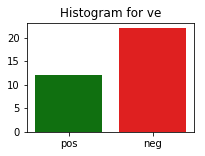

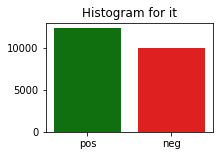

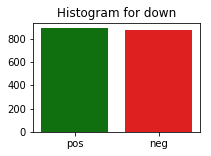

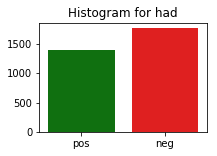

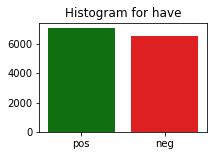

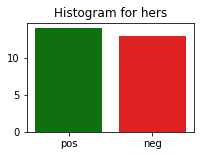

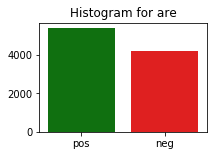

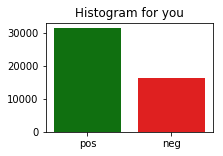

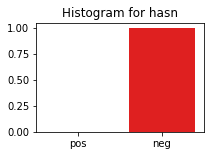

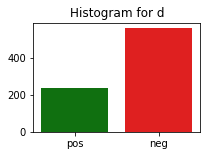

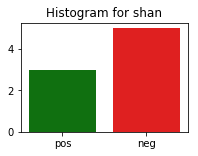

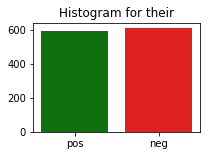

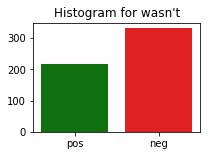

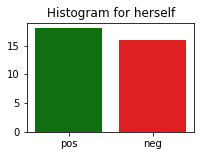

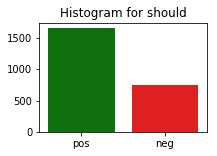

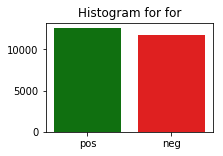

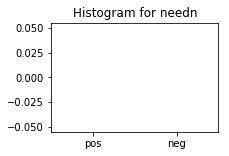

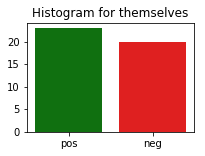

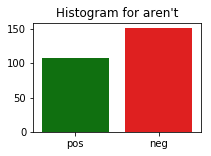

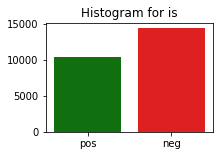

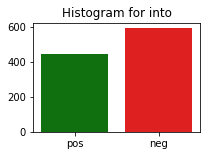

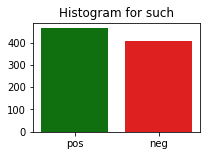

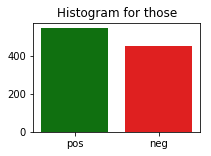

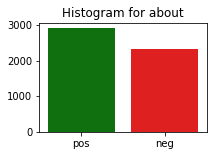

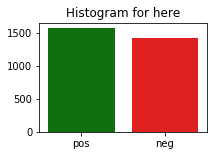

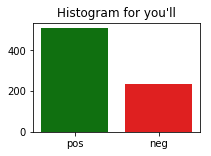

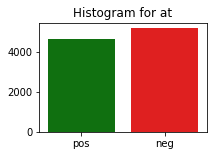

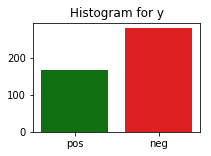

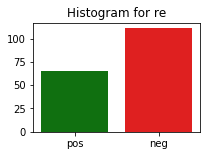

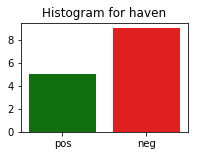

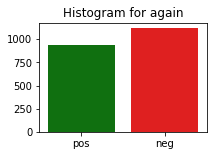

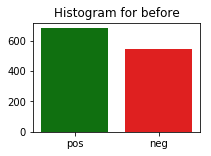

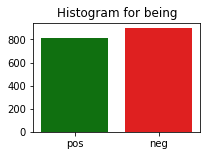

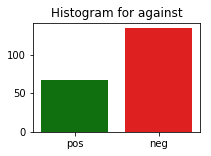

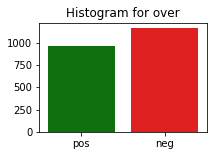

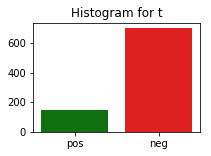

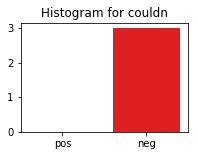

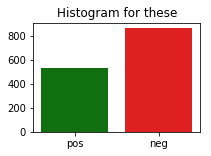

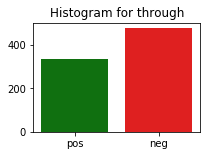

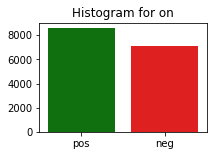

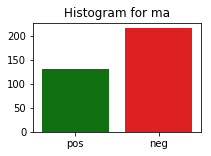

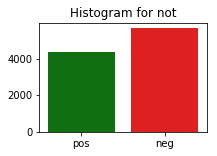

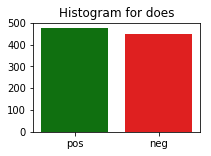

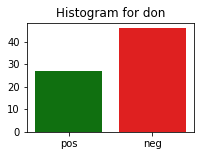

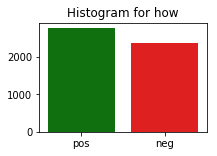

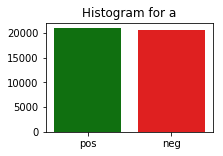

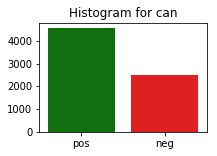

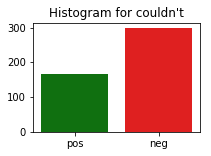

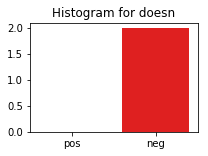

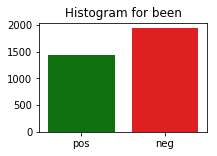

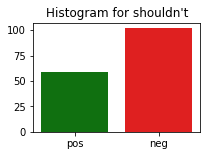

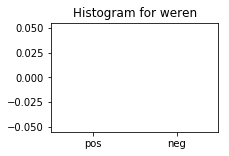

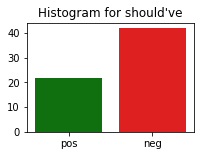

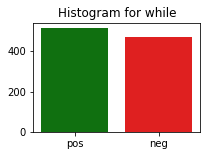

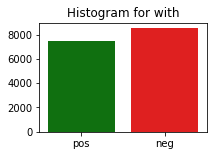

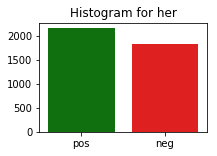

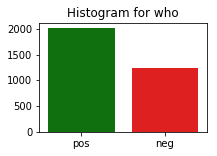

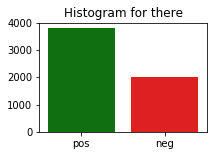

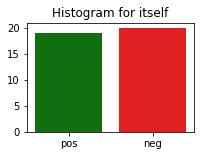

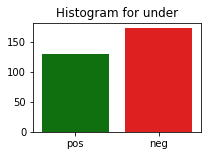

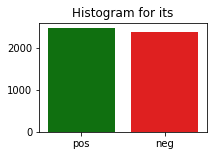

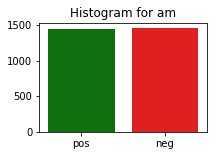

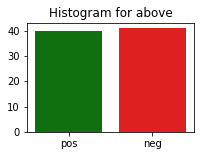

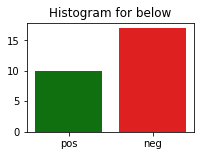

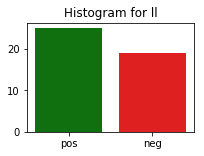

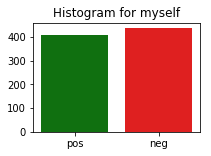

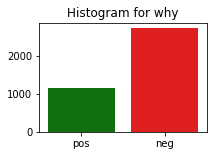

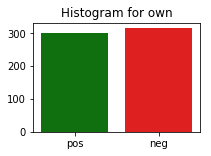

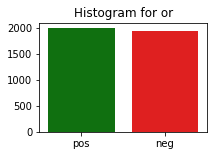

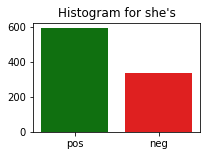

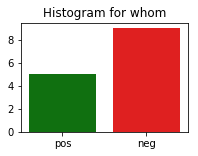

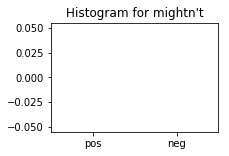

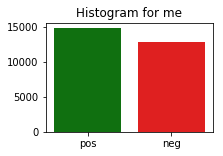

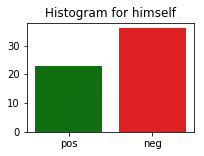

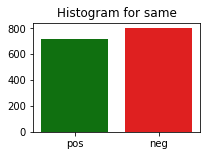

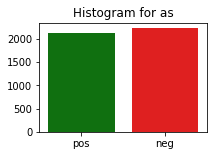

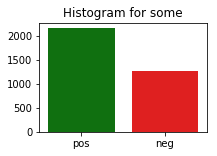

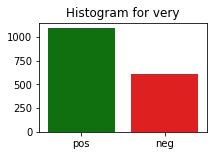

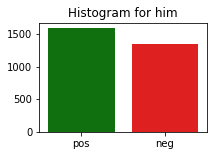

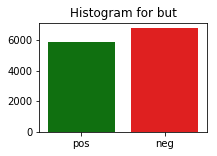

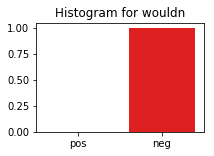

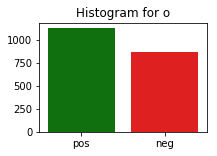

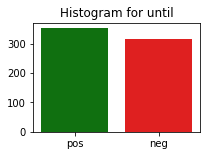

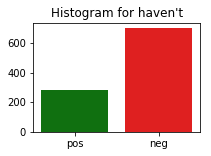

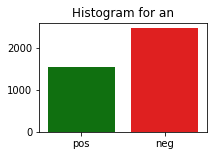

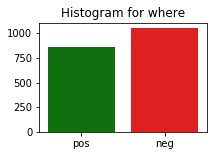

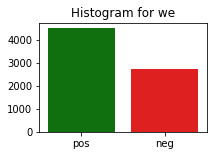

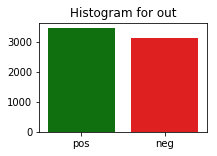

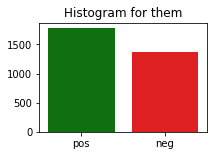

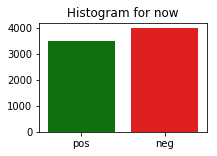

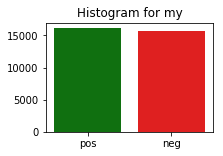

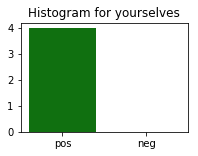

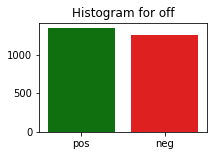

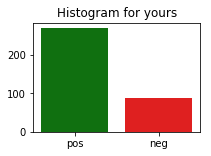

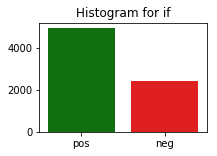

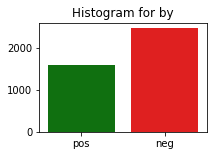

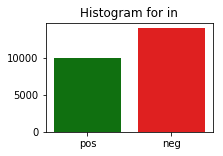

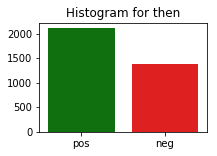

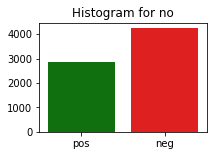

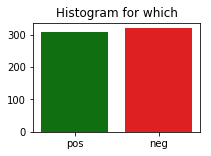

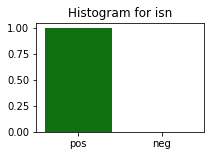

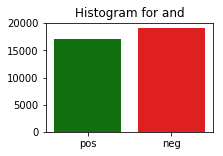

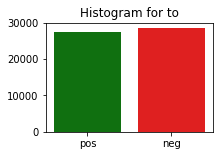

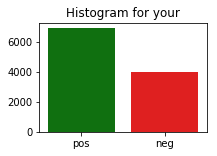

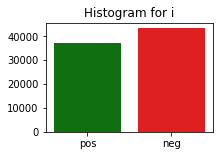

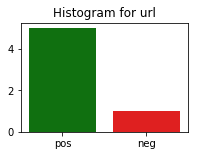

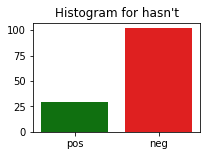

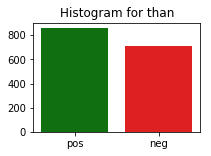

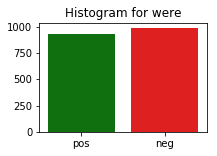

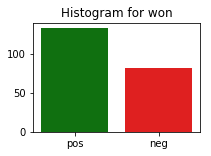

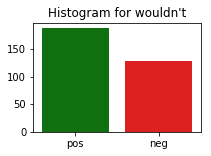

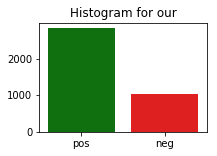

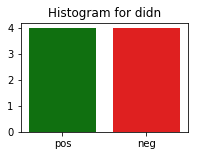

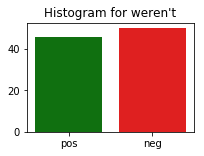

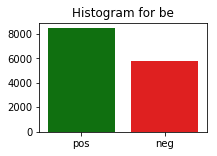

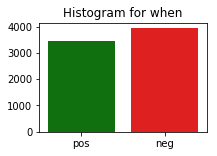

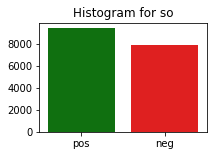

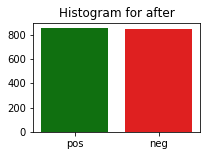

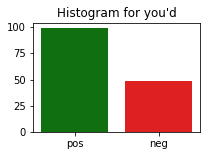

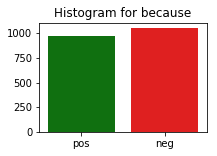

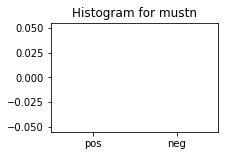

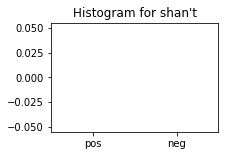

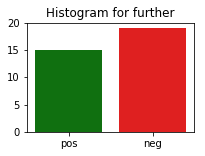

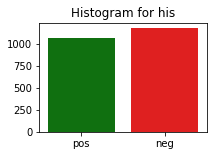

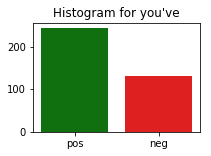

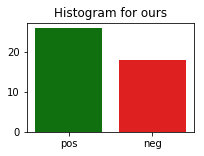

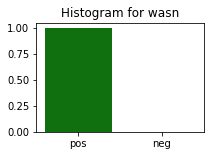

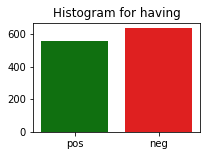

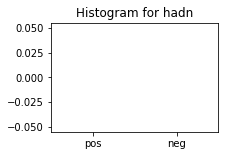

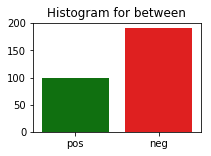

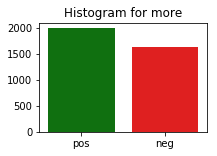

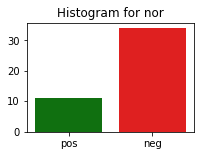

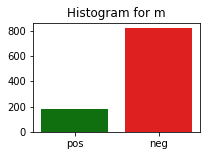

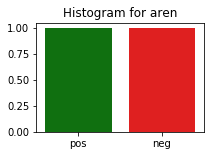

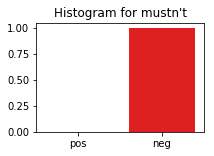

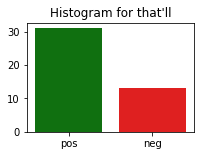

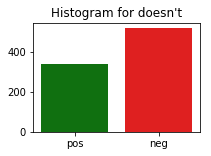

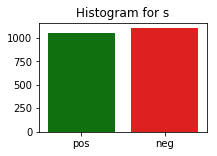

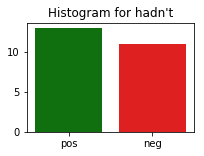

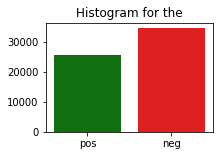

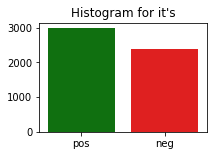

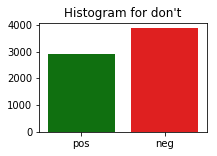

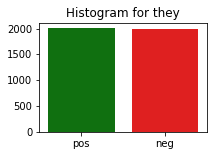

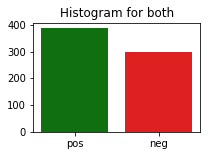

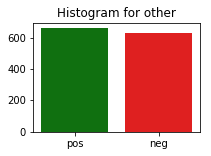

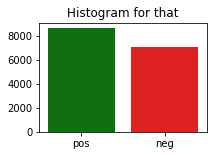

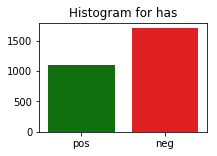

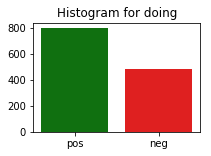

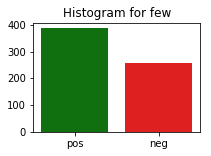

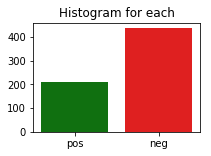

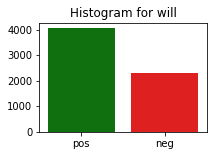

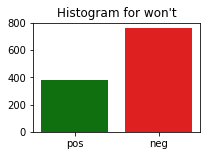

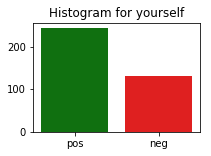

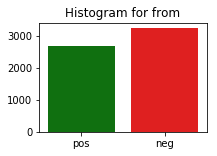

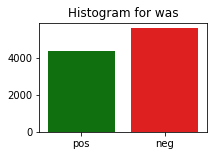

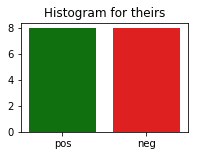

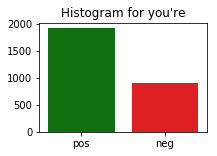

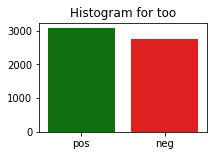

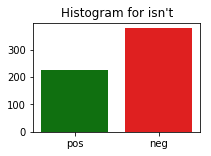

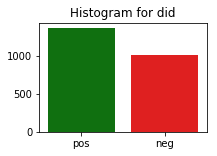

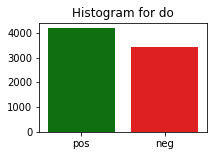

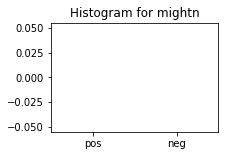

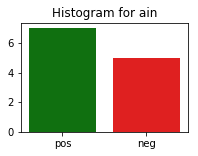

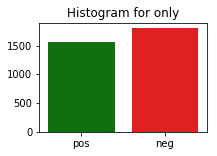

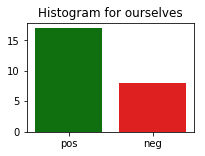

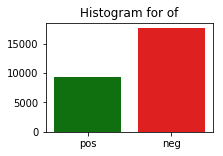

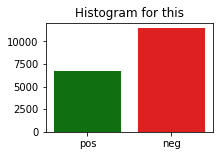

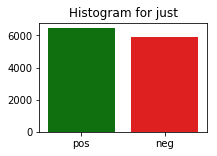

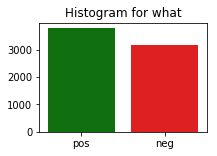

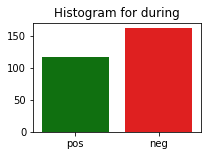

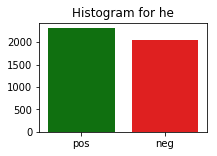

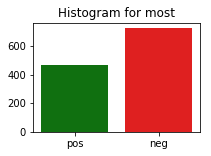

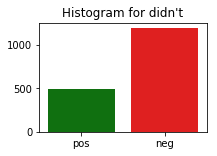

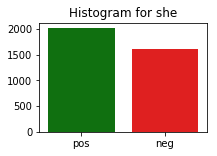

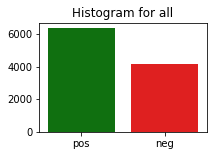

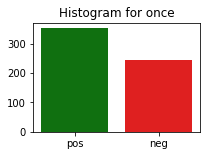

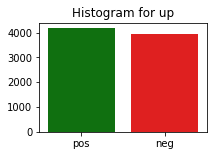

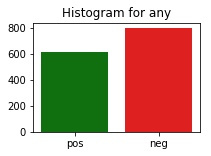

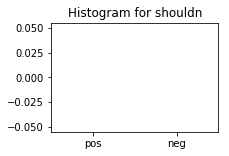

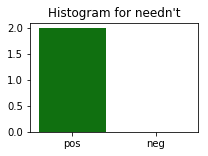

In [227]:
# for stopword in stopWords:
#     plt.figure(figsize=(3, 2))
#     plt.title("Histogram for {}".format(stopword))
#     ax = sns.barplot(['pos', 'neg'],[count_vect_pos.vocabulary_.get(stopword), count_vect_neg.vocabulary_.get(stopword)], palette=['green', 'red'])

for stopword in stopWords:
    plt.figure(figsize=(3, 2))
    plt.title("Histogram for {}".format(stopword))
    ax = sns.barplot(['pos', 'neg'],[d_pos.get(stopword), d_neg.get(stopword)], palette=['green', 'red'])

### Punctuation

In [228]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [229]:
for tweet in train_neg:
    if  ('-' in tweet):
        print(tweet)

print(count)

1-3 vs celtics in the regular season = were fucked if we play them in the playoffs
the post-boom in spanish american fiction ( suny series in latin american and iberian thought and culture what ... <url>
<user> <user> bloodforge not worth fighting to get . decent combat , visuals stay same all game , and story non-existent .
bye bye beach and buddies ( @ fort lauderdale-hollywood international airport ( fll ) w / 47 others ) <url>
<user> ow im very sorry : ' - ( but im not too know englis ... therefore : ' - (
suffering from post-festival disorder
walthers proto 2000 ho scale diesel emd f7a powered - standard dc - soo line #2225 - b with mars light ( red , white <url>
medium cherry & black 60 " corner tv stand by powell - medium wood ( 533-275 contemporary 60 " wide corner tv sta ... <url>
o2 xda trion minisync - complete essentials kit ( european outlet plug , cleartouch anti-glare the minisync - co ... <url>
star brite economy boat hook ( 4-8- feet telescoping pole extends from 4 ( 1

sunnyd veryfine , 100 % orange juice , 10 - ounce bottles ( pack of 24 veryfine juices are a great way to start any day . <url>
download with dropbox - simple downloader and uploader manager ( gratuite utilitaires <url> #ipad
soldiers of the spanish-american war ( americans at war <url>
samsung ln46b550 46 - inch 1080p lcd hdtv with red touch of color ( electronics samsung has designed a 46 " lcd hd ... <url>
samsung ln46b550 46 - inch 1080p lcd hdtv with red touch of color ( electronics samsung has designed a 46 " lcd hd ... <url>
gold : best of spandau ballet ( audio cd these good-looking brits were at the forefront of the early - ' 80s london ... <url>
bt - long term investing ( cojgg 18 investing over the long term can generate stronger & larger returns . ( april ... <url>
good deal - the prokaryotes : a handbook on the biology of bacteria ( v . 1-7 with the launch of its first electr ... <url>
watched the madrid-bayern shootout . i know how madrid feel like , wish i could hv what 

replacement lamp for sanyo plc-ef 32n 200 - watt hs ( with compatible housing replacement lamp for sanyo plc-ef 32n ... <url>
4-4 ! you guys can't not win thix ! can't not ! ! " <user> 4-3 "
silk soymilk , vanilla , 8.25- ounce aseptic cartons ( pack of 18 ) ( grocery a subtle touch of pure , natural vanill ... <url>
canton cd 360f speaker ( single , black high gloss canton's cd 360 f is a 2-1 / two-way flat speaker . able to han ... <url>
( 913 i'm going to get pregnant and die ... mean girls warned me about this but i didn't listen - - textsfromlastnight ( <user>
truroots organic germinated brown rice , 14 - ounce pouches ( pack of 6 truroots organic germinated brown rice ( gb ... <url>
very best of fritz wunderlich ( audio cd in his all-too-short life , wunderlich became one of the finest mozarti ... <url>
#1dfact niall's mum approved demi lovato to be her future daughter in law'never i'm anti-disney
i wanna stay up all night and jump around until we the sun ~ <-- not possible .
nyl

blue at the mizzen ( aubrey-maturin the brand new aubrey-maturin novel , the twentieth in this classic series .  ... <url>
hot : battery for toshiba tecra a2 - s119 ( 4700 mah , denaq cell count : 6 capacity : 4700mah compatible parts : pa3 ... <url>
pm laughs off ' too relaxed ' claim ( bbc share with friends : | | top news - world news stories , news feeds and ... <url>
official video - true stacks - i am ( prod . by the untouchables <url>
ncis naval criminal investigative service - the complete first season ( dvd a team of special agents , operating ... <url>
ncis naval criminal investigative service - the complete first season ( dvd a team of special agents , operating ... <url>
roadkill ( video game out-drive , outgun and outthink your competition to survive in this post-apocalyptic city ! ... <url>
caselogic dcb - 27 compact camera case with quickdraw ( red the caselogic dcb - 27 compact camera case - with quickd ... <url>
caselogic dcb - 27 compact camera case with quickdraw ( r

canon powershot sd1200 is minisync - mobile charging kit ( high current output ) ( uk outlet plug the minisync - ... <url>
i-nique tuff-luv soft pink premium napa leather case navman ( n40i softer than kittens ! - top of the range gor ... <url>
history of the city of rome in the middle ages ( volume 5 volume : 5 publisher : london , bell subjects : rome - - ... <url>
sony dcr-hc 62 camcorder casecrown mobile padded personal camcorder carrying case ( orange store and carry your ... <url>
sony dcr-hc 62 camcorder casecrown mobile padded personal camcorder carrying case ( orange store and carry your ... <url>
epox ep - 8npaj 1gb memory ram upgrade ( a-tech brand 1gb ddr - 400 ( pc3200 ) for epox ep - 8npaj <url>
lol ... r yu nt in skul ? rt <user> - ___ - rt <user> go 4 a #blow-job * okbye ! rt <user> i need a job ! ! !
j-tool addition ( file system #ceph as a distributed network storage and file system tool - <url> #in #storage #openstack
marvel zombies : dead days ( hardcover at last - 

safety soft foot 2 ' x 60 ' ft extra comfort anti-fatigue mat w / durashield 3/8 " ( black / yellow recommended for i ... <url>
flowers on a rainy afternoon - w4w ( nova we talked briefly at the parking lot flower shop in sterling ... <url> #misdme
a taste of thai pad thai noodles quick meal , 5.75- ounce boxes ( pack of 6 ready in 4 minutes . real thai , real e ... <url>
bob's red mill almond meal / flour , 16 - ounce packages ( pack of 4 from blanched whole almonds . almonds meal / flour ... <url>
pissed at the fact they didn't play <user> cant say no at rollerworld tonight we requested it 3 times ! - . -
david guetta - when love takes over ( featkelly rowland <url> via <user>
david guetta - when love takes over ( featkelly rowland <url> via <user>
rose infant costume infant ( 18-24 months includes : dress , bloomers , headband , and wand . shoes and tights not i ... <url>
at bi-lingual spanish retail sales consultant at at ( new york , ny at is at the center of ... <url> #spanish #j

michelin arras / charleville-mezieres / st . quentin , france map no . 53 ( michelin maps & atlases an annually update ... <url>
fiesta 13 - ounce square mug , tangerine ( kitchen fiesta square mug manufactured by the homer laughlin china comp ... <url>
yak scat ii full metal core wheel 100mm orange with abec 7 bearings installed ( 2 - wheels 2 - yak scat ii full m ... <url>
a look inside the first-round nba matchups ( the associated press sure , basketball is a team sport , ... <url> #mavericks #nba
20 " tall rectangle baseline table ( canary yellow ) ( 20 " h x 48 " w x 30 " d lightweight and easy to move , with easy - ... <url>
body language - indicators of interest ( ioi's <url> via <user>
tyga - faded ft . lil wayne ( official video ) ( explicit <url> via <user>
tyga - faded ft . lil wayne ( official video ) ( explicit <url> via <user>
ass kickin ' fish fry original , 12 - ounce boxes ( pack of 6 <url>
softball - softball multi vertical - short sleeve t-shirt ( large black 100 % c

sharp brand mx - 7000n - 1 - standard yield magenta toner ( office supply / toner sharp brand mx - 7000n - 1 - standard ... <url>
ringwraith costume (8 - 10 the nazgl ( from black speech nazg ( ring ) and gl ( wraith , spirit ) are sauron's most te ... <url>
woodbridge lighting 12341 - blk baxter wall sconce , 5-3 / 4 - inch by 14-1 / 4 - inch by 8-1 / 4 - inch , black : light bulb 1 ) ... <url>
pac steering wheel radio control interface with wired input - pioneer / sony swi-ps ( electronics this allows you ... <url>
pac steering wheel radio control interface with wired input - pioneer / sony swi-ps ( electronics this allows you ... <url>
- _ - outta here . rt <user> : o fuck ? why ? lmao . rt <user> i wanna go to lindblom sooo bad
personalized labels sample pack - baby shower gifts & wedding favors ( set of 72 set up a display of personaliz ... <url>
batter chatter : interview with joanie of blossom edge ( via <user> source : blossomedge.co ... <url> - #cake blogs
baggallini women's c

the multiples manual : preparing and caring for twins or triplets ( paperback the multiples manual is a " need-to ... <url>
<user> yaaay , no . we'll have school in about a week and i missed the concert ! i thought it was the 26th pa - _ - #stupidity
historic print ( l south carolina--the november election--the dead-lock in the state legislature at columbi : th ... <url>
mr . bean - the whole bean ( complete set ) ( dvd he captured the hearts of millions of viewers worldwide . his mov ... <url>
mr . bean - the whole bean ( complete set ) ( dvd he captured the hearts of millions of viewers worldwide . his mov ... <url>
mr . bean - the whole bean ( complete set ) ( dvd he captured the hearts of millions of viewers worldwide . his mov ... <url>
eight oclock coffee , hazelnut ground , 11 - ounce bags ( pack of 4 eight oclock coffee , hazelnut ground has supr ... <url>
megadeth : rust in peace live [ blu-ray ] ( blu-ray in march of 2010 megadeth hit the road in celebration of the 2 ... <url

love the way you lie - mashup ( free mp3 ! <url> via <user> mtoo booom
anwright corp . tcb - 26821 press-fit one-piece shoulder tooling ball . 5000 ( a ) , . 2500 ( b precision ground should ... <url>
primal wear 2011 men's echo cycling jersey - ech 1j20 ( black - l raglan cut with 3/4 hidden zipper and 3 rear p ... <url>
peter pan peanut butter , creamy honey roast , 18 - ounce jars ( pack of 12 peter pan is the smooth , creamy peanut ... <url>
battery 92p1011 - 6 for ibm / lenovo ( 58 whr , denaq cell count : 6 capacity : 58whr compatible parts : 08k8192 - 6 , 08 ... <url>
gaming computer | velocity micro edge z55 ( core i7 - 2700k , february 2012 last year we fell is to digital storm ... <url>
aerielle ss300 - c i2i stream skin ( clear customize and protect your i2i stream with the ss300 stream skin by ae ... <url>
reflections of a khmer soul ( paperback a lyrical journey of self-acceptance as the author questions and comes ... <url>
kids books : the first moon story - book 3 ( kids

schecter omen - 6 electric guitar ( gloss white schecter omen - 6 electric guitar white ( wht ) <url>
schecter omen - 6 electric guitar ( gloss white schecter omen - 6 electric guitar white ( wht ) <url>
lenovo thinkpad t 2647-84 u 256mb memory ram upgrade ( a-tech brand 256mb pc100 sdram so-dimm for lenovo thinkpa ... <url>
lenovo thinkpad t 2647-84 u 256mb memory ram upgrade ( a-tech brand 256mb pc100 sdram so-dimm for lenovo thinkpa ... <url>
thinkwell college algebra ( 12 - month online subscription college algebra includes hundreds of multimedia video ... <url>
trust - 1 . ) takes years to gain 2 . ) seconds to break 3 . ) and a lifetime to regain sorry tht had to happen jenn i feel soo bad
3dcarbon 2009-2010 focus 2 door - 6 pc . kit ( painted : natural neutral pearl clearcoat - ur this item fits : * 200 ... <url>
<user> not really , linda , many of my aph friends there - tweet & fb to each other daily . personal history still slow in oz (
les petit pilous - drop it ( bnr trax ou

moschino cheap and chic women's smack t-strap sandal , orange , 39.5 eu ( us women's 9.5 m <url>
golf tees etc 2 3/4 " imprinted custom personalized tees - 50,000 ( black market your brand by imprinting your c ... <url>
<user> caitlin , i dunno why some caitliners always judge me-selenators - tbh , i am caitliners tooo
jvcc j90 low gloss gaffer-style duct tape : 1 in . x 60 yds . ( grey jvcc j90 low gloss gaffer-style duct tape is ... <url>
hp compaq additional models nx7300 notebook / laptop battery 5000mah ( replacement shopforbattery sfb-nc 8200_10 ... <url>
voice lessons to go's - vocalize ! ( perfect paperback vocalize ! is the transcribed compilation of the popular vo ... <url>
voice lessons to go's - vocalize ! ( perfect paperback vocalize ! is the transcribed compilation of the popular vo ... <url>
how the bible was built ( paperback the bible continues to be the worlds runaway best-seller . but very few peo ... <url>
gypsy design protector skin decal sticker for apple macbook 

jersey shore dell y0175 notebook / laptop / notebook battery - 42whr ( replacement dell y0175 notebook / laptop b ... <url>
dangerous-game rifles ( hardcover the popularity of rifles designed to take big game has never been greater . te ... <url>
dangerous-game rifles ( hardcover the popularity of rifles designed to take big game has never been greater . te ... <url>
ps3 - headset - ear force - px21 ( turtle beach ps3 - headset - ear force - px21 ( turtle beach ) . the ear force ... <url>
little book of castles ( usborne little books this is a handy pocket-sized book packed with facts and detailed ... <url>
<user> > ; o - , - :/ <--- the faces i just made . lmfao
live at leeds ( audio cd japanese-only shm-cd ( super high material cd ) pressing of this classic rock album . shm ... <url>
18k yellow gold four-prong diamond stud earrings ( 4 ct . tw . a matched pair of near-colorless diamonds are secu ... <url>
sony clie tj27 minisync - mobile charging kit ( uk outlet plug the minisync - m

chic shaper perfect posture - beige - small ( sizes 32-34 this amazing new shaping and lifting undergarment wor ... <url>
laptop battery for samsung np-r 780 - js01us ( 6 - cell , 4400mah high quality replacement 6 cell samsung np-r 780 - js0 ... <url>
i need nicki . ! ! ! - can i be honest w / yall about something ? i couldnt sleep sunday night coz i was ... <url>
tool steel a2 round rod , astm a -681-94 , 2 " od , 36 " length ( pack of 5 <url>
cables to go 28104 usb 2.0 a male to b male cable , black ( 16.4 feet / 5 meters just plug-and-play for keyboards ... <url>
badger cocoa butter lip balm-vanilla bean ( pack of 5 <url>
biostar nf4ul - a9 2gb memory ram kit ( 2x1gb ) ( a-tech brand 2gb ddr - 333 ( pc2700 ) kit ( 2x1gb ) for biostar nf4ul - a ... <url>
lil ' santa costume - toddler 1-2 years , ( size 2-4 usa lil ' santa costume - toddler 1-2 years , ( size 2-4 usa ) <url>
new libman cleaning products take care of wood floor maintenance - sys-con media ( press release new libman c 

<user> i accedently blocked you please re-follow me ? 2
customer service rep . ( e - 470 & i - 70 part time , 20-30 hours per week , monday - friday , schedule will fall betwe ... <url>
winbook powerspec 8705 512mb memory ram kit ( 2x256mb ) ( a-tech brand 512mb ddr - 266 ( pc2100 ) kit ( 2x256mb ) for w ... <url>
msi u123 - 003us 10.2 blue netbook carrying city vertical zip utility tote bag ( black get ready for school , work ... <url>
msi u123 - 003us 10.2 blue netbook carrying city vertical zip utility tote bag ( black get ready for school , work ... <url>
portabrace bp - 3 waist belt production pack ( blue the bp - 3 is the slightly larger version of the original bp - 2 ... <url>
portabrace bp - 3 waist belt production pack ( blue the bp - 3 is the slightly larger version of the original bp - 2 ... <url>
amped wireless high power 12dbi omni-directional wi-fi antenna ( wa12 the amped wireless high power 12dbi omni - ... <url>
paranormal activity ( dvd this intense edge-of-your seat 

troy state trojans 5 ' x8 ' ulti-mat floor mat ( rug show your team pride and add style to your tailgating party w ... <url>
stock trader's almanac 2010 ( almanac investor series ) ( hardcover-spiral for over 40 years , thousands of market ... <url>
nec express 5800r / 120ed - 733 1gb memory ram upgrade ( a-tech brand 1gb pc133 sdram ecc registered for nec expres ... <url>
toefl cbt exam with cd-rom : third edition ( kaplan toefl ibt ( w / cd ) ) ( paperback are you ready for the toefl cb ... <url>
lexmark 12n0770 12n0770 toner , 14000 page-yield , yellow ( 1 each - makes the ordinary extraordinary . - lower co ... <url>
lexmark 12n0770 12n0770 toner , 14000 page-yield , yellow ( 1 each - makes the ordinary extraordinary . - lower co ... <url>
listening to the thrill - wiz khalifa reminds me of fitness class .
good deal - stylecraft 30 " x 114 " joined board and batten mahogany exterior shutters ( pair custom-made . southe ... <url>
st . dalfour gourmet on the go , ready to eat wild al

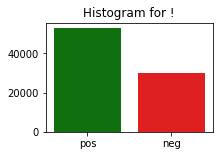

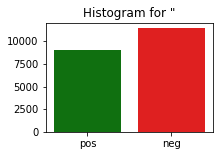

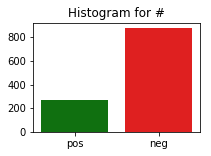

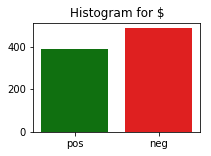

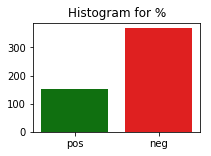

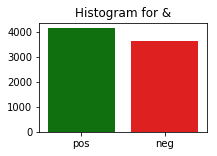

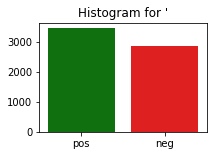

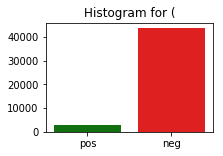

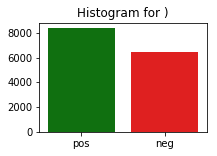

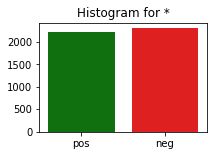

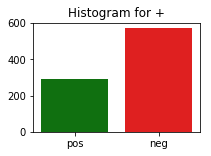

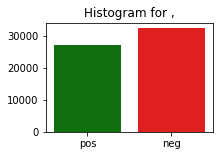

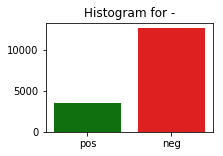

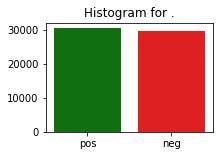

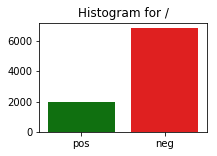

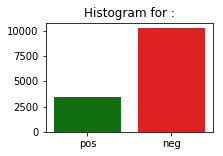

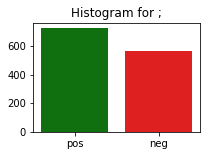

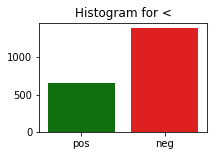

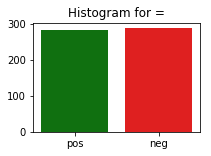

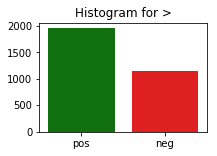

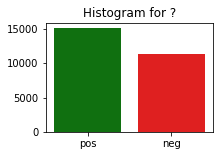

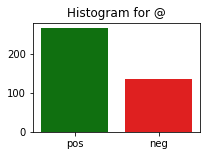

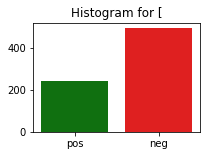

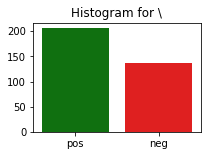

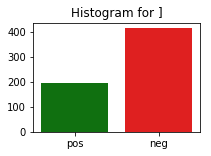

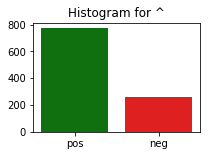

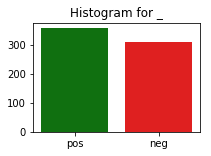

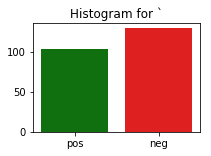

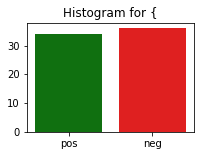

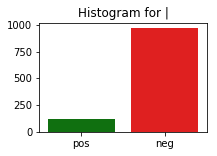

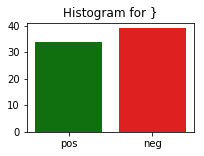

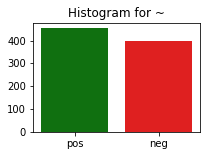

In [76]:
for punct in string.punctuation:
    plt.figure(figsize=(3, 2))
    plt.title("Histogram for {}".format(punct))
    ax = sns.barplot(['pos', 'neg'],[d_pos.get(punct), d_neg.get(punct)], palette=['green', 'red'])

In [218]:
# keep this punctuation
len('!#&()-/:<>[]^|}')

18

### Lematizer

In [234]:
#for the lemmatizer to really work, we need to give a tag to indicate the nature 
#of the word (adv, adj, verb,noun,...) because if we don't, it treats every word
#as a noun (ie, went stays went instead of go)

#taken from : https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    #pos_tag doesn't have the same tag than wordnet therefore we have to modify the tag
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_sentence(sentence):
    """
    lemmatize a given sentence by first giving a tag for each word and then lemmatizing
    the word based on its tag
     
    Returns:
    list:contains the lemmatized words of the parameter sentence
    """
    lemmatizer = nltk.wordnet.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]

Remarks : 
- I notice that 'ing'-form of verbs are often 'in' and are therefore not classify as verb during lemmatization

In [235]:
def preprocess_tweet(tweets, punctuation = string.punctuation, stopwords = stopWords):
    """
    preprocessed the given list of tweets :
        - lowercase
        - remove punctation
        - remove stopwords
        - lemmatize
         
        
    Returns:
    list of the tokenized and preprocessed version of the tweets
    """
    
    #convert every tweet to lowercase
    tweets = [tweet.lower() for tweet in tweets]
    
    #remove punctuation
    tweets = [tweet.translate(str.maketrans('', '', punctuation)) for tweet in tweets]
    
    tweets_mod = []
    for tweet in tweets:
        #lemmatize the sentence and give back a list of words
        words = lemmatize_sentence(tweet) 
        
        #remove the words that belong to stopwords (list)
        words = [word for word in words if (word not in stopwords)]
        
        tweets_mod.append(words)
        
    return tweets_mod

In [236]:
#example
preprocess_tweet(["hEllo I went to the movies and ate chips!!!!!", "#12"])

[['hello', 'go', 'movie', 'ate', 'chip'], ['12']]

In [ ]:
train_pos_tok = preprocess_tweet(train_pos)
#train_neg_tok = preprocess_tweet(train_neg)

In [ ]:
train_neg_tok = preprocess_tweet(train_neg)

In [64]:
def cloud_words(tokenized_tweets):
    """
    Plot a wordcloud of every word in all tweets
    """
    #we need a string with all the words of all the tweets
    all_words = [item for sublist in tokenized_tweets for item in sublist]#list of (list of words) -> list of (sentence)
    all_words = ' '.join(word for word in all_words)

    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


In [ ]:
cloud_words(train_pos_tok)

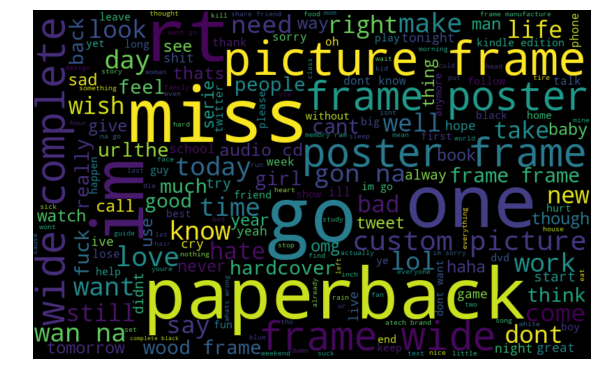

In [82]:
cloud_words(train_neg_tok)